# Bibliotecas e Configurações

#### Importação das bibliotecas necessárias para análise de dados, visualização e machine learning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import utils
import importlib

## Configs

importlib.reload(utils)
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.max_rows', 100)      # Mostra até 100 linhas
pd.set_option('display.max_colwidth', 100)  # Máxima largura da coluna
pd.set_option('display.float_format', '{:.2f}'.format)  # Formato dos números flutuantes
pd.set_option('display.expand_frame_repr', False)  # Não quebra o DataFrame em múltiplas linhas
pd.set_option('display.max_rows', None)  # Mostra todas as linhas no output
warnings.filterwarnings('ignore')

# Colors
colors = ['#705557', '#b27b77', '#ddcac6', '#af9294', '#8c9a5b', '#708090', '#c5a880', '#a0522d']

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
sns.set_palette(sns.color_palette(colors))  


#### Importação de bibliotecas para pré-processamento de dados, modelagem e avaliação de modelos de machine learning

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from math import pi
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,  recall_score, f1_score, precision_recall_fscore_support
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier,AdaBoostClassifier,StackingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.pipeline import Pipeline



#### Definição dos caminhos para as pastas de dados


In [4]:
pasta_raw = '../data/raw/'
pasta_stage = '../data/stage/'
pasta_analitics = '../data/analitics/'

#### Leitura do dataset de sementes a partir de um arquivo de texto

In [5]:
df_seeds = pd.read_csv(pasta_raw + 'seeds_dataset.txt', delim_whitespace=True, header=None)

#### Definição de metadados para cada coluna do dataset

In [6]:
metadados = {
    "Area": {
        "index": 0,
        "descricao": "Medida da área do grão de trigo.",
        "tipo": "dependente",
        "analise": 0
    },
    "Perimeter": {
        "index": 1,
        "descricao": "Perímetro do grão de trigo.",
        "tipo": "dependente",
        "analise": 0
    },
    "Compactness": {
        "index": 2,
        "descricao": "Compactação do grão calculada como 4*pi*area/perimeter^2.",
        "tipo": "dependente",
        "analise": 0
    },
    "KernelLength": {
        "index": 3,
        "descricao": "Comprimento do eixo principal do núcleo do grão.",
        "tipo": "dependente",
        "analise": 0
    },
    "KernelWidth": {
        "index": 4,
        "descricao": "Largura do eixo secundário do núcleo do grão.",
        "tipo": "dependente",
        "analise": 0
    },
    "AsymmetryCoefficient": {
        "index": 5,
        "descricao": "Coeficiente de assimetria do grão.",
        "tipo": "dependente",
        "analise": 0
    },
    "GrooveLength": {
        "index": 6,
        "descricao": "Comprimento do sulco do núcleo do grão.",
        "tipo": "dependente",
        "analise": 0
    },
    "Variety": {
        "index": 7,
        "descricao": "Variedade do grão de trigo (1: Kama, 2: Rosa, 3: Canadian).",
        "tipo": "independente",
        "analise": 0
    }
}

variety_map = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}


#### Exibição de informações sobre o DataFrame df_seeds

In [7]:
df_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


### Data Transform
#### Renomeação das colunas do DataFrame df_seeds 

In [8]:
df_seeds.columns = [
    'Area', 
    'Perimeter', 
    'Compactness', 
    'KernelLength', 
    'KernelWidth', 
    'AsymmetryCoefficient', 
    'GrooveLength', 
    'Variety'
]

#### Exibição das primeiras linhas do DataFrame df_seeds

In [9]:
df_seeds.head()

Area  Perimeter  Compactness  KernelLength  KernelWidth  AsymmetryCoefficient  GrooveLength  Variety
0 15.26      14.84         0.87          5.76         3.31                  2.22          5.22        1
1 14.88      14.57         0.88          5.55         3.33                  1.02          4.96        1
2 14.29      14.09         0.91          5.29         3.34                  2.70          4.83        1
3 13.84      13.94         0.90          5.32         3.38                  2.26          4.80        1
4 16.14      14.99         0.90          5.66         3.56                  1.35          5.17        1

#### Exibição de informações sobre o DataFrame df_seeds após a renomeação das colunas

In [11]:
df_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  210 non-null    float64
 1   Perimeter             210 non-null    float64
 2   Compactness           210 non-null    float64
 3   KernelLength          210 non-null    float64
 4   KernelWidth           210 non-null    float64
 5   AsymmetryCoefficient  210 non-null    float64
 6   GrooveLength          210 non-null    float64
 7   Variety               210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


#### Conversão da coluna 'Variety' para o tipo "category"

In [13]:
df_seeds['Variety'] = df_seeds['Variety'].astype('category')

#### Salvar as alterações em stage

In [14]:
df_seeds.to_csv(pasta_stage + 'stage_seeds.csv', index=False)

#### Normalização das características contínuas do DataFrame df_seeds

In [15]:
    # Normalizar as características contínuas
    df_seeds_normalizer = df_seeds.copy()
    scaler = StandardScaler()
    features = ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth', 'AsymmetryCoefficient', 'GrooveLength']
    df_seeds_normalizer[features] = scaler.fit_transform(df_seeds_normalizer[features])





#### Salvamento das alterações no DataFrame df_seeds_normalizer na pasta analitics

In [16]:
df_seeds_normalizer.to_csv(pasta_analitics + 'stage_seeds_normalizer.csv', index=False)

# Exploratory

In [ ]:
df_seeds_normalizer.describe()

Area  Perimeter  Compactness  KernelLength  KernelWidth  AsymmetryCoefficient  GrooveLength
count 210.00     210.00       210.00        210.00       210.00                210.00        210.00
mean   -0.00       0.00         0.00         -0.00        -0.00                 -0.00         -0.00
std     1.00       1.00         1.00          1.00         1.00                  1.00          1.00
min    -1.47      -1.65        -2.67         -1.65        -1.67                 -1.96         -1.81
25%    -0.89      -0.85        -0.60         -0.83        -0.83                 -0.76         -0.74
50%    -0.17      -0.18         0.10         -0.24        -0.06                 -0.07         -0.38
75%     0.85       0.89         0.71          0.79         0.80                  0.71          0.96
max     2.18       2.07         2.01          2.37         2.06                  3.17          2.33

In [18]:
df_seeds_normalizer.head()

Area  Perimeter  Compactness  KernelLength  KernelWidth  AsymmetryCoefficient  GrooveLength Variety
0  0.14       0.22         0.00          0.30         0.14                 -0.99         -0.38       1
1  0.01       0.01         0.43         -0.17         0.20                 -1.79         -0.92       1
2 -0.19      -0.36         1.44         -0.76         0.21                 -0.67         -1.19       1
3 -0.35      -0.48         1.04         -0.69         0.32                 -0.96         -1.23       1
4  0.45       0.33         1.37          0.07         0.81                 -1.56         -0.48       1

### Visualização de outliers com boxplot


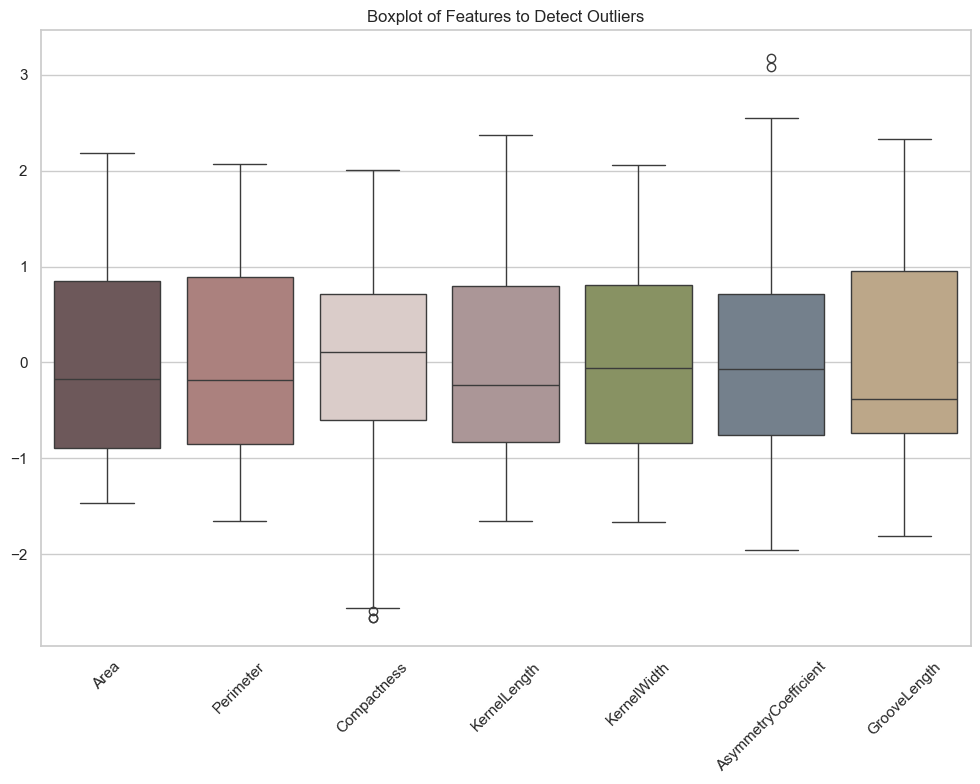

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_seeds_normalizer[features])
plt.title('Boxplot of Features to Detect Outliers')
plt.xticks(rotation=45)
plt.show()


In [20]:
# Manter a coluna Variety com valores categóricos numéricos
df_seeds_normalizer['Variety_numeric'] = df_seeds_normalizer['Variety']

# Mapear cada variedade para seu nome correspondente
variety_map = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}
df_seeds_normalizer['Variety'] = df_seeds_normalizer['Variety'].map(variety_map)

# Criar colunas binárias para cada variedade (one-hot encoding), enquanto mantém a coluna original
df_seeds_one_hot = pd.get_dummies(df_seeds_normalizer, columns=['Variety'], prefix='', prefix_sep='')

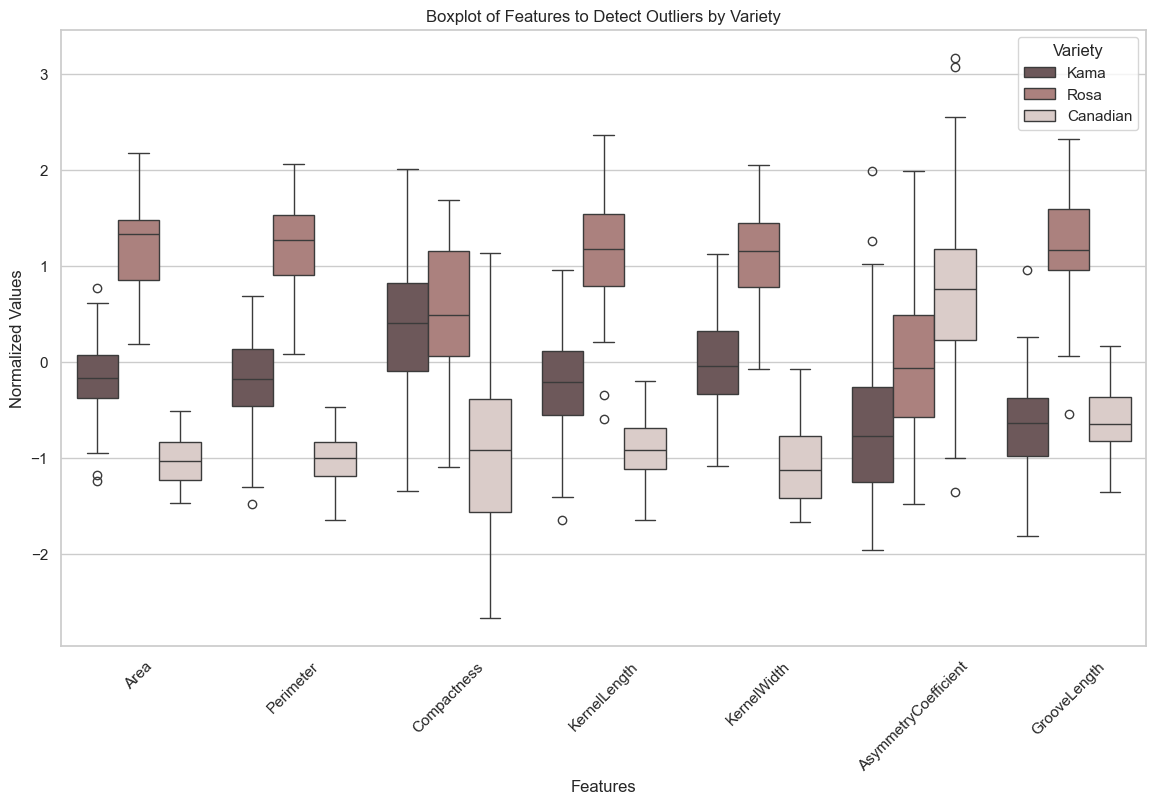

In [ ]:
df_melted = pd.melt(df_seeds_normalizer, id_vars='Variety', value_vars=features)

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_melted, x='variable', y='value', hue='Variety')
plt.title('Boxplot of Features to Detect Outliers by Variety')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.legend(title='Variety')
plt.show()

#### Matriz de correlação total

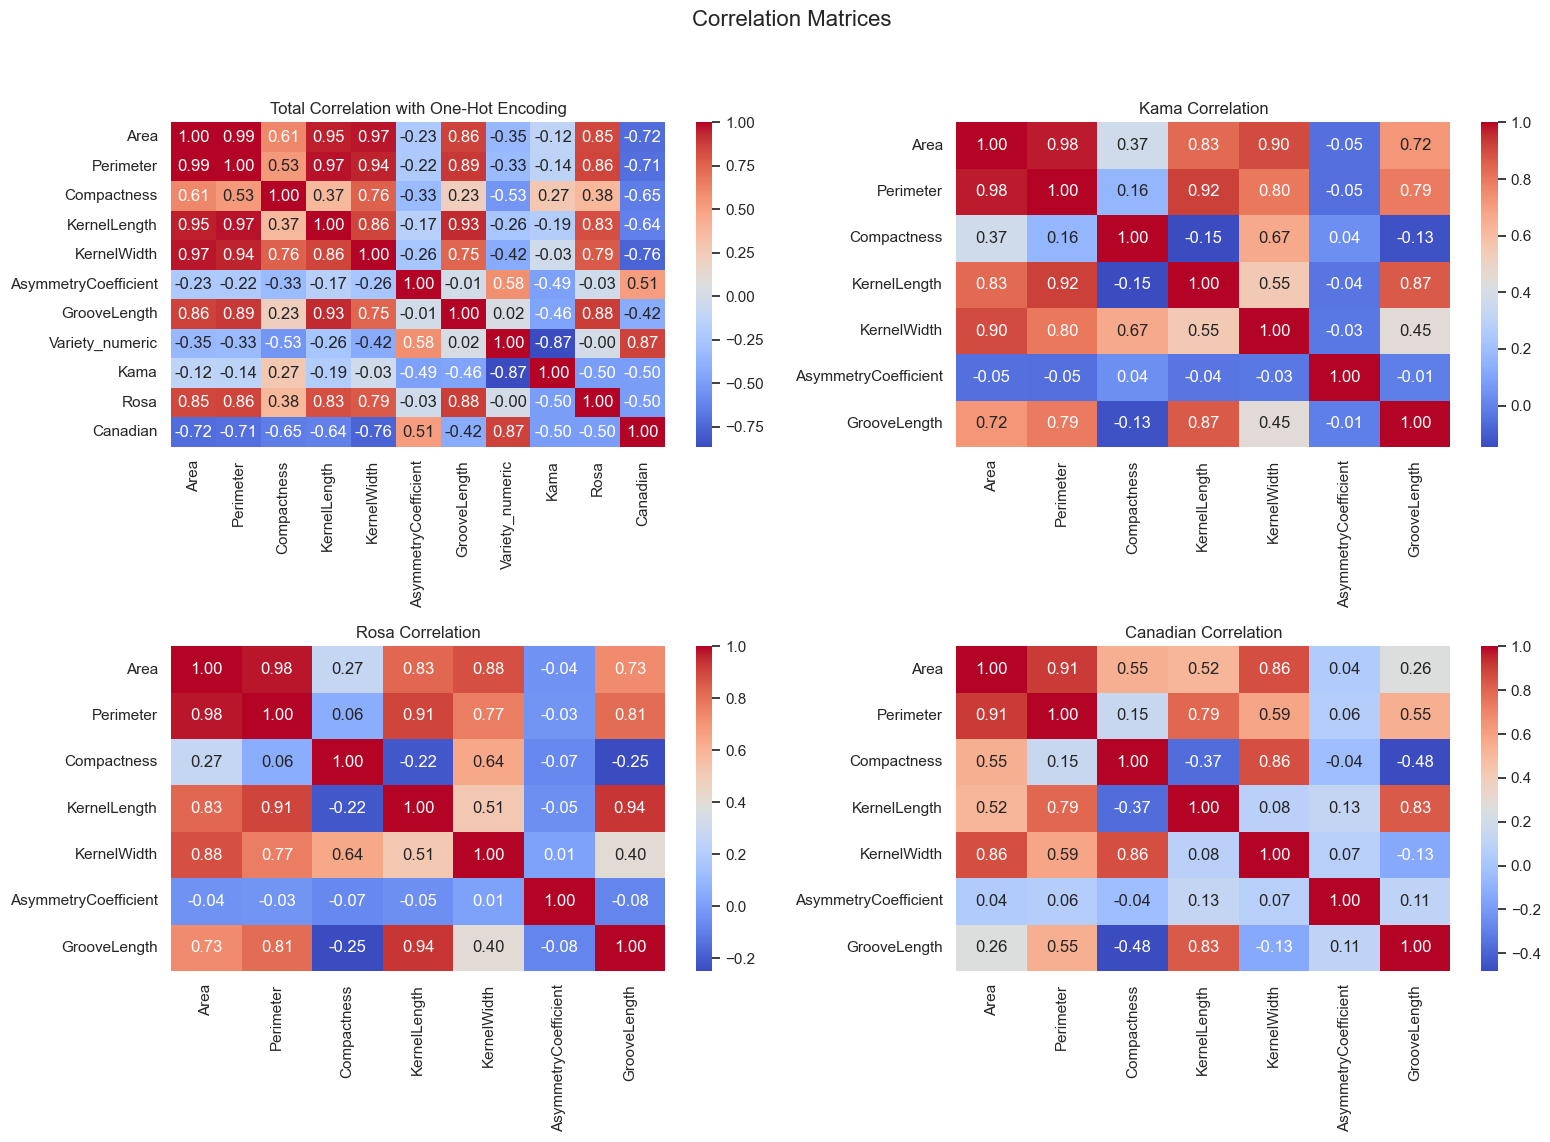

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Correlation Matrices', fontsize=16)

# Matriz de correlação total
sns.heatmap(df_seeds_one_hot.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Total Correlation with One-Hot Encoding')

# Gerar matrizes de correlação para cada variedade usando 'Variety_numeric' para filtragem
for ax, (key, variety_name) in zip(axes.flat[1:], variety_map.items()):
    df_variety = df_seeds_normalizer[df_seeds_normalizer['Variety_numeric'] == key]
    sns.heatmap(df_variety[features].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title(f'{variety_name} Correlation')

# Ajustar layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Gráficos de Dispersão

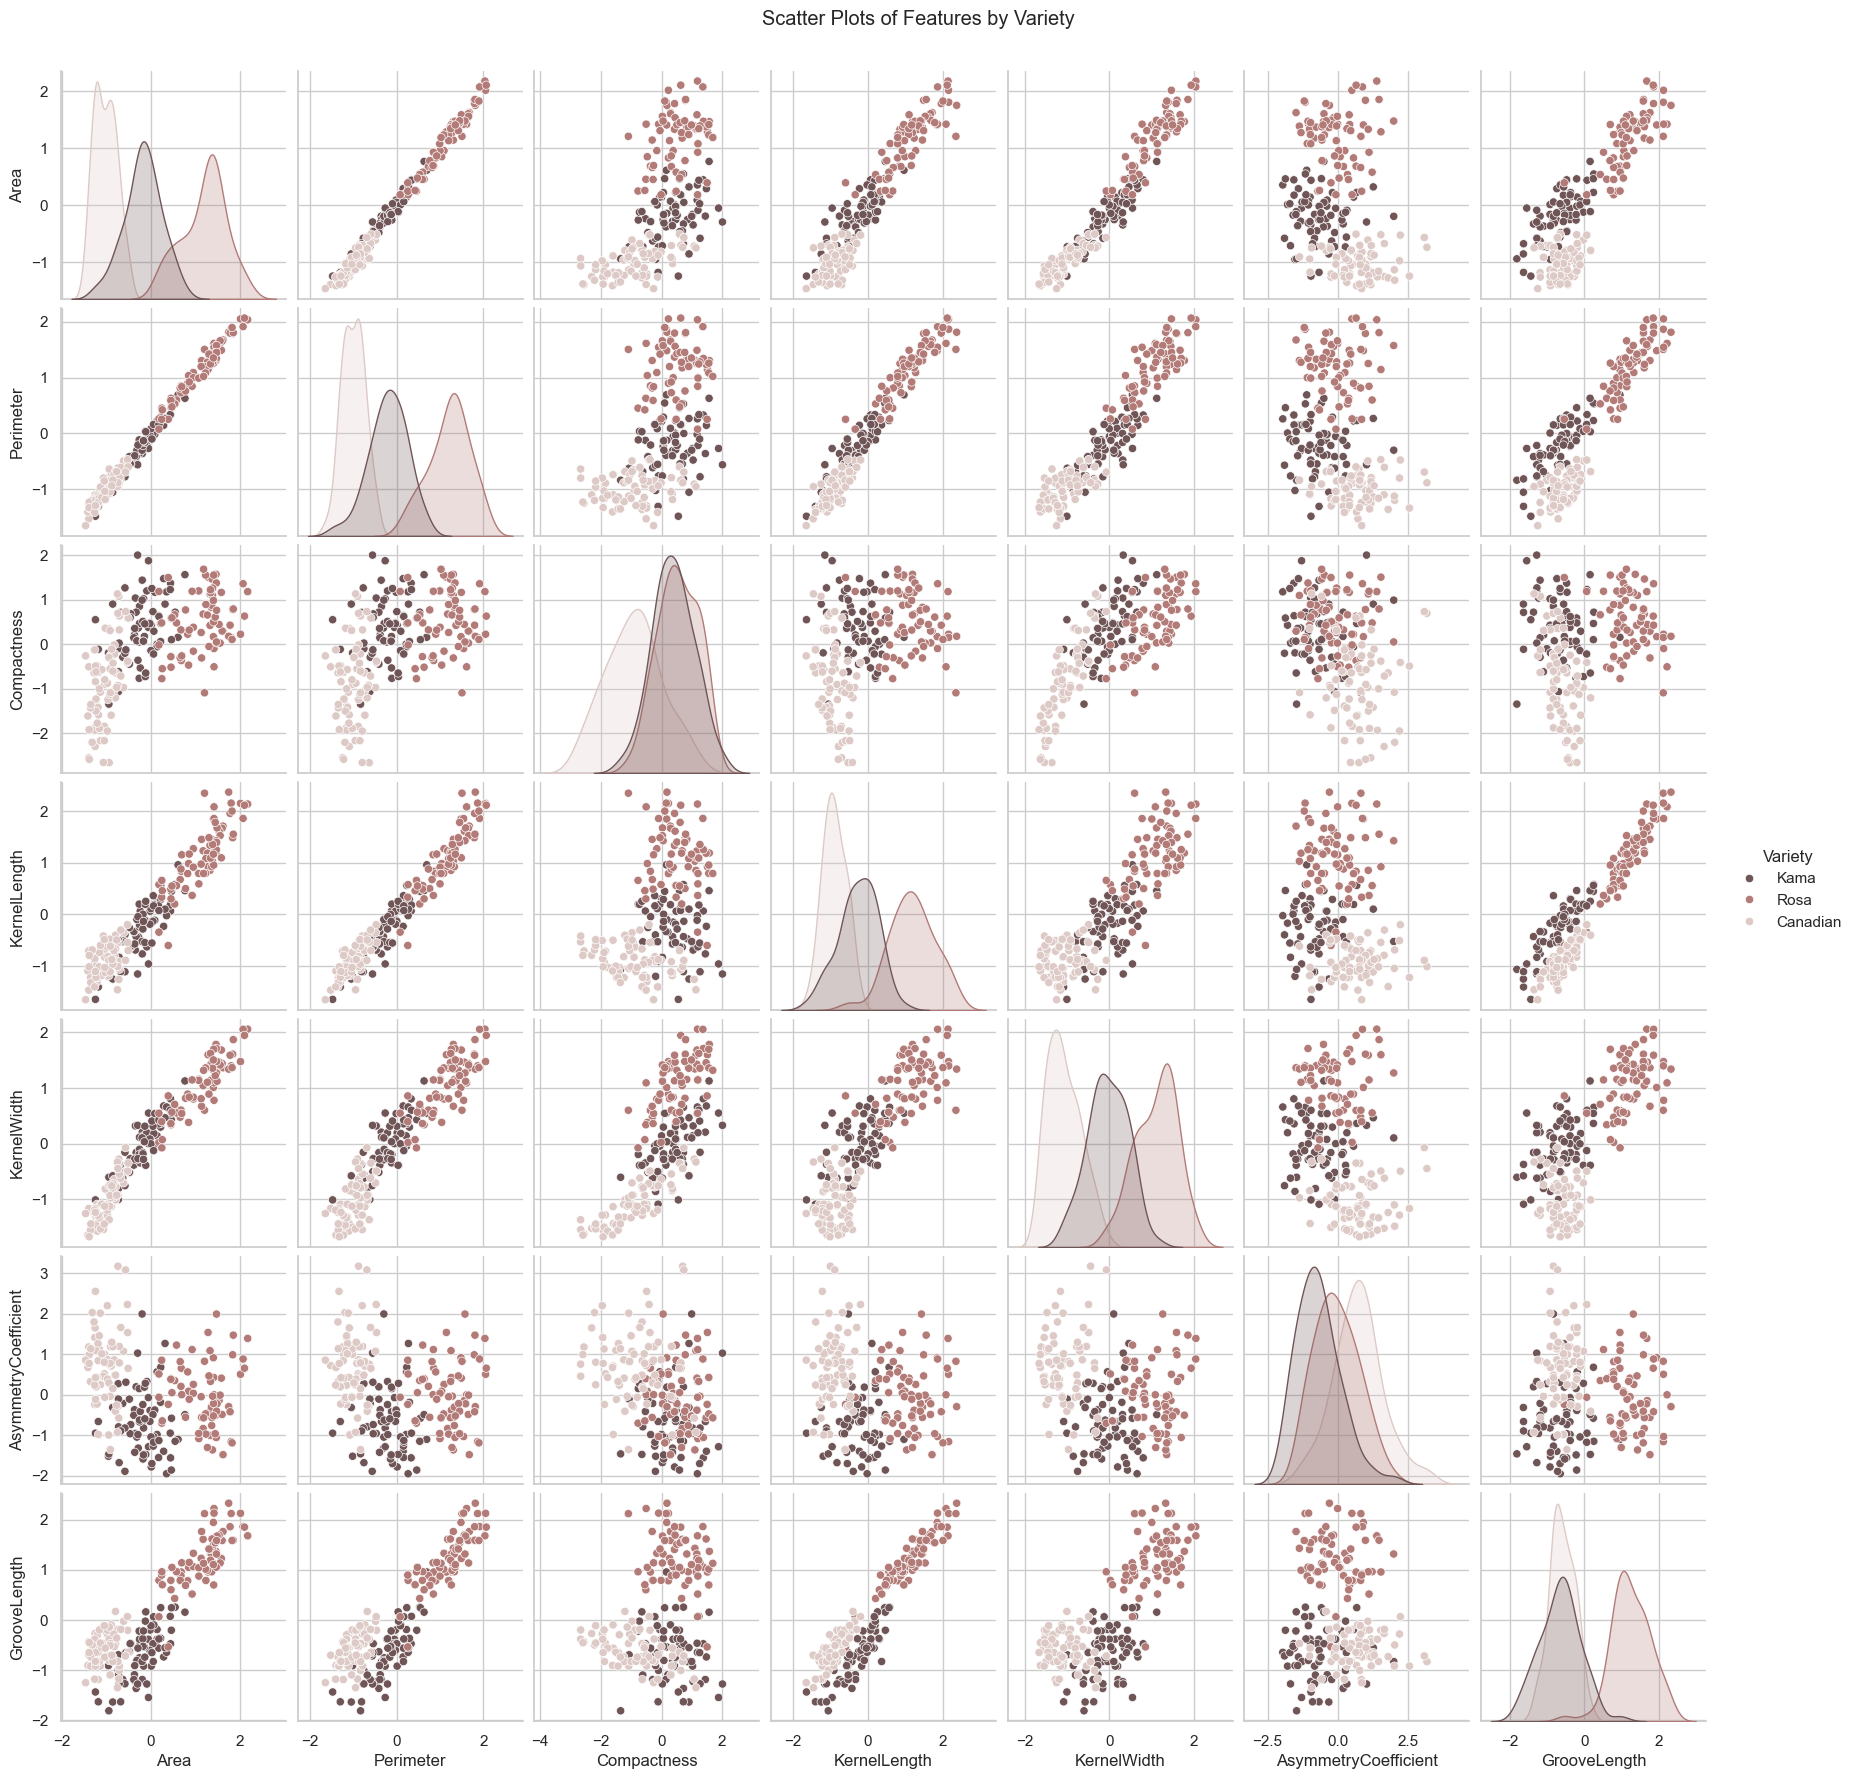

In [101]:
# Gráficos de Dispersão
sns.pairplot(df_seeds_normalizer, diag_kind='kde', hue='Variety')
plt.suptitle('Scatter Plots of Features by Variety', y=1.02)
plt.show()

# Gráfico de radar para cada variedade

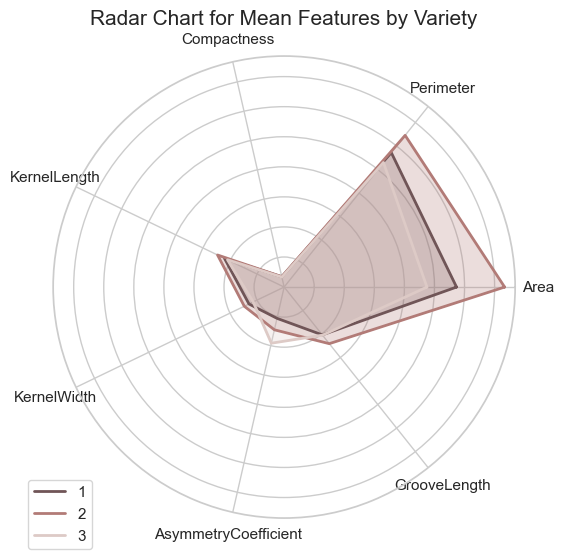

In [129]:
# Calcular média para cada variedade
means = df_seeds.groupby('Variety').mean()

# Configurar o gráfico de radar
categories = list(means.columns)
N = len(categories)

# Ângulos para os eixos do gráfico de radar
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Criar o gráfico de radar para cada variedade
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))
for i, (variety, row) in enumerate(means.iterrows()):
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, color=colors[i], linewidth=2, linestyle='solid', label=variety)
    ax.fill(angles, values, color=colors[i], alpha=0.25)

# Adicionar rótulos e título
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Radar Chart for Mean Features by Variety', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

### Avaliação de Modelos de Machine Learning

In [213]:
features = ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth', 'AsymmetryCoefficient', 'GrooveLength']
target = 'Variety'

# Separar as características X e o alvo y
X = df_seeds_normalizer[features]
y = df_seeds_normalizer[target]

# Codificar as classes do alvo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Informações sobre a divisão
print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treinamento: (147, 7)
Tamanho do conjunto de teste: (63, 7)


In [335]:
def evaluate_model(model_params_list):
    results = []

    for params in model_params_list:
        description, X_train, X_test, y_train, y_test, model, model_name, hyperparameters, search_param = params

        # Normalização dos dados
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Aplicar PCA para reduzir a dimensionalidade para visualização
        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(X_train_scaled)

        # Treinar o modelo para visualização
        model.fit(X_train_pca, y_train)

        # Criar uma grade de pontos para traçar as fronteiras de decisão
        x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
        y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

        # Prever as classes para cada ponto da grade
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Iniciar a figura com subplots
        fig, axes = plt.subplots(3, 2, figsize=(14, 15))
        fig.suptitle(f'Desempenho do {description}', fontsize=16)

        # Plotar as fronteiras de decisão
        axes[0, 0].contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
        scatter = axes[0, 0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap='coolwarm', marker='o')
        axes[0, 0].set_title('Fronteiras de Decisão após PCA')
        axes[0, 0].set_xlabel('Componente Principal 1')
        axes[0, 0].set_ylabel('Componente Principal 2')
        legend_labels = ['Kama', 'Rosa', 'Canadian']  # Ajuste conforme suas classes reais
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(len(legend_labels))]
        axes[0, 0].legend(handles, legend_labels, title="Classes")

        best_param_value = None

        # Verificar se temos uma lista válida de hiperparâmetros
        if hyperparameters and search_param and hyperparameters.get(search_param) is not None:
            accuracies = []
            valid_ticks = []
            for param_value in hyperparameters[search_param]:
                if param_value is not None:
                    model.set_params(**{search_param: param_value})
                    model.fit(X_train_scaled, y_train)
                    y_pred = model.predict(X_test_scaled)
                    accuracies.append(accuracy_score(y_test, y_pred))
                    valid_ticks.append(param_value)

            # Plotar acurácia para diferentes valores de hiperparâmetros
            axes[0, 1].plot(valid_ticks, accuracies, marker='o', linestyle='-')
            axes[0, 1].set_xticks(valid_ticks)
            if search_param == 'C':
                axes[0, 1].set_xscale('log')
            axes[0, 1].set_title(f'Acurácia para Diferentes Valores de {search_param}')
            axes[0, 1].set_xlabel(f'Valor de {search_param}' + (' (Log Scale)' if search_param == 'C' else ''))
            axes[0, 1].set_ylabel('Acurácia')
            axes[0, 1].grid(True)

            # Selecionar o melhor parâmetro com base na acurácia máxima
            best_param_value = valid_ticks[np.argmax(accuracies)] if len(accuracies) > 0 else None
            if best_param_value is not None:
                model.set_params(**{search_param: best_param_value})
            
        # Treinar o modelo final com o melhor parâmetro
        model.fit(X_train_scaled, y_train)
        y_pred_final = model.predict(X_test_scaled)

        # Avaliar o desempenho do modelo final
        accuracy_final = accuracy_score(y_test, y_pred_final)
        conf_matrix = confusion_matrix(y_test, y_pred_final)

        # Calcular precisão, recall e F1-score como métricas separadas
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_final, average='weighted')

        # Visualizar a matriz de confusão
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=legend_labels, yticklabels=legend_labels, ax=axes[1, 0])
        axes[1, 0].set_title('Matriz de Confusão')
        axes[1, 0].set_xlabel('Classe Predita')
        axes[1, 0].set_ylabel('Classe Verdadeira')

        # Plotar métricas de classificação
        x = np.arange(len(legend_labels))
        width = 0.3
        axes[1, 1].bar(x - width, [precision]*len(legend_labels), width, label='Precision')
        axes[1, 1].bar(x, [recall]*len(legend_labels), width, label='Recall')
        axes[1, 1].bar(x + width, [f1]*len(legend_labels), width, label='F1 Score')
        axes[1, 1].set_title('Relatório de Classificação (Média)')
        axes[1, 1].set_xlabel('Classes')
        axes[1, 1].set_xticks(x)
        axes[1, 1].set_xticklabels(legend_labels)
        axes[1, 1].legend()
        
        # Texto e informações adicionais
        axes[2, 0].axis('off')
        axes[2, 0].text(0.5, 0.5, f'Acurácia: {accuracy_final:.2f}\nMelhor {search_param}: {best_param_value}', 
                        ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

        # Armazenar os resultados
        results.append({
            'description': description,
            'model_name': description,
            'best_param': best_param_value,
            'accuracy': accuracy_final,
            'conf_matrix': conf_matrix,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })

    return results


def plot_comparative_metrics(results):
    # Extrair informações relevantes para análise
    models = [result['model_name'] for result in results]
    accuracies = [result['accuracy'] for result in results]
    precisions = [np.mean(result['precision']) for result in results]
    recalls = [np.mean(result['recall']) for result in results]
    f1_scores = [np.mean(result['f1_score']) for result in results]

    # Criar um DataFrame para fácil manuseio e plotting
    df_metrics = pd.DataFrame({
        'Model': models,
        'Accuracy': accuracies,
        'Precision': precisions,
        'Recall': recalls,
        'F1 Score': f1_scores
    })

    # Plotar gráficos
    plt.figure(figsize=(20, 14))

    sns.set_theme(style="whitegrid")

    # Plotar acurácia
    plt.subplot(2, 2, 1)
    sns.barplot(x='Model', y='Accuracy', data=df_metrics, palette='viridis')
    plt.title('Comparação de Acurácia')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    for index, value in enumerate(accuracies):
        plt.text(index, value + 0.02, f'{value:.2f}', ha='center')

    # Plotar precisão
    plt.subplot(2, 2, 2)
    sns.barplot(x='Model', y='Precision', data=df_metrics, palette='magma')
    plt.title('Comparação de Precisão')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    for index, value in enumerate(precisions):
        plt.text(index, value + 0.02, f'{value:.2f}', ha='center')

    # Plotar recall
    plt.subplot(2, 2, 3)
    sns.barplot(x='Model', y='Recall', data=df_metrics, palette='cividis')
    plt.title('Comparação de Recall')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    for index, value in enumerate(recalls):
        plt.text(index, value + 0.02, f'{value:.2f}', ha='center')

    # Plotar F1 Score
    plt.subplot(2, 2, 4)
    sns.barplot(x='Model', y='F1 Score', data=df_metrics, palette='plasma')
    plt.title('Comparação de F1 Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    for index, value in enumerate(f1_scores):
        plt.text(index, value + 0.02, f'{value:.2f}', ha='center')

    plt.tight_layout()
    plt.show()

    # Determinar o melhor modelo baseado em uma simples soma das métricas (ou outra lógica)
    df_metrics['Average'] = df_metrics[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1)
    best_model_index = df_metrics['Average'].idxmax()
    best_model = df_metrics.iloc[best_model_index]

    # Descrição sobre o melhor modelo
    print(f"O melhor modelo é '{best_model['Model']}' com a média de métricas de {best_model['Average']:.2f}.")
    print(f"Desempenho detalhado: Acurácia = {best_model['Accuracy']:.2f}, Precisão = {best_model['Precision']:.2f}, Recall = {best_model['Recall']:.2f}, F1 Score = {best_model['F1 Score']:.2f}.")

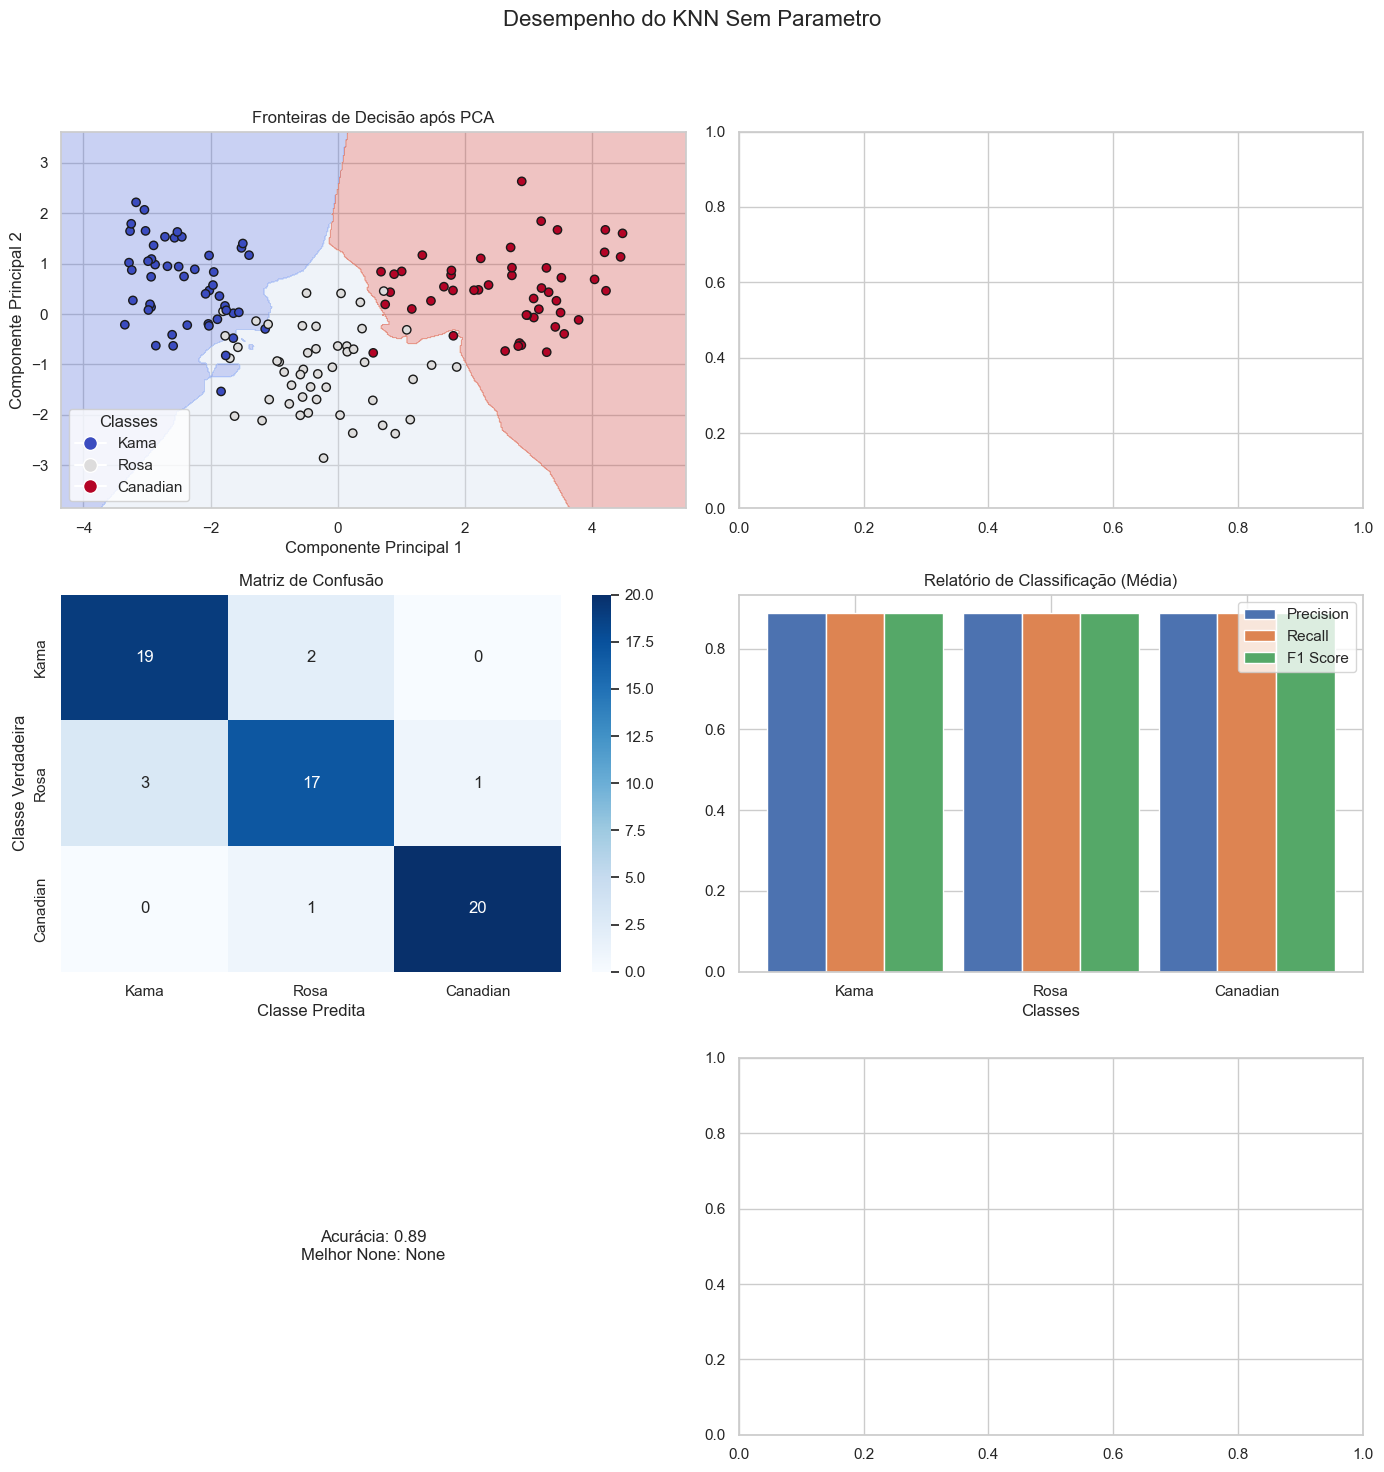

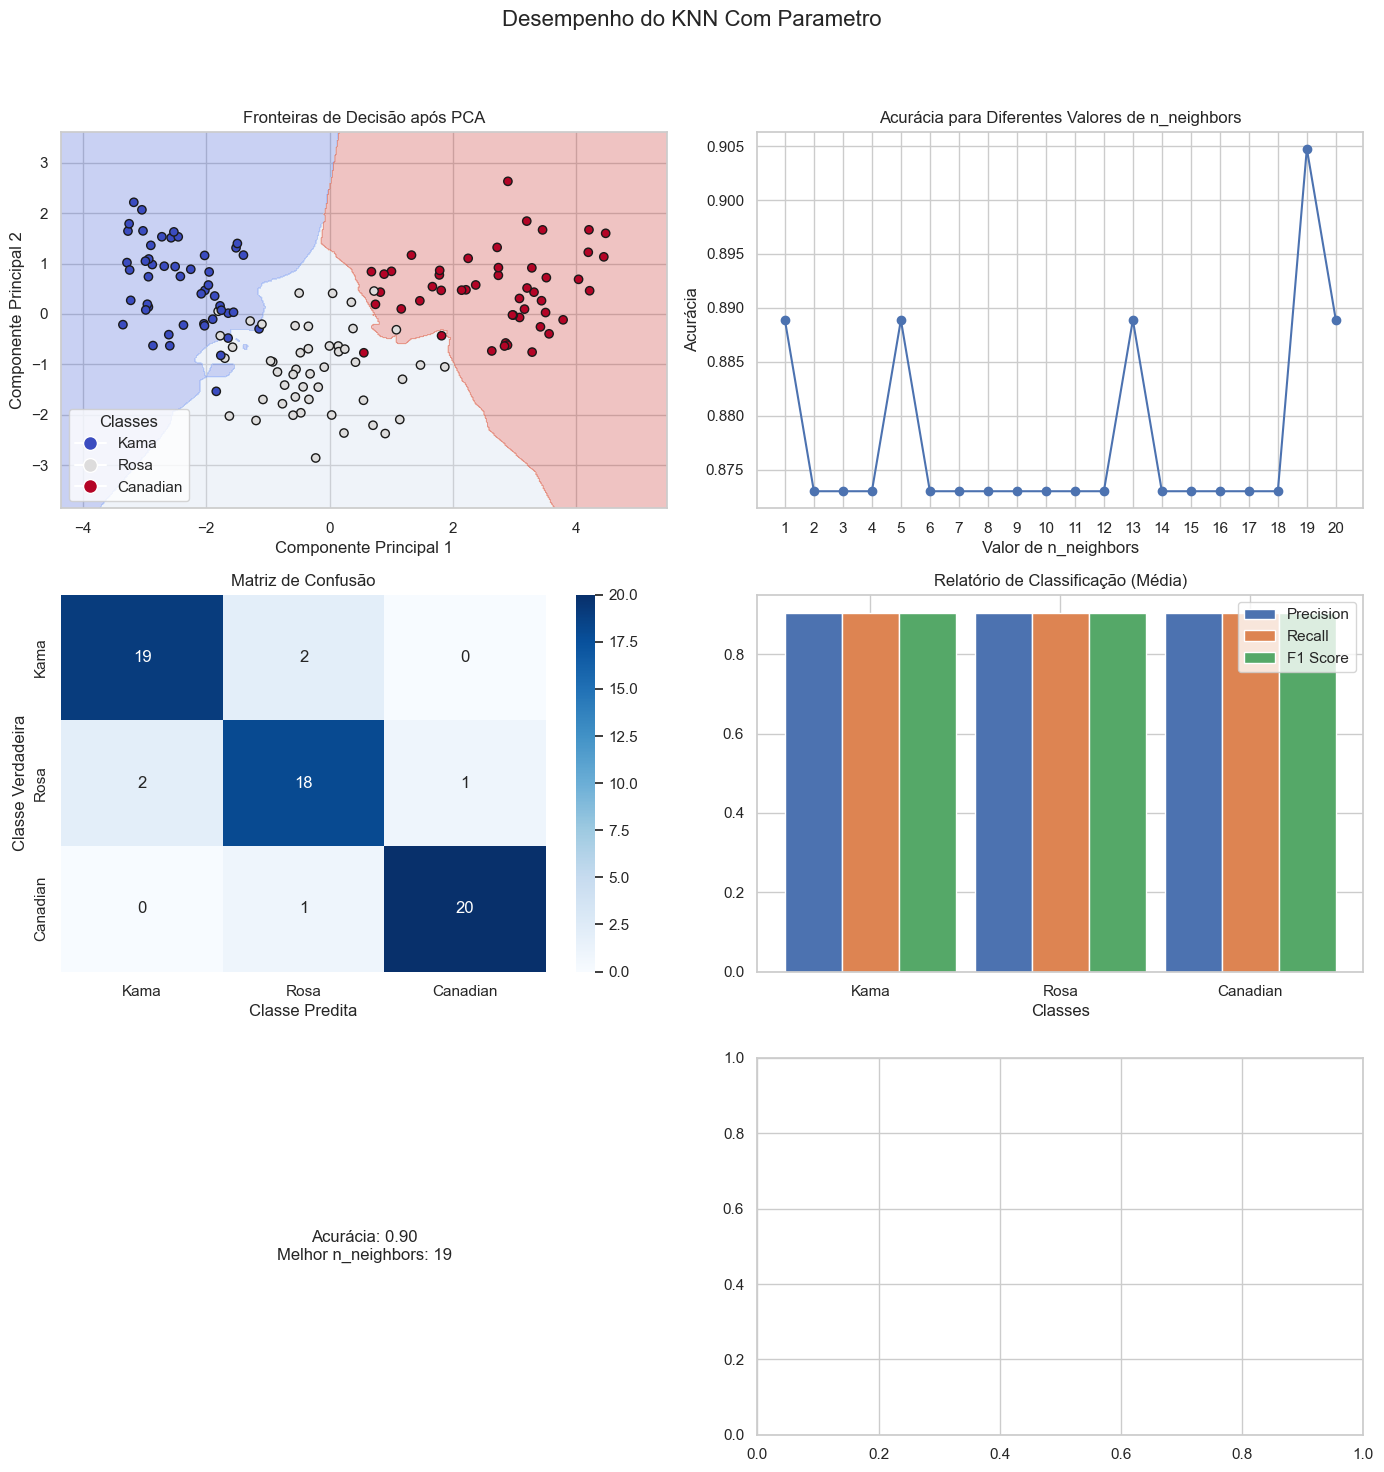

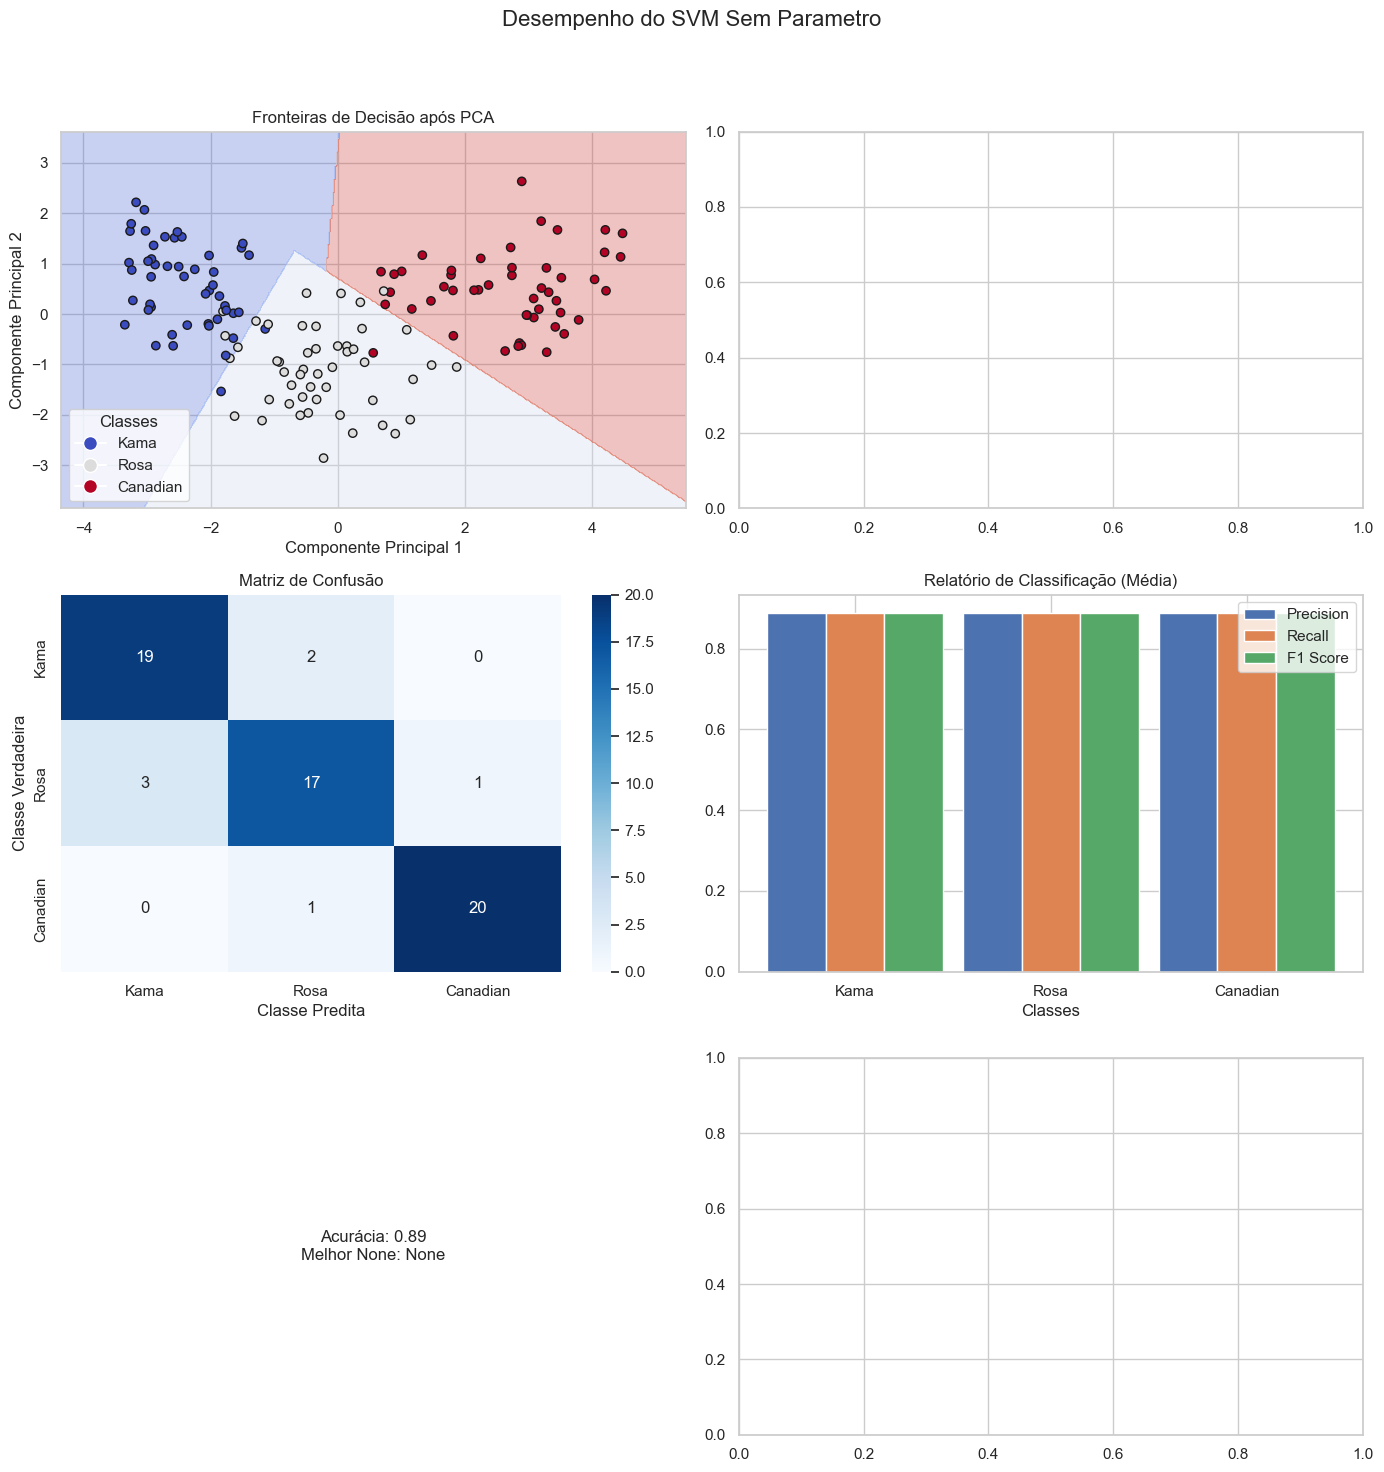

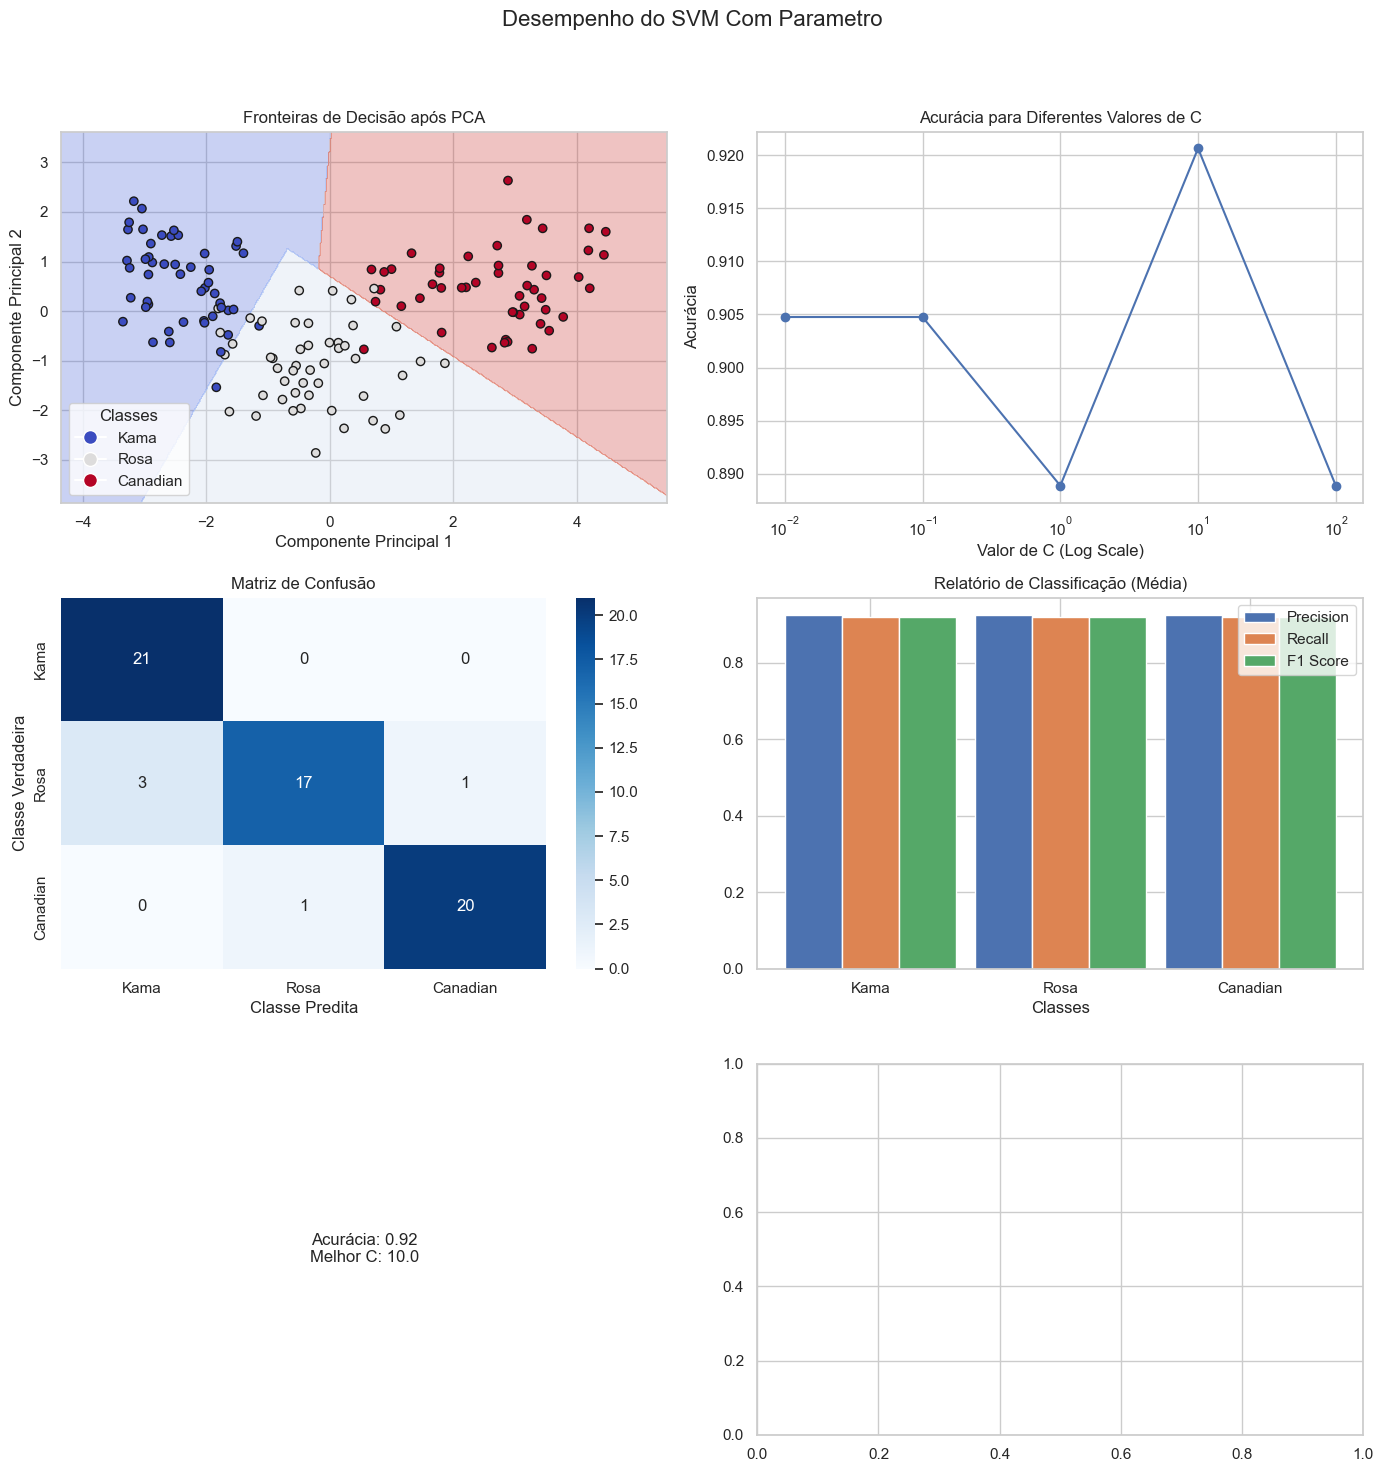

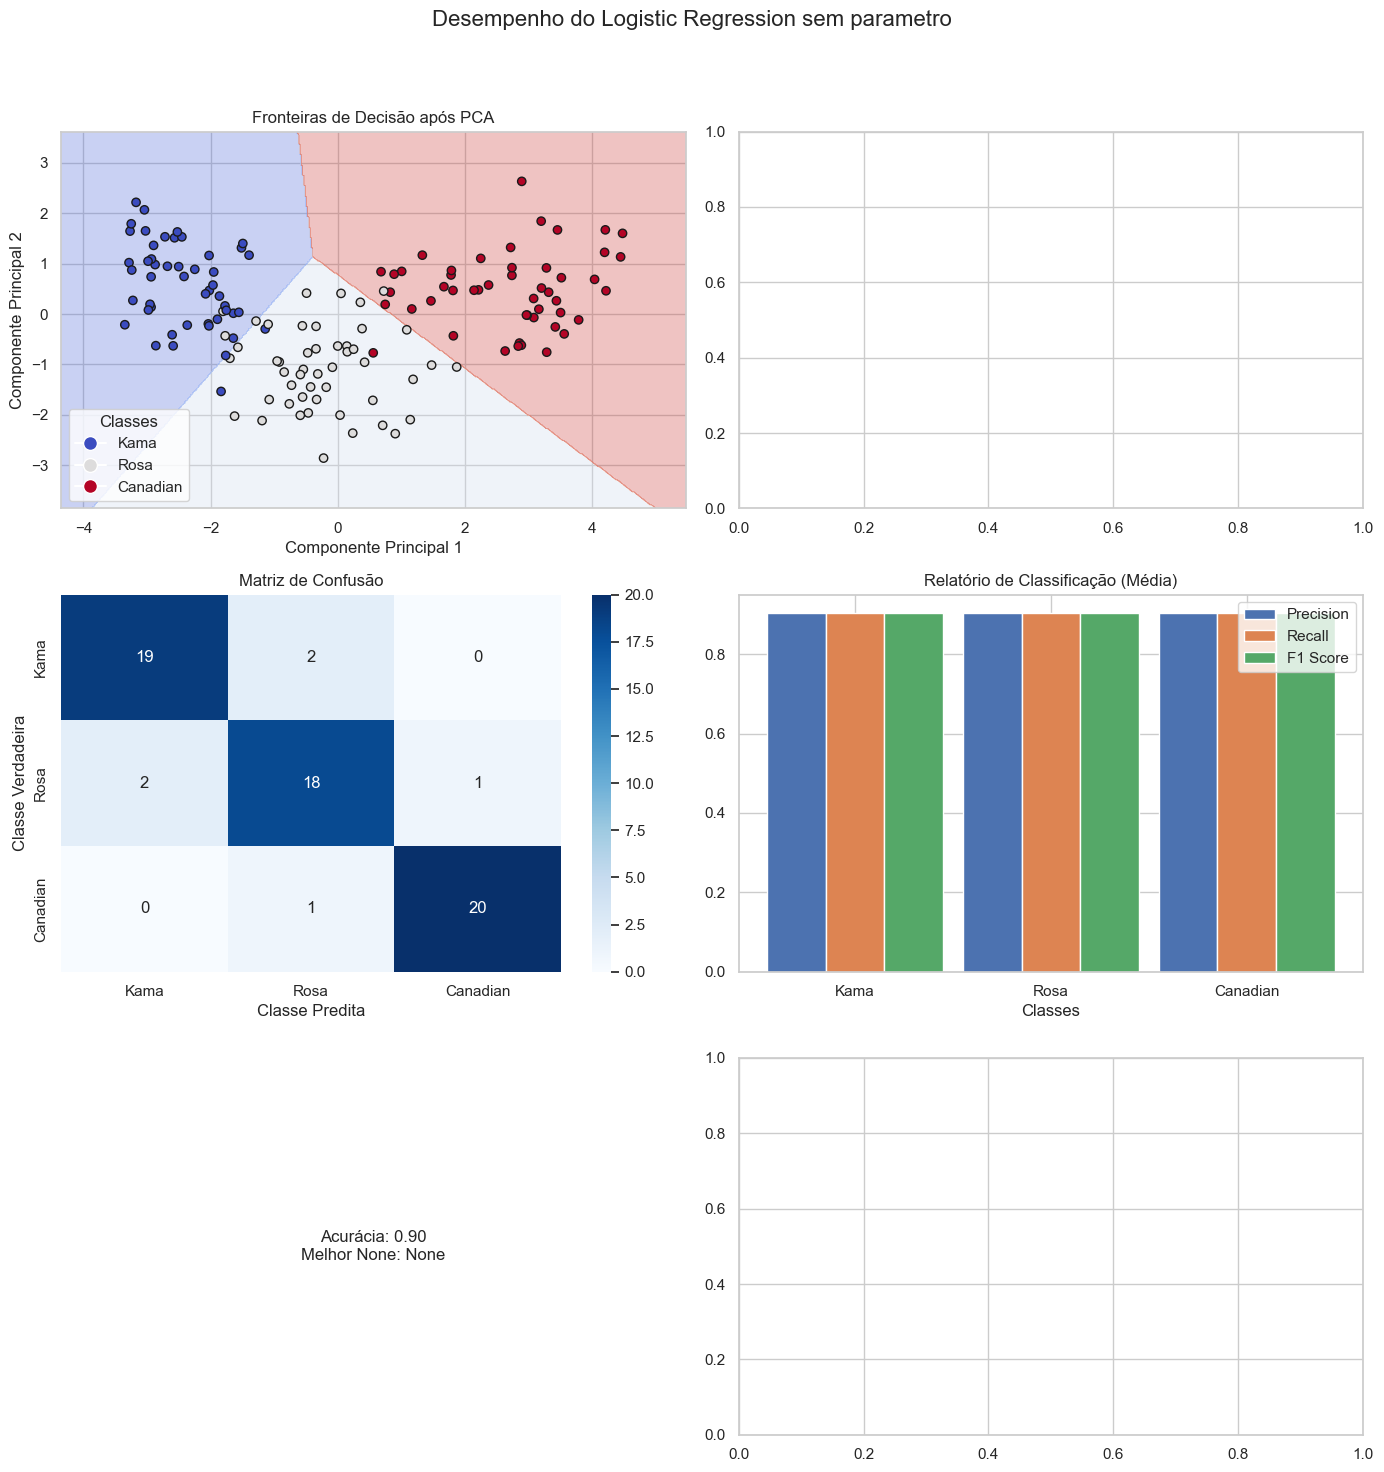

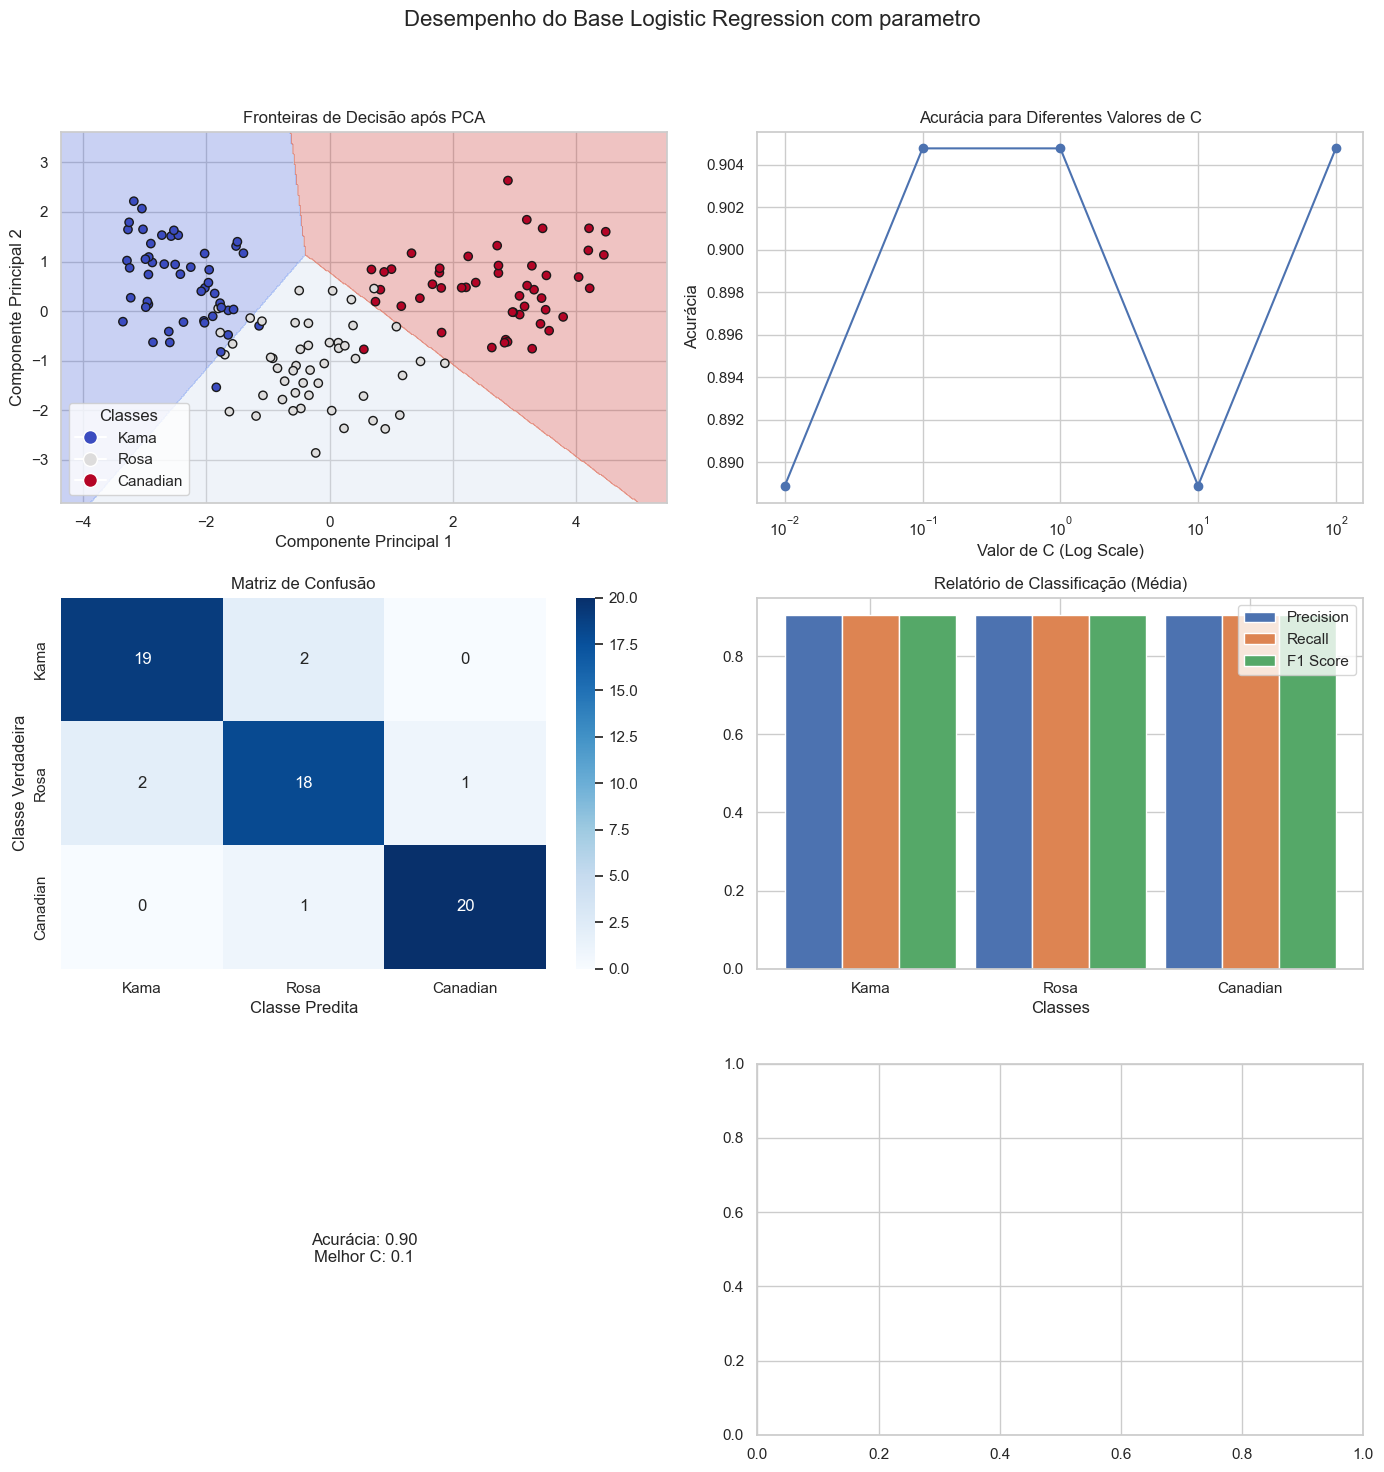

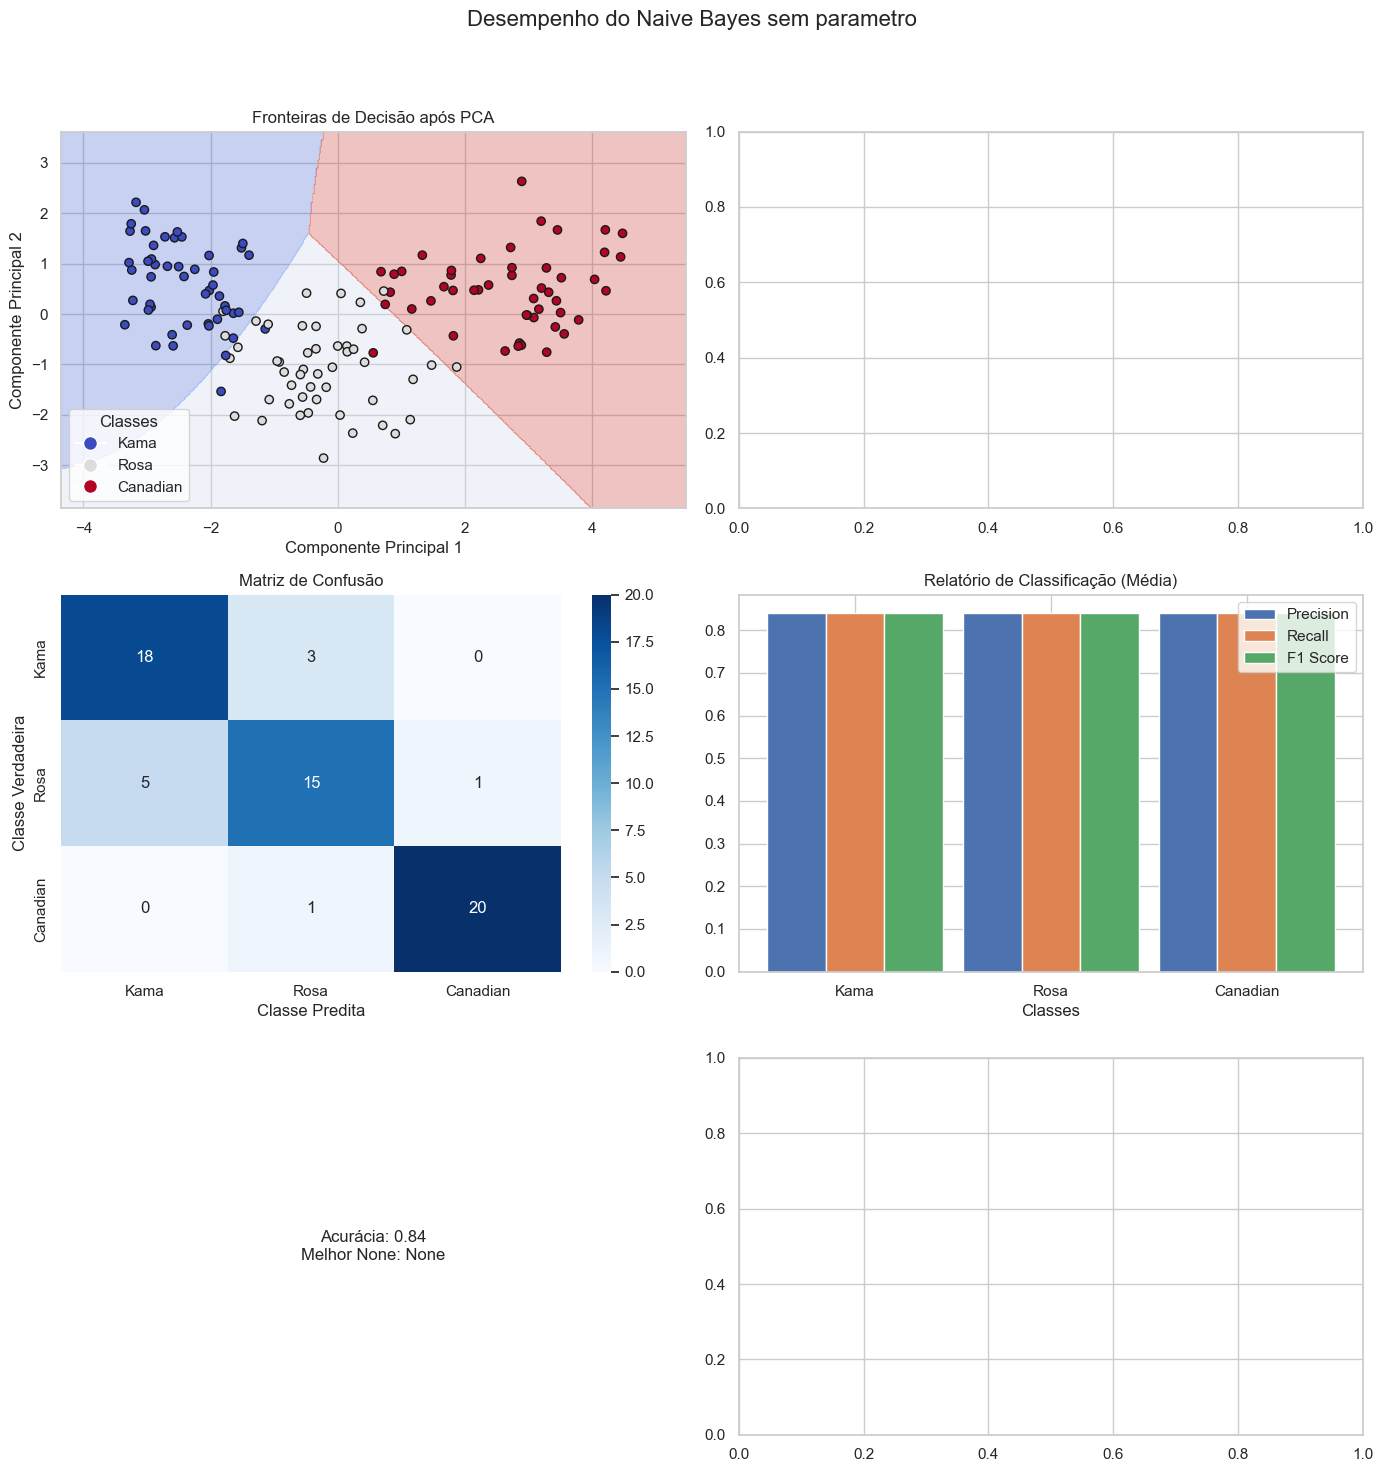

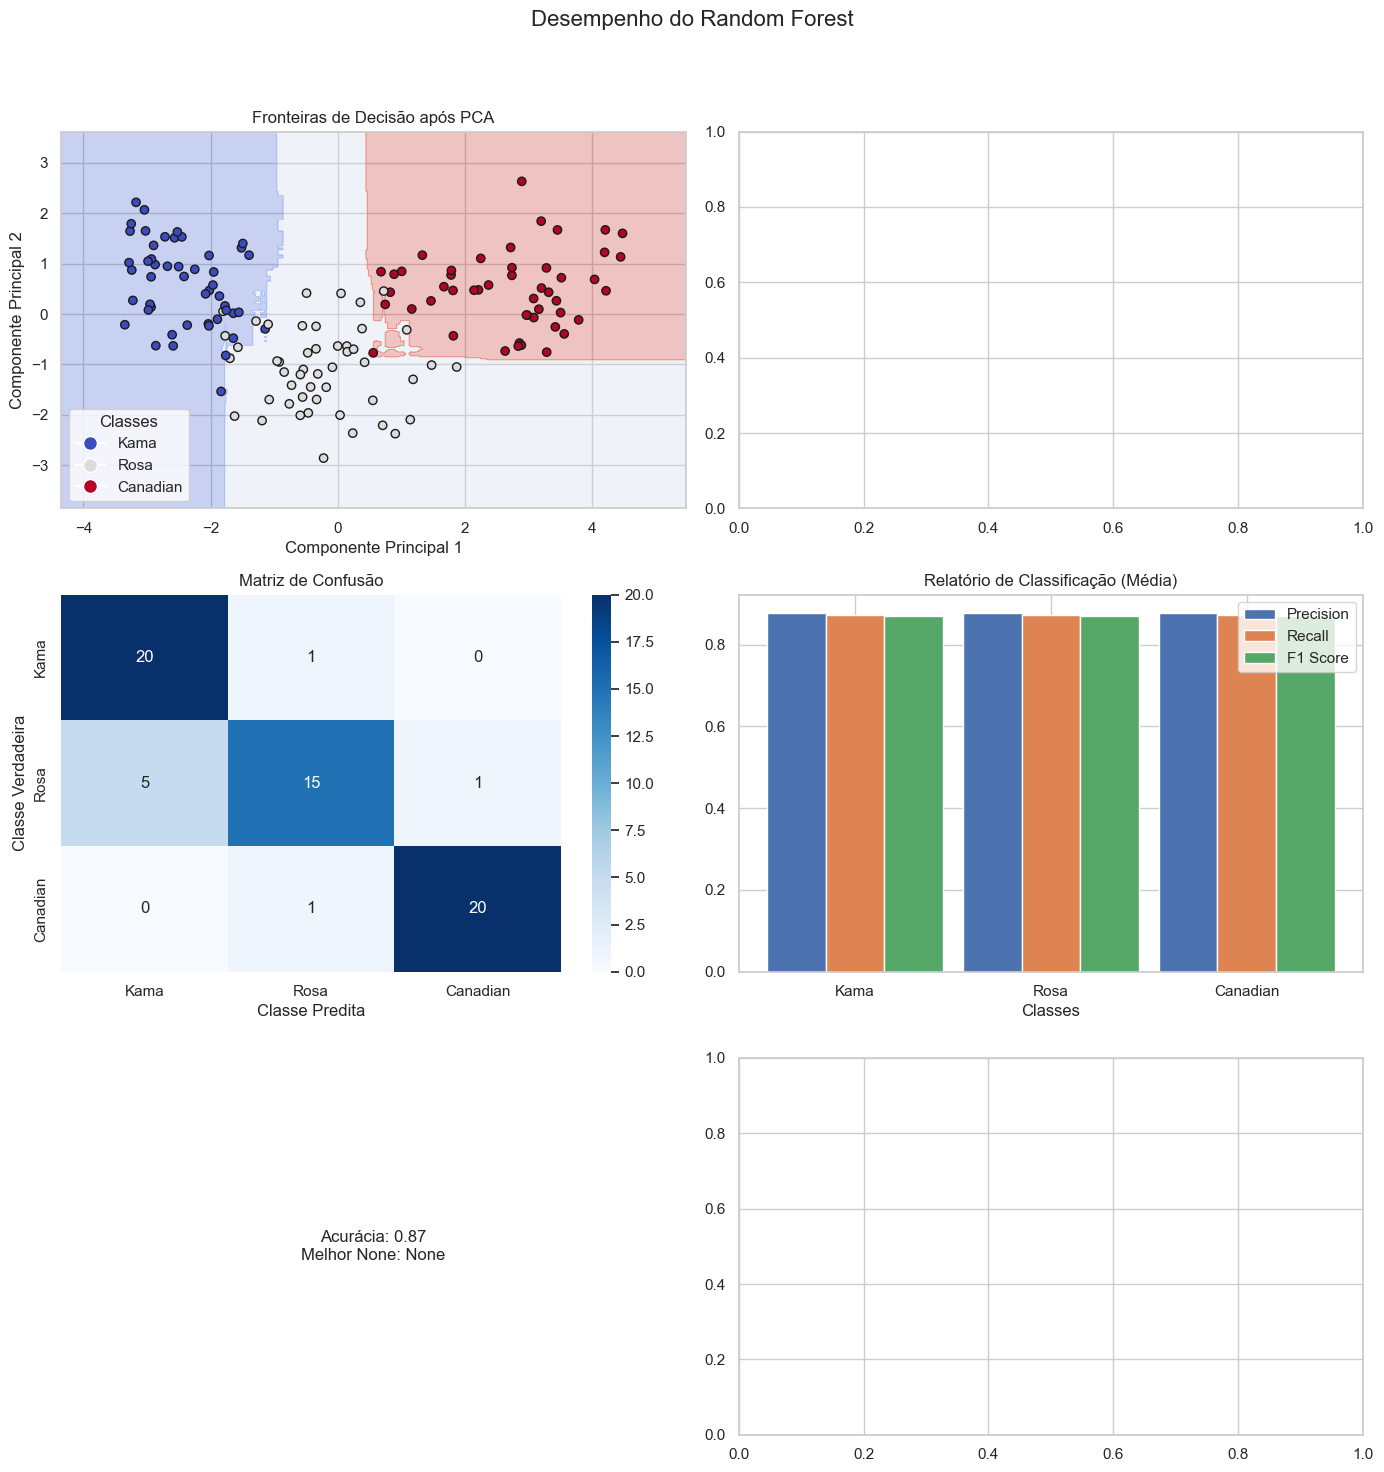

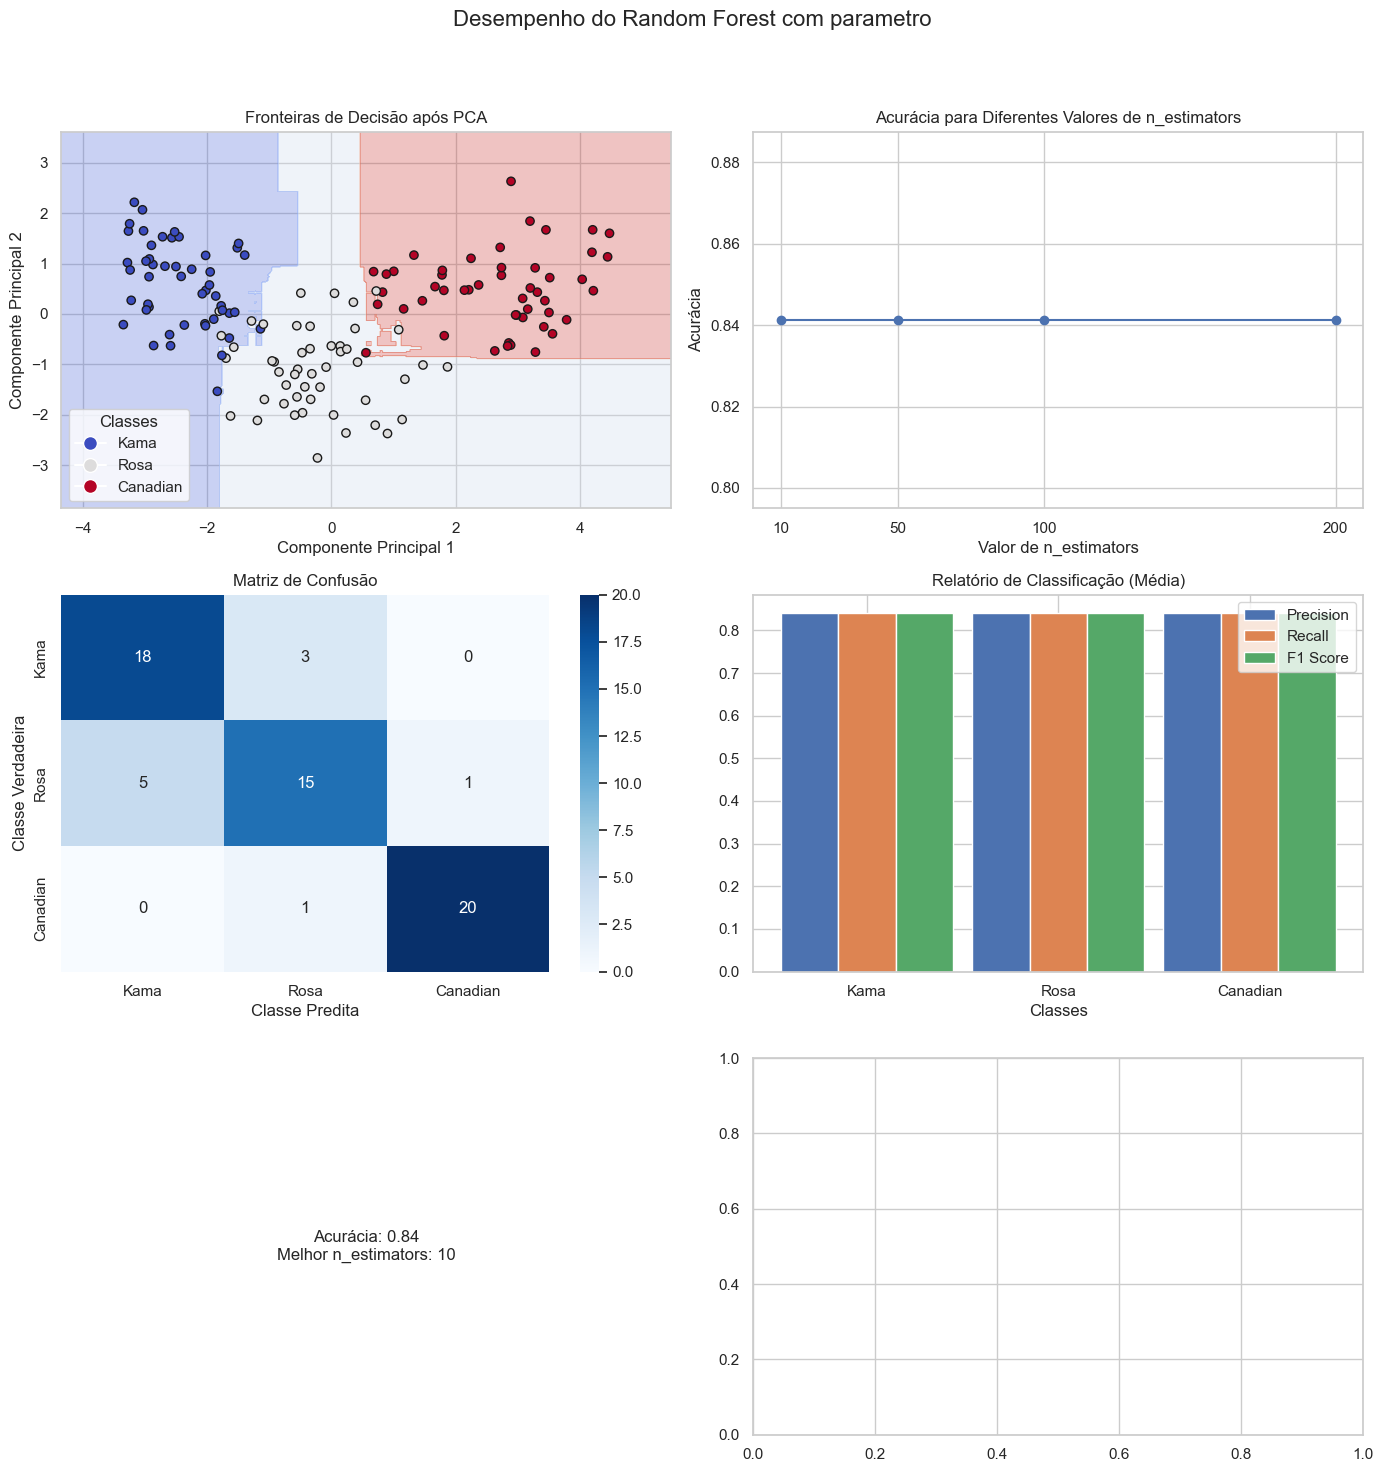

In [336]:
# Exemplo de uso com duas configurações
config_knn_sem_parametros = ['KNN Sem Parametro', X_train, X_test, y_train, y_test, 
              KNeighborsClassifier(), 'KNN', 
              None, None]

config_knn = ['KNN Com Parametro',  X_train, X_test, y_train, y_test, 
              KNeighborsClassifier(), 'KNN', 
              {'n_neighbors': range(1, 21)}, 'n_neighbors']

config_sem_parametro = ['SVM Sem Parametro',  X_train, X_test, y_train, y_test, 
              SVC(kernel='linear'), 'SVM', 
              None, None]

config_svm = ['SVM Com Parametro', X_train, X_test, y_train, y_test, 
              SVC(kernel='linear'), 'SVM', 
              {'C': np.logspace(-2, 2, 5)}, 'C']


config_logic_regression_sem_parametro = ['Logistic Regression sem parametro',  X_train, X_test, y_train, y_test, 
                           LogisticRegression(max_iter=1000), 'Logistic Regression', 
                           None, None]

config_logic_regression = ['Base Logistic Regression com parametro', X_train, X_test, y_train, y_test, 
                           LogisticRegression(max_iter=1000), 'Logistic Regression', 
                           {'C': np.logspace(-2, 2, 5)}, 'C']

config_naive_bayes_sem_parametro = ['Naive Bayes sem parametro',  X_train, X_test, y_train, y_test, 
                      GaussianNB(), 'Naive Bayes', None, None]

config_random_forest_sem_parametro = ['Random Forest', X_train, X_test, y_train, y_test, 
                        RandomForestClassifier(), 'Random Forest', 
                        None, None]


config_random_forest = ['Random Forest com parametro',  X_train, X_test, y_train, y_test, 
                        RandomForestClassifier(), 'Random Forest', 
                        {'n_estimators': [10, 50, 100, 200]}, 'n_estimators']


teste_todos = [config_knn_sem_parametros, config_knn, config_sem_parametro, config_svm, config_logic_regression_sem_parametro, config_logic_regression, config_naive_bayes_sem_parametro, config_random_forest_sem_parametro, config_random_forest]
results = evaluate_model(teste_todos)

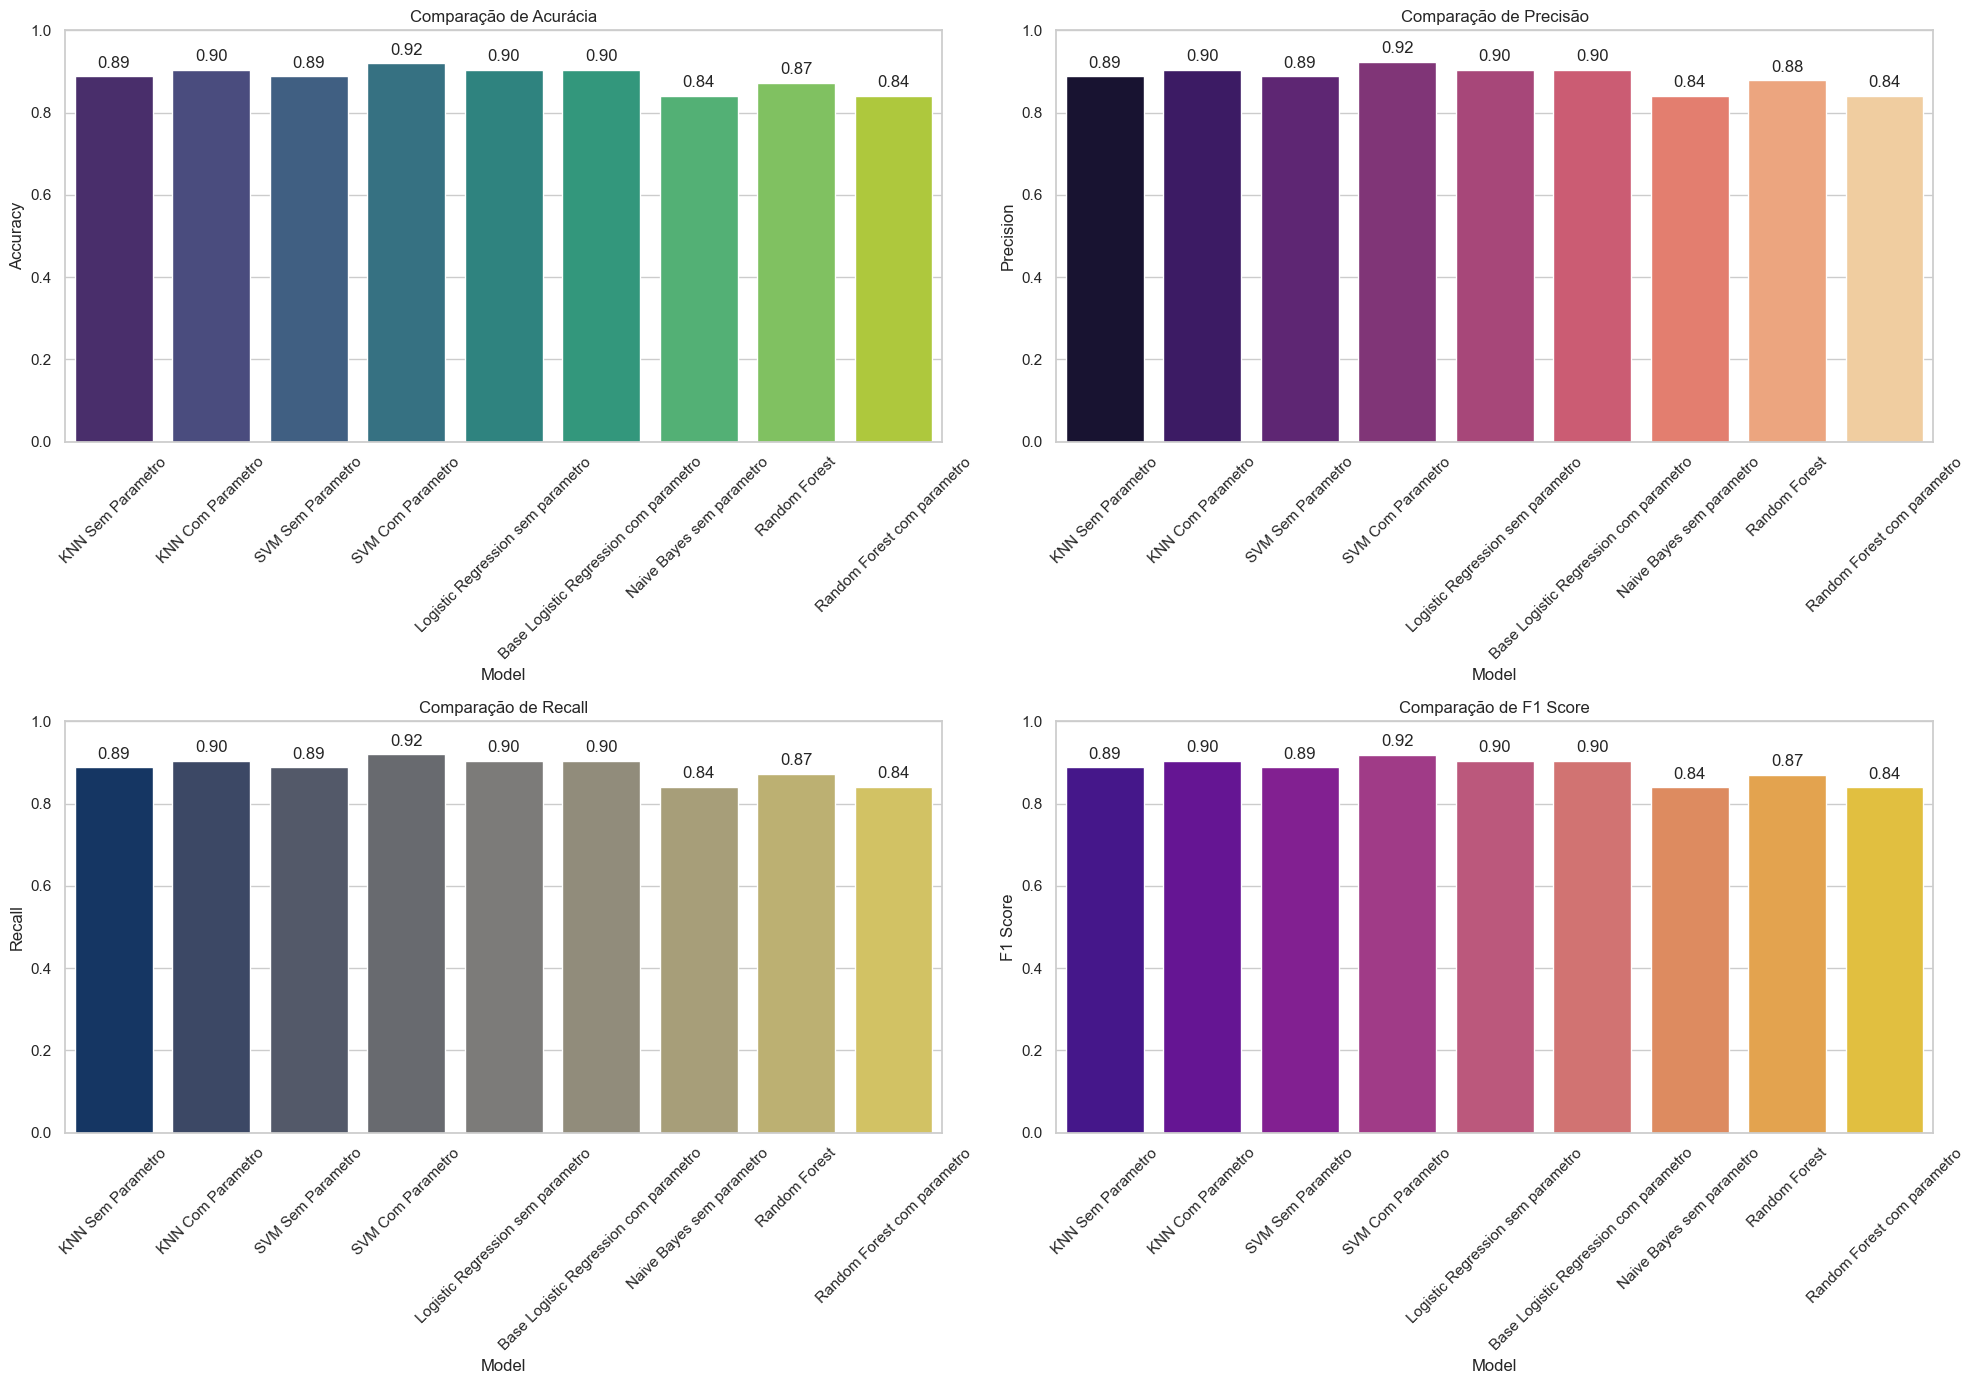

O melhor modelo é 'SVM Com Parametro' com a média de métricas de 0.92.
Desempenho detalhado: Acurácia = 0.92, Precisão = 0.92, Recall = 0.92, F1 Score = 0.92.


In [337]:
plot_comparative_metrics(results)


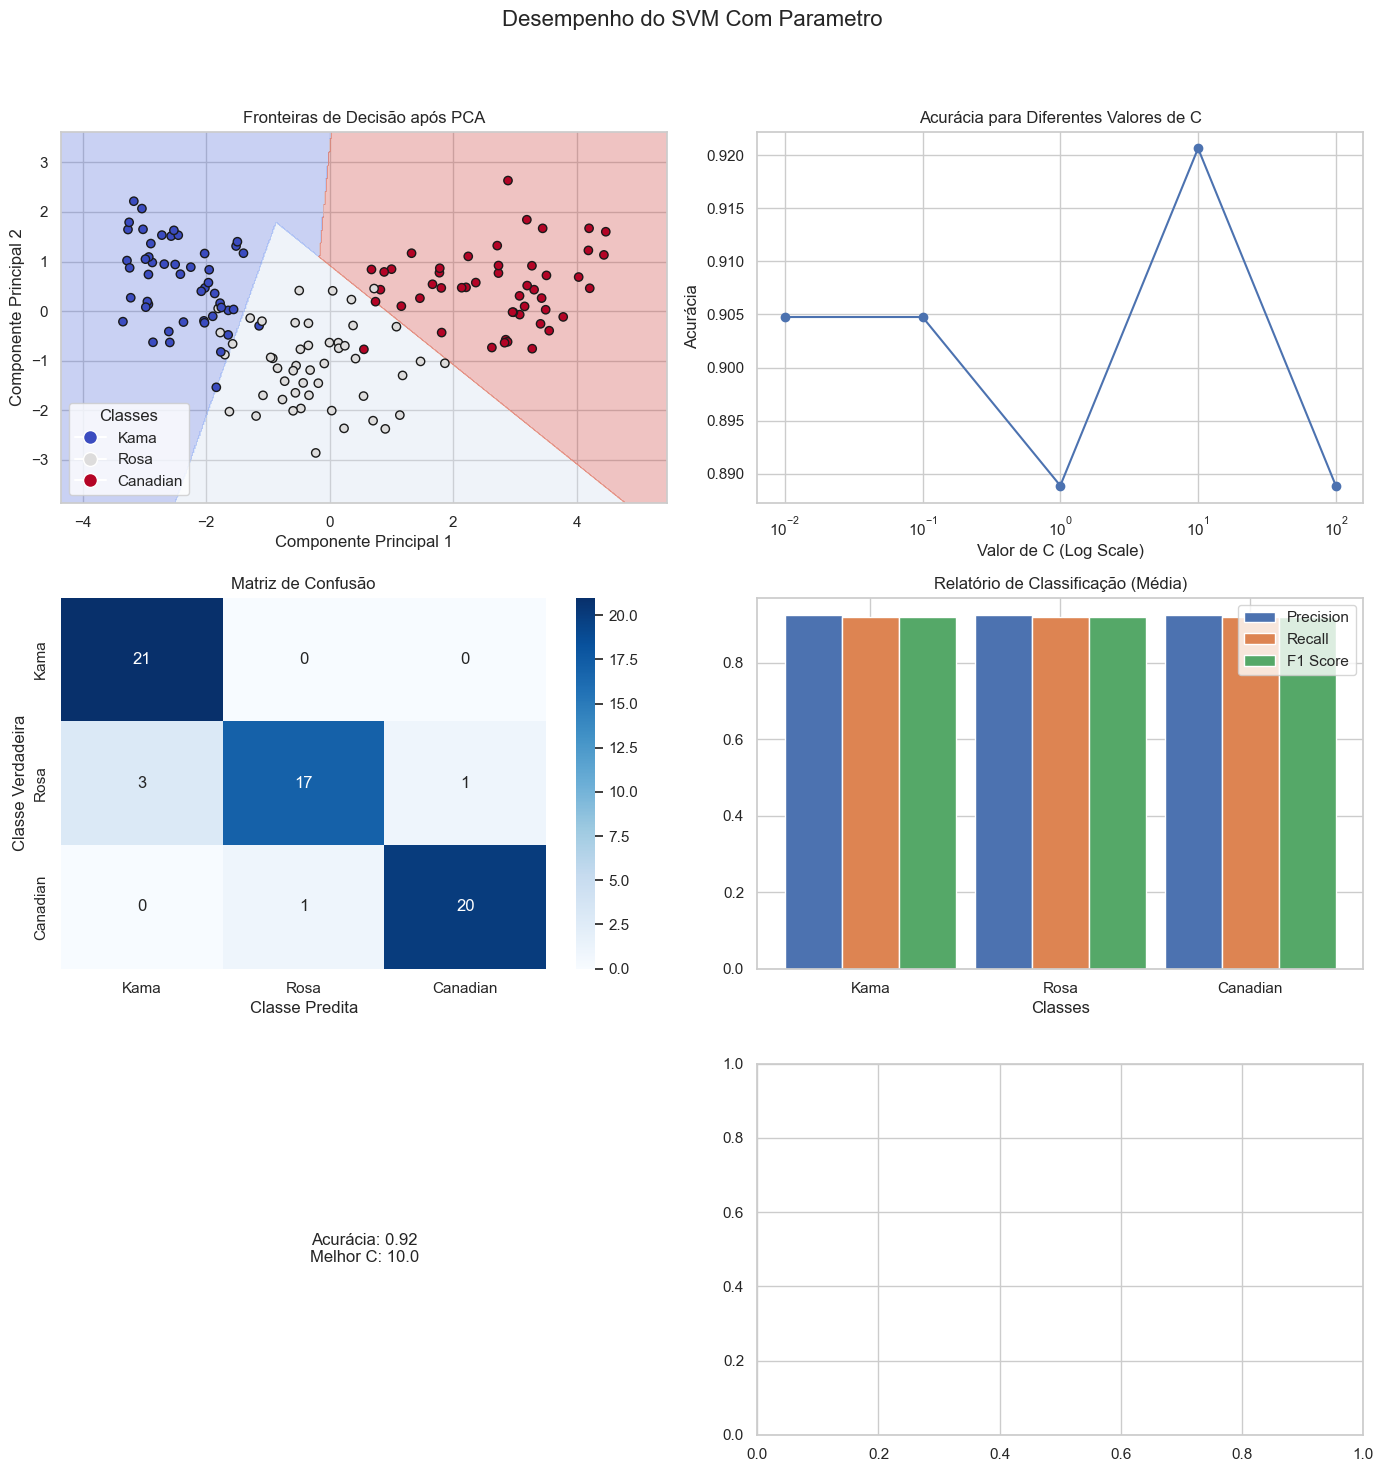

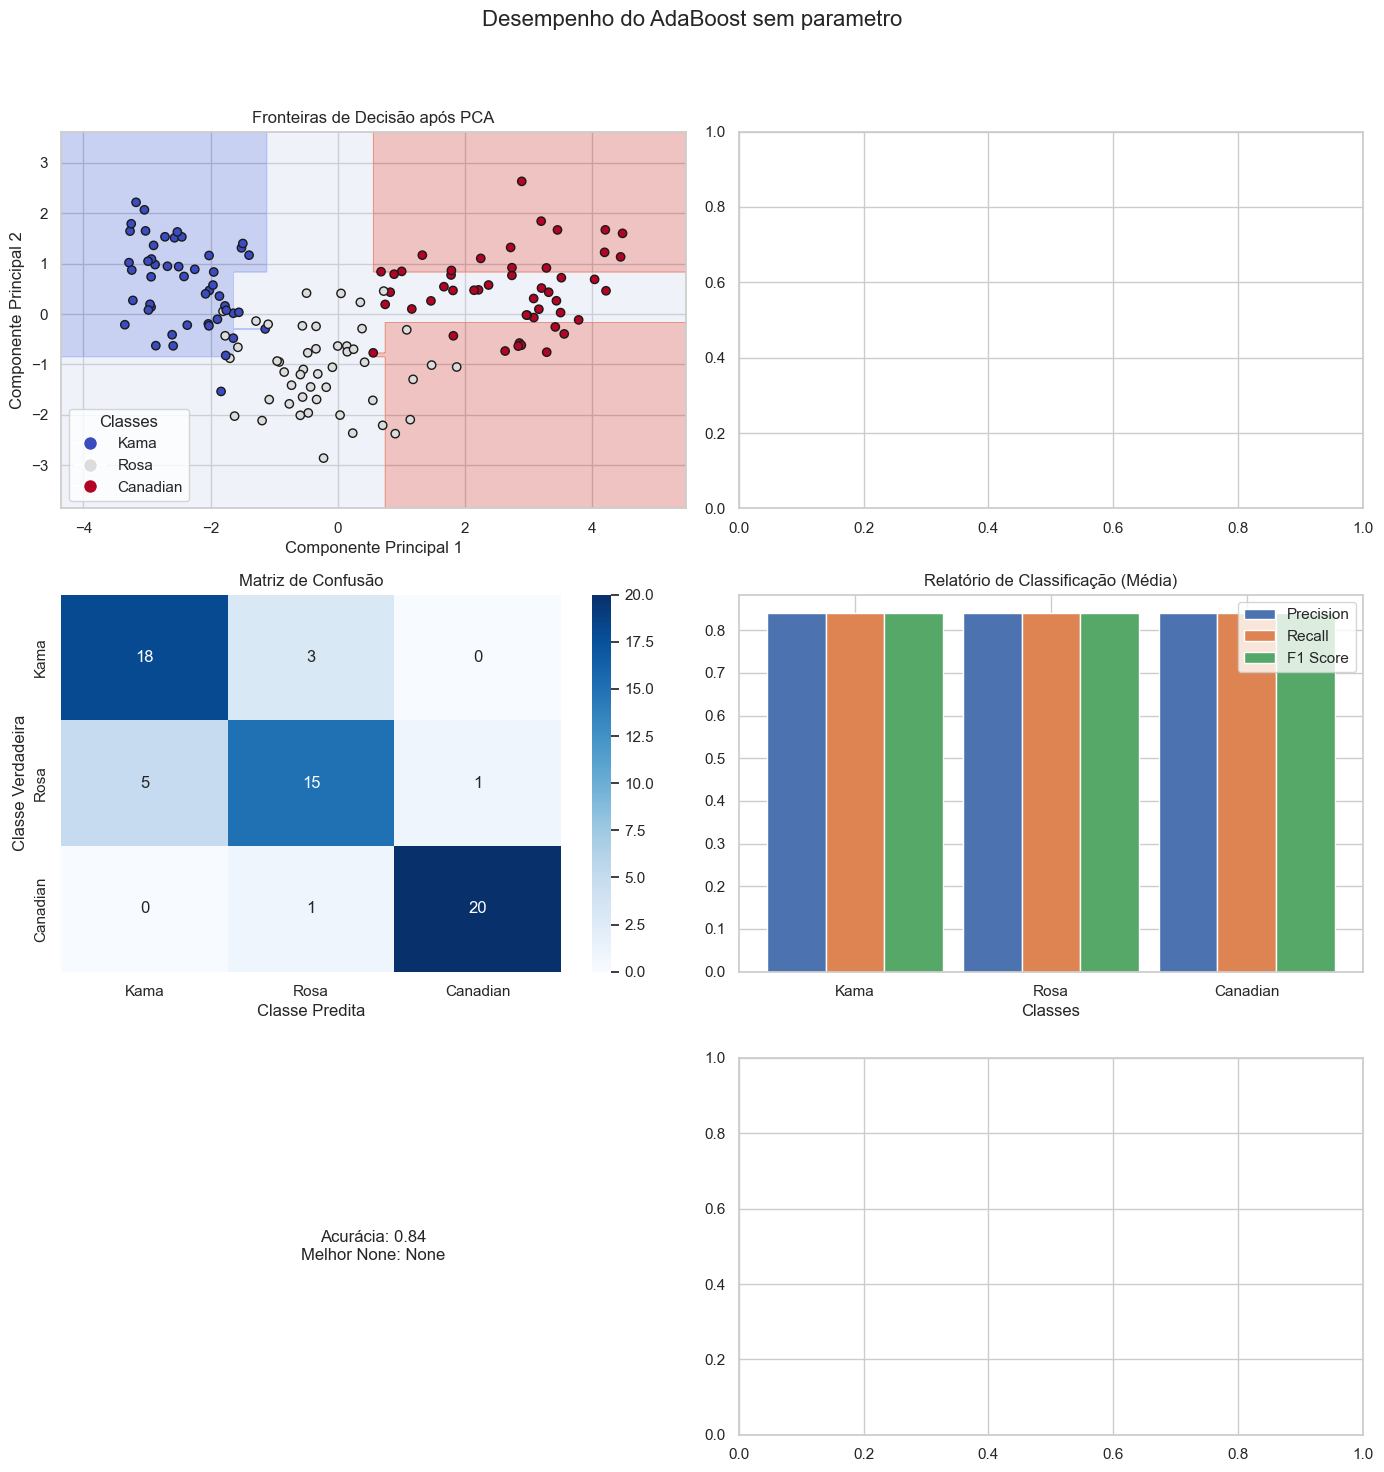

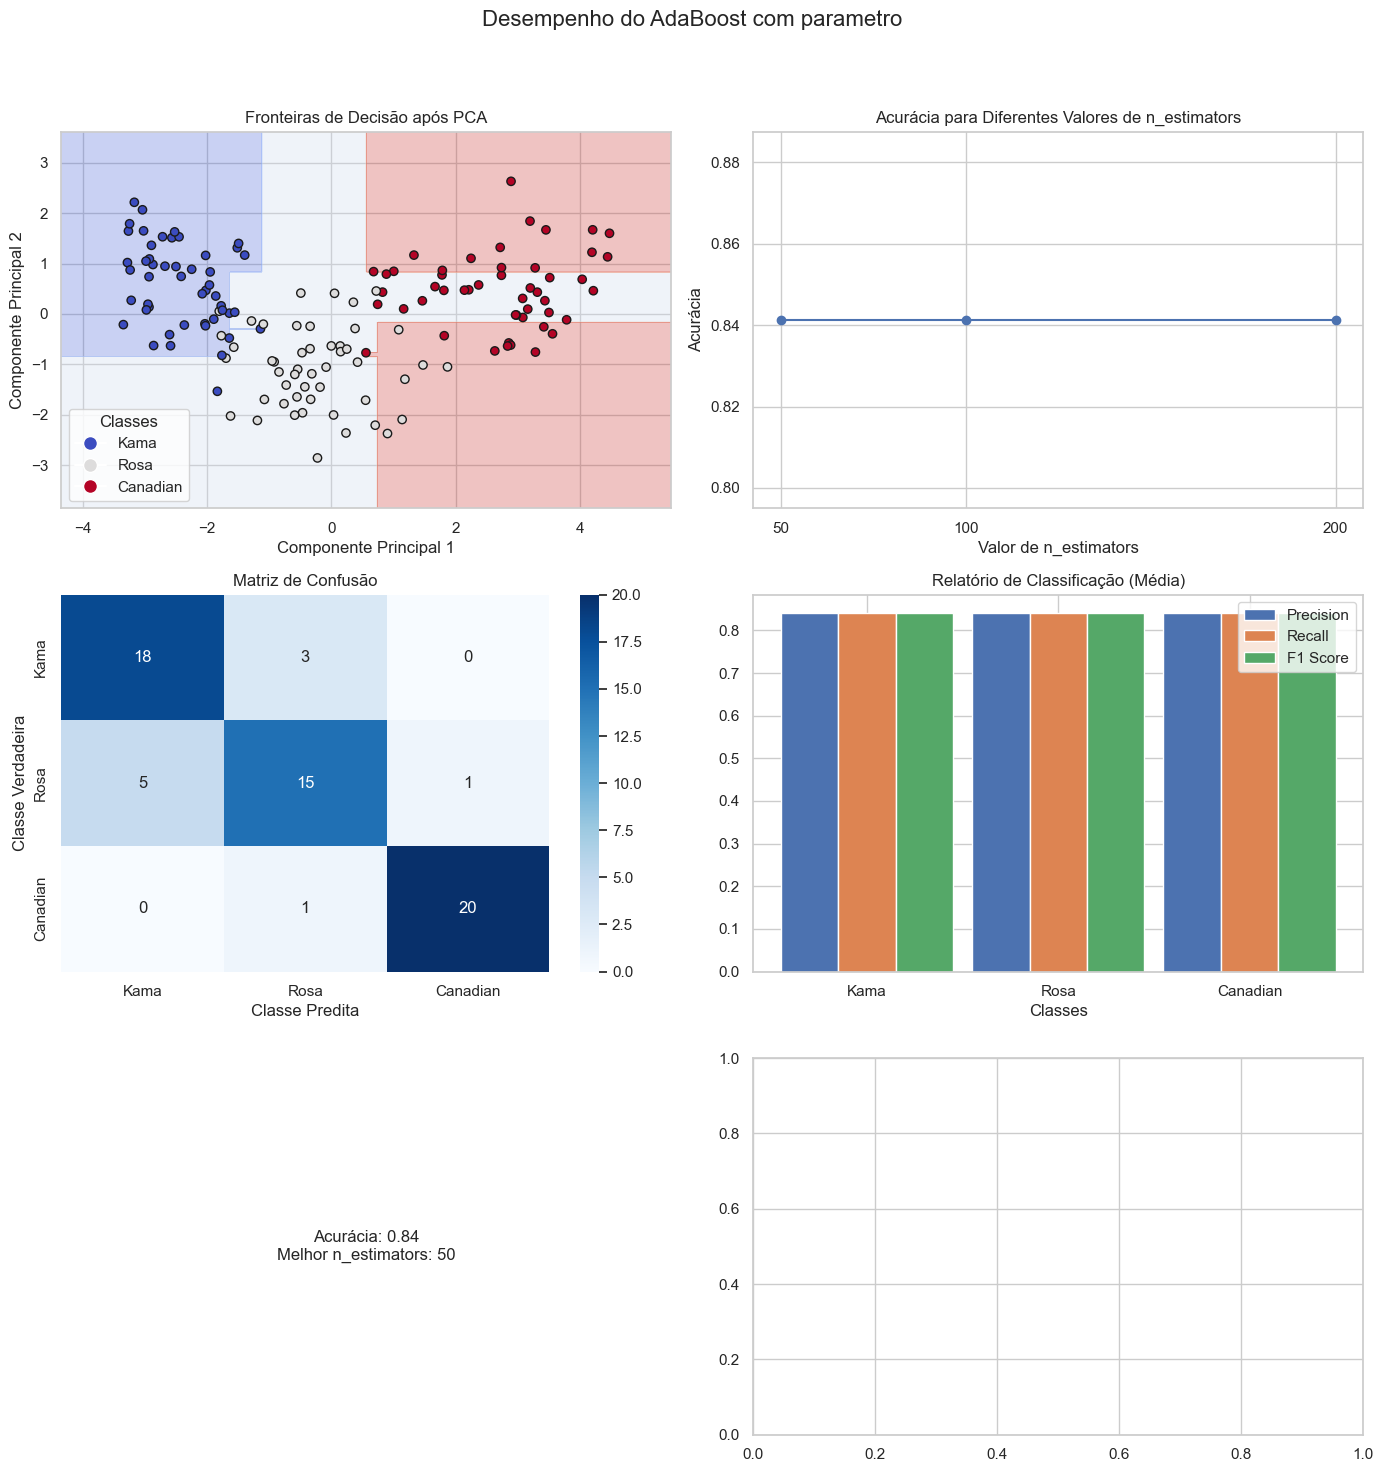

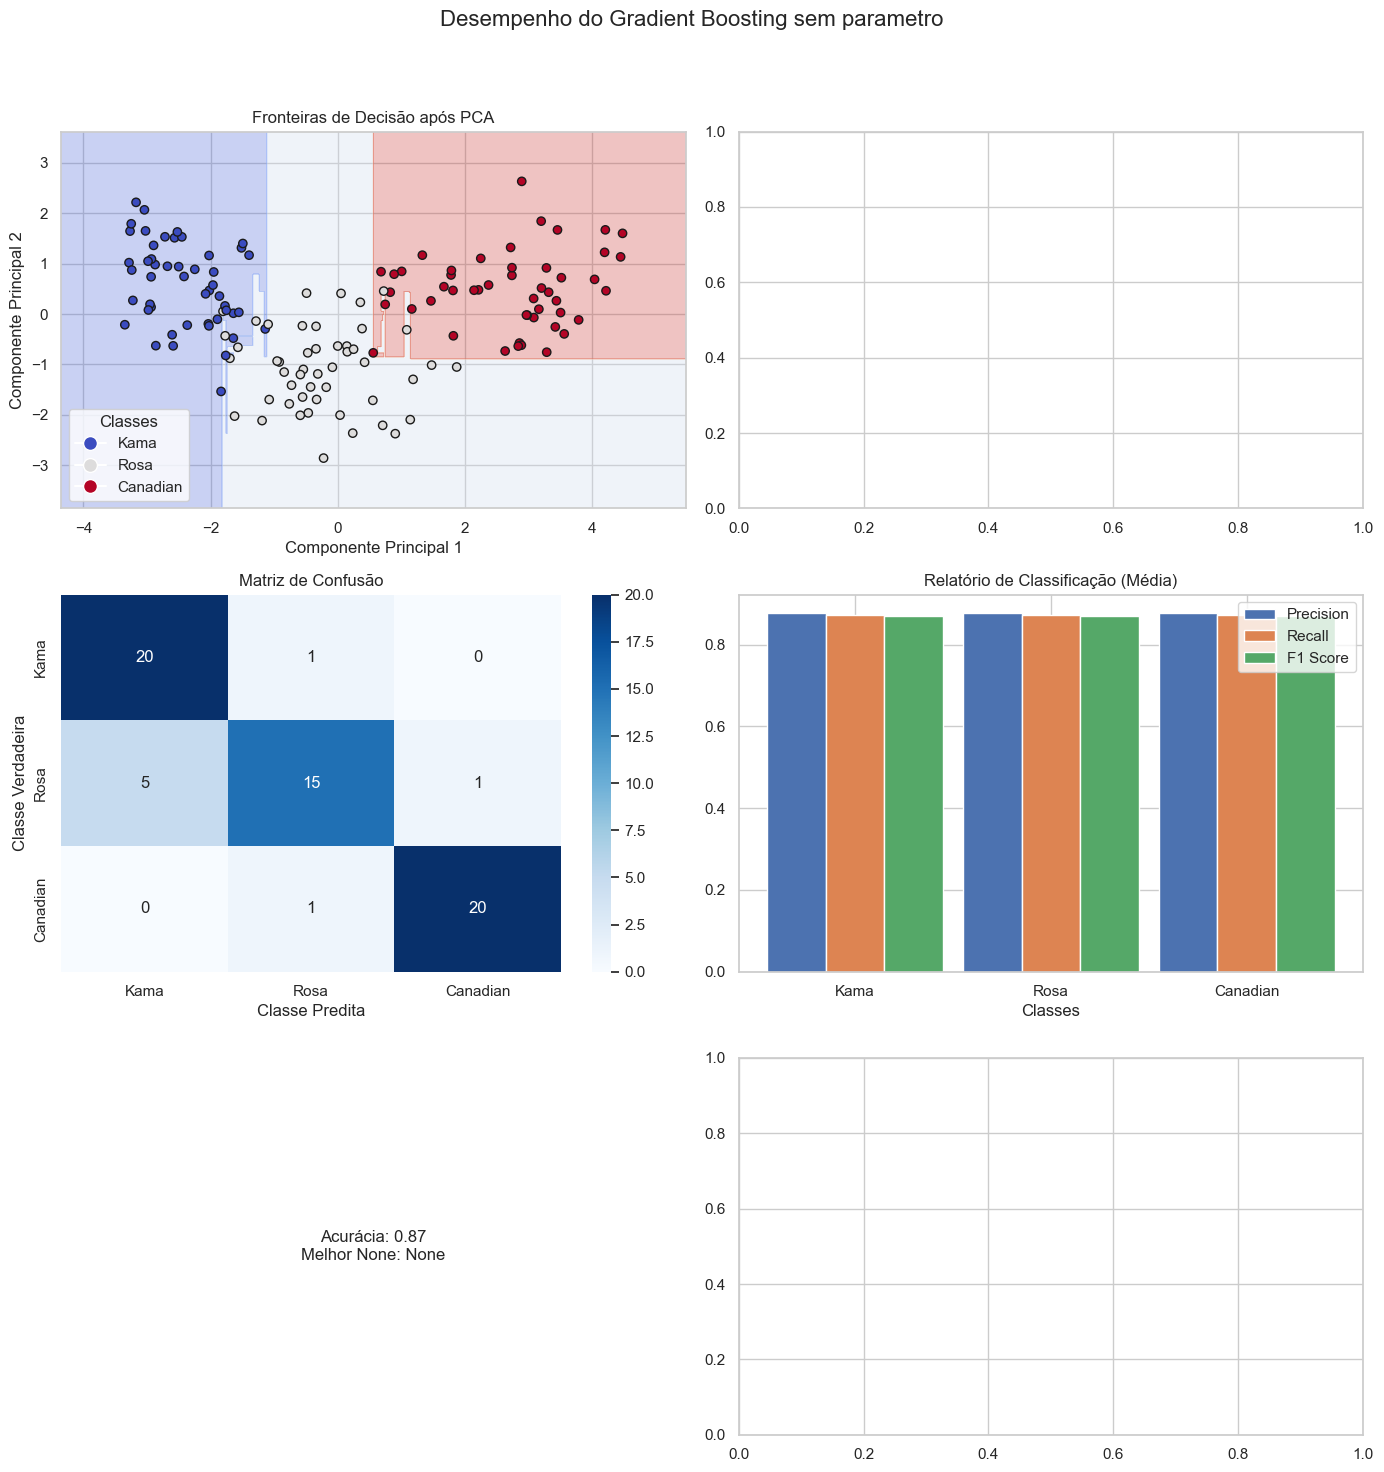

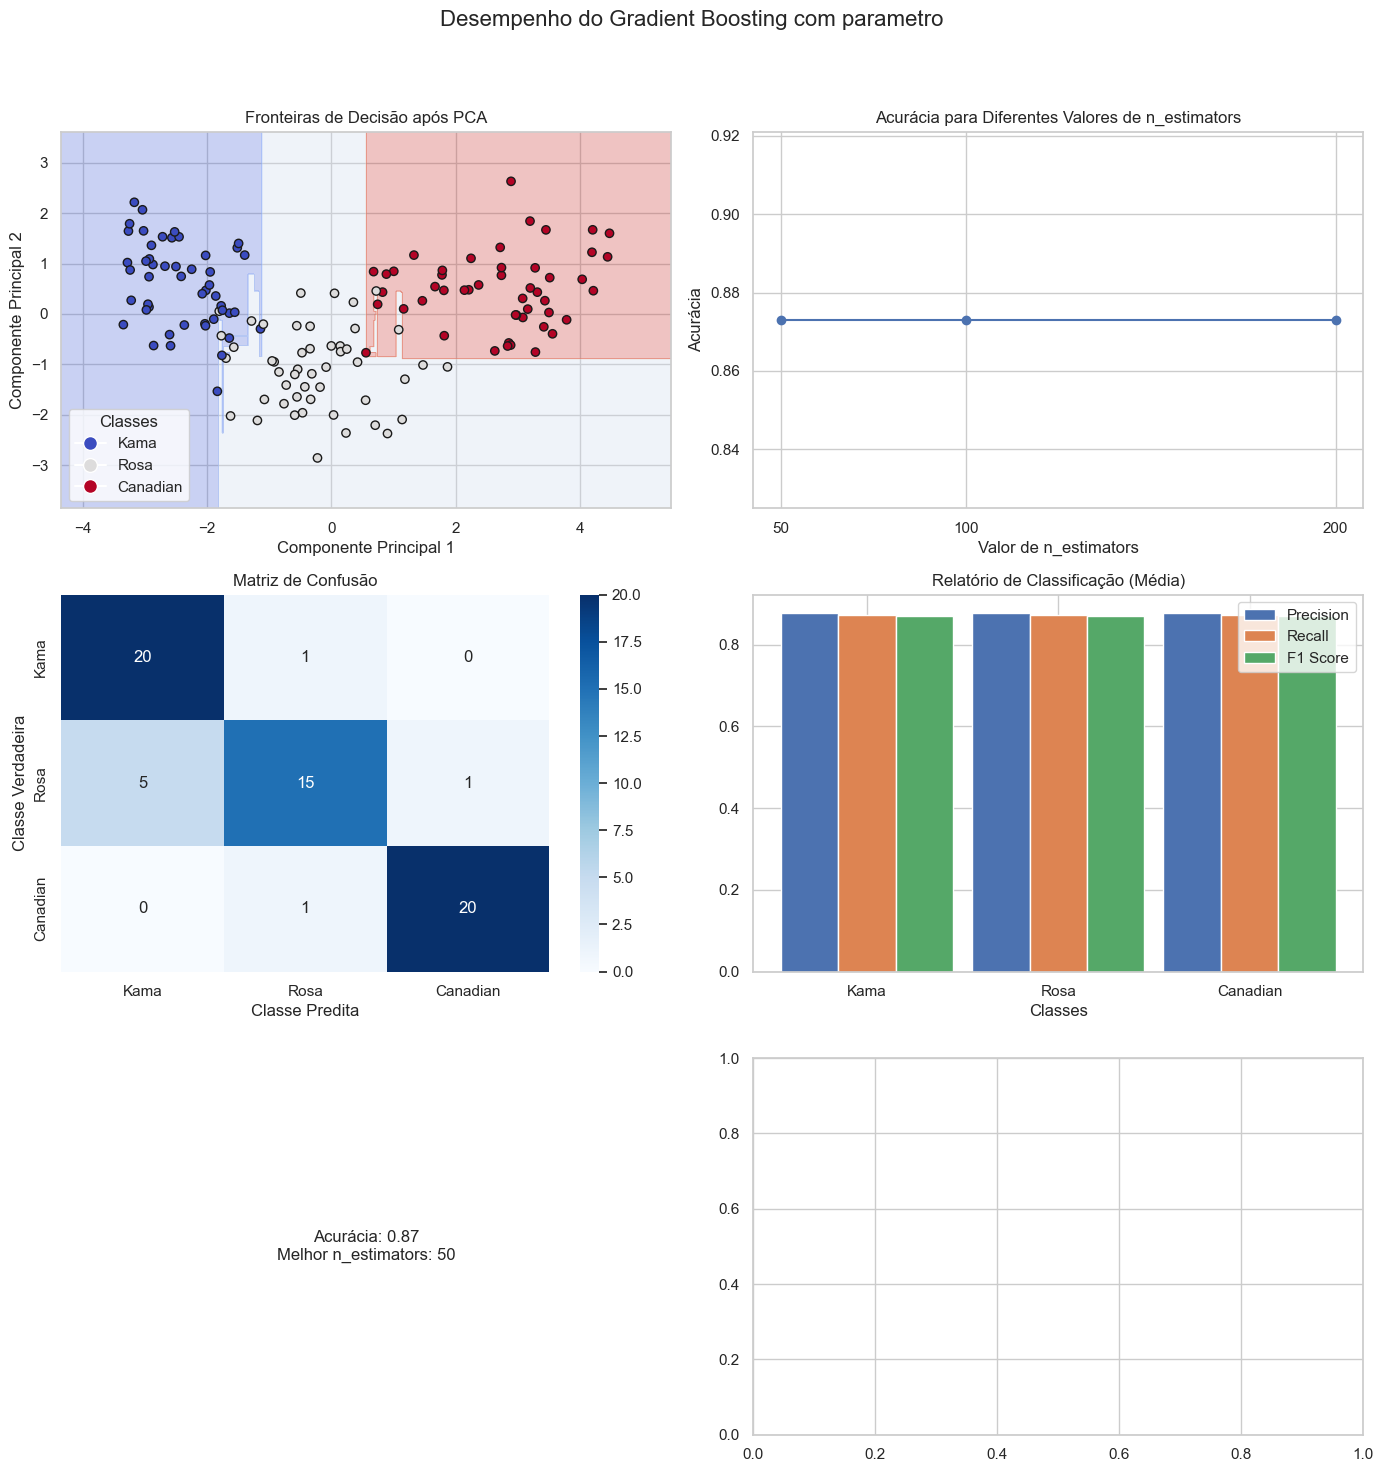

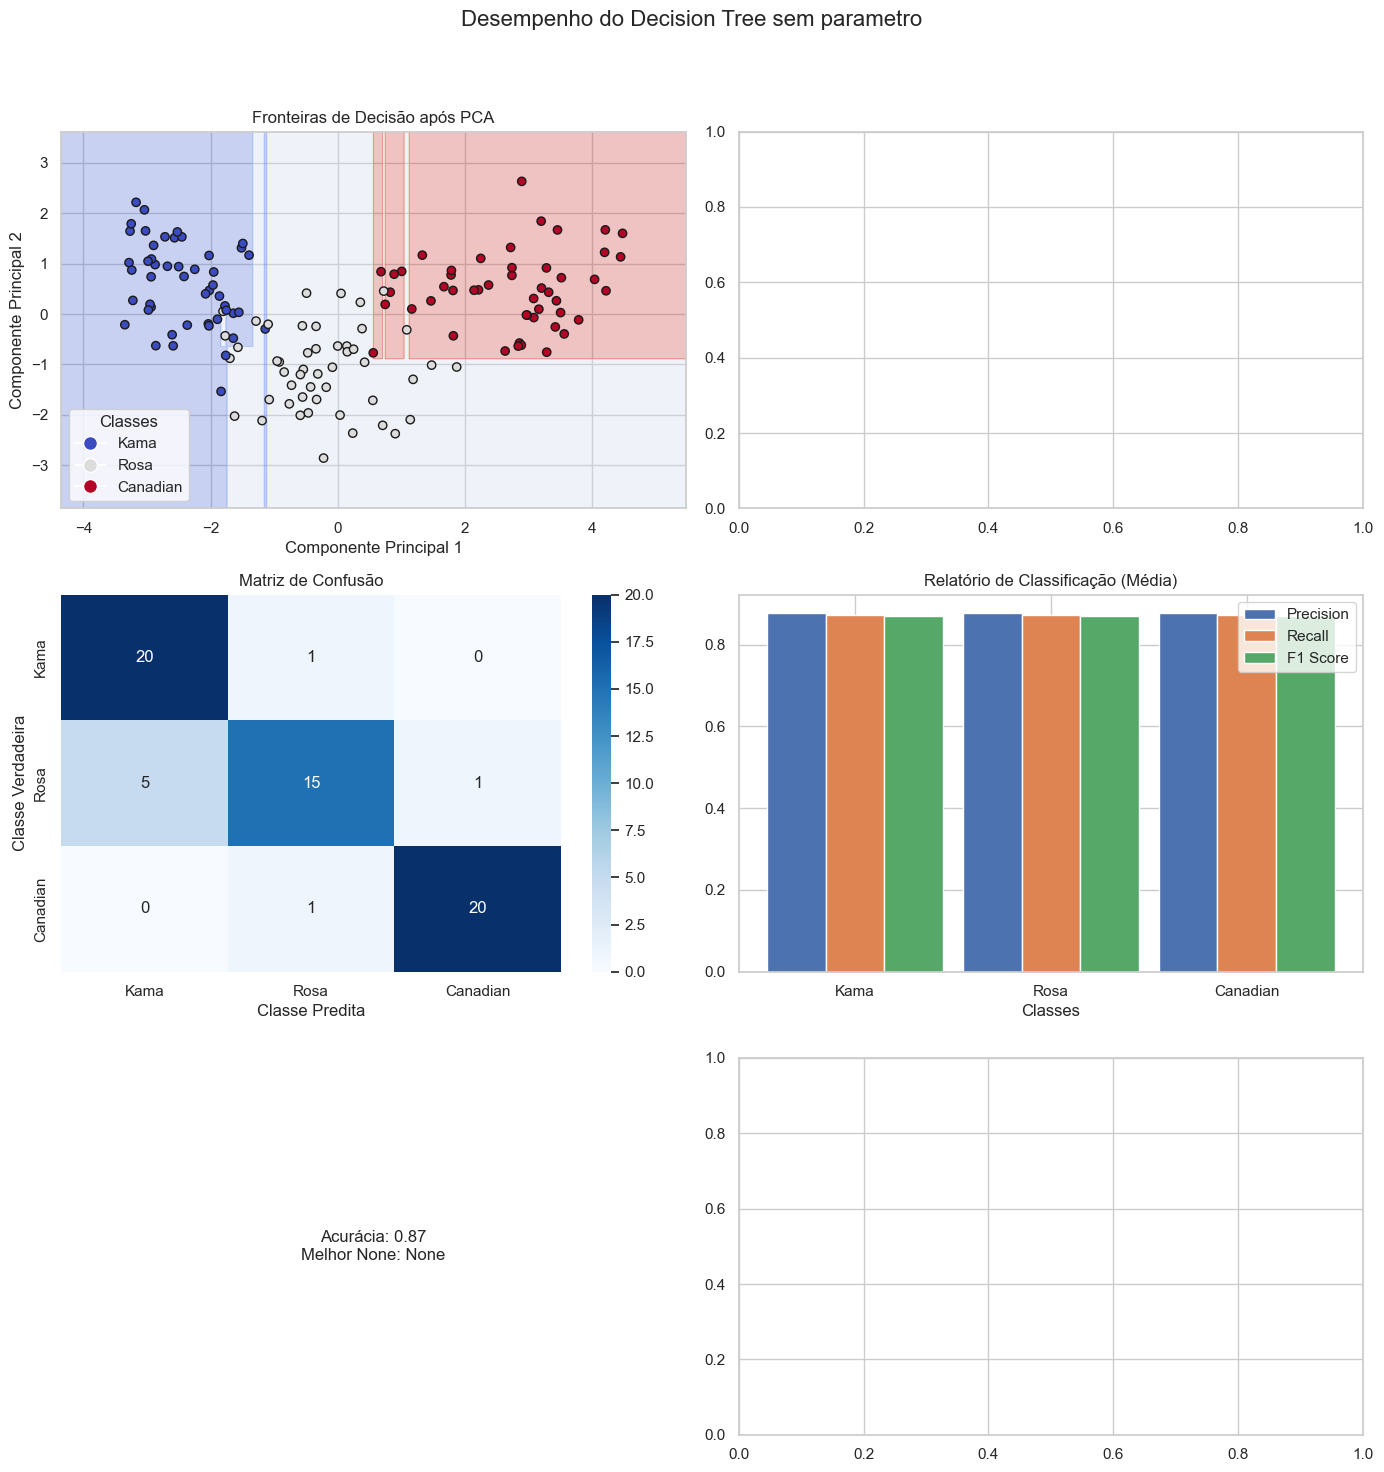

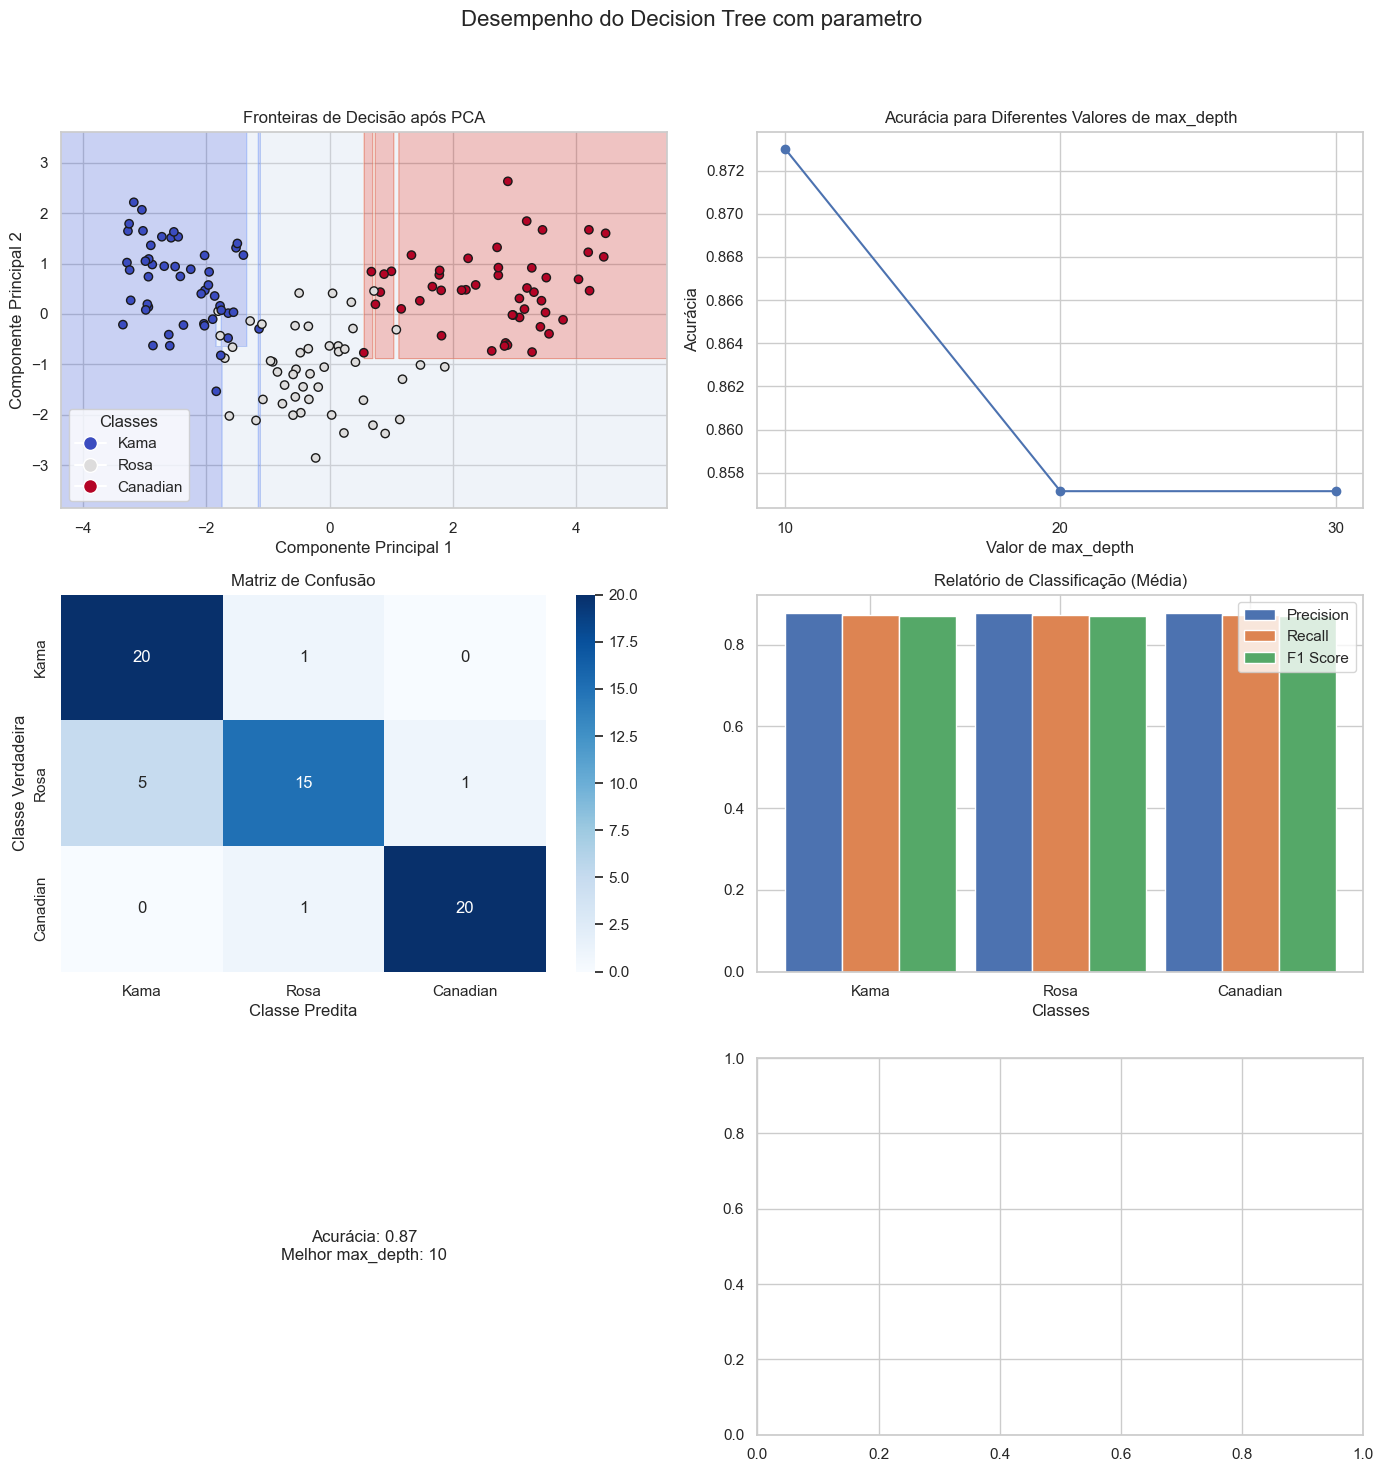

In [338]:
config_gradient_boosting_sem_parametro = [
    'Gradient Boosting sem parametro', X_train, X_test, y_train, y_test,
    GradientBoostingClassifier(), 'Gradient Boosting',
    None, None
]

config_gradient_boosting = [
    'Gradient Boosting com parametro', X_train, X_test, y_train, y_test,
    GradientBoostingClassifier(), 'Gradient Boosting',
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}, 'n_estimators'
]

config_decision_tree_sem_parametro = [
    'Decision Tree sem parametro', X_train, X_test, y_train, y_test,
    DecisionTreeClassifier(), 'Decision Tree',
    None, None
]


config_decision_tree = [
    'Decision Tree com parametro', X_train, X_test, y_train, y_test,
    DecisionTreeClassifier(), 'Decision Tree',
    {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}, 'max_depth'
]

config_adaboost_sem_parametro = [
    'AdaBoost sem parametro', X_train, X_test, y_train, y_test,
    AdaBoostClassifier(), 'AdaBoost',
    None, None
]

config_adaboost = [
    'AdaBoost com parametro', X_train, X_test, y_train, y_test,
    AdaBoostClassifier(), 'AdaBoost',
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}, 'n_estimators'
]

teste_params = [
    config_svm,
    config_adaboost_sem_parametro, config_adaboost,
    config_gradient_boosting_sem_parametro, config_gradient_boosting,
    config_decision_tree_sem_parametro, config_decision_tree
]

# Avaliar todos os modelos
results = evaluate_model(teste_params)


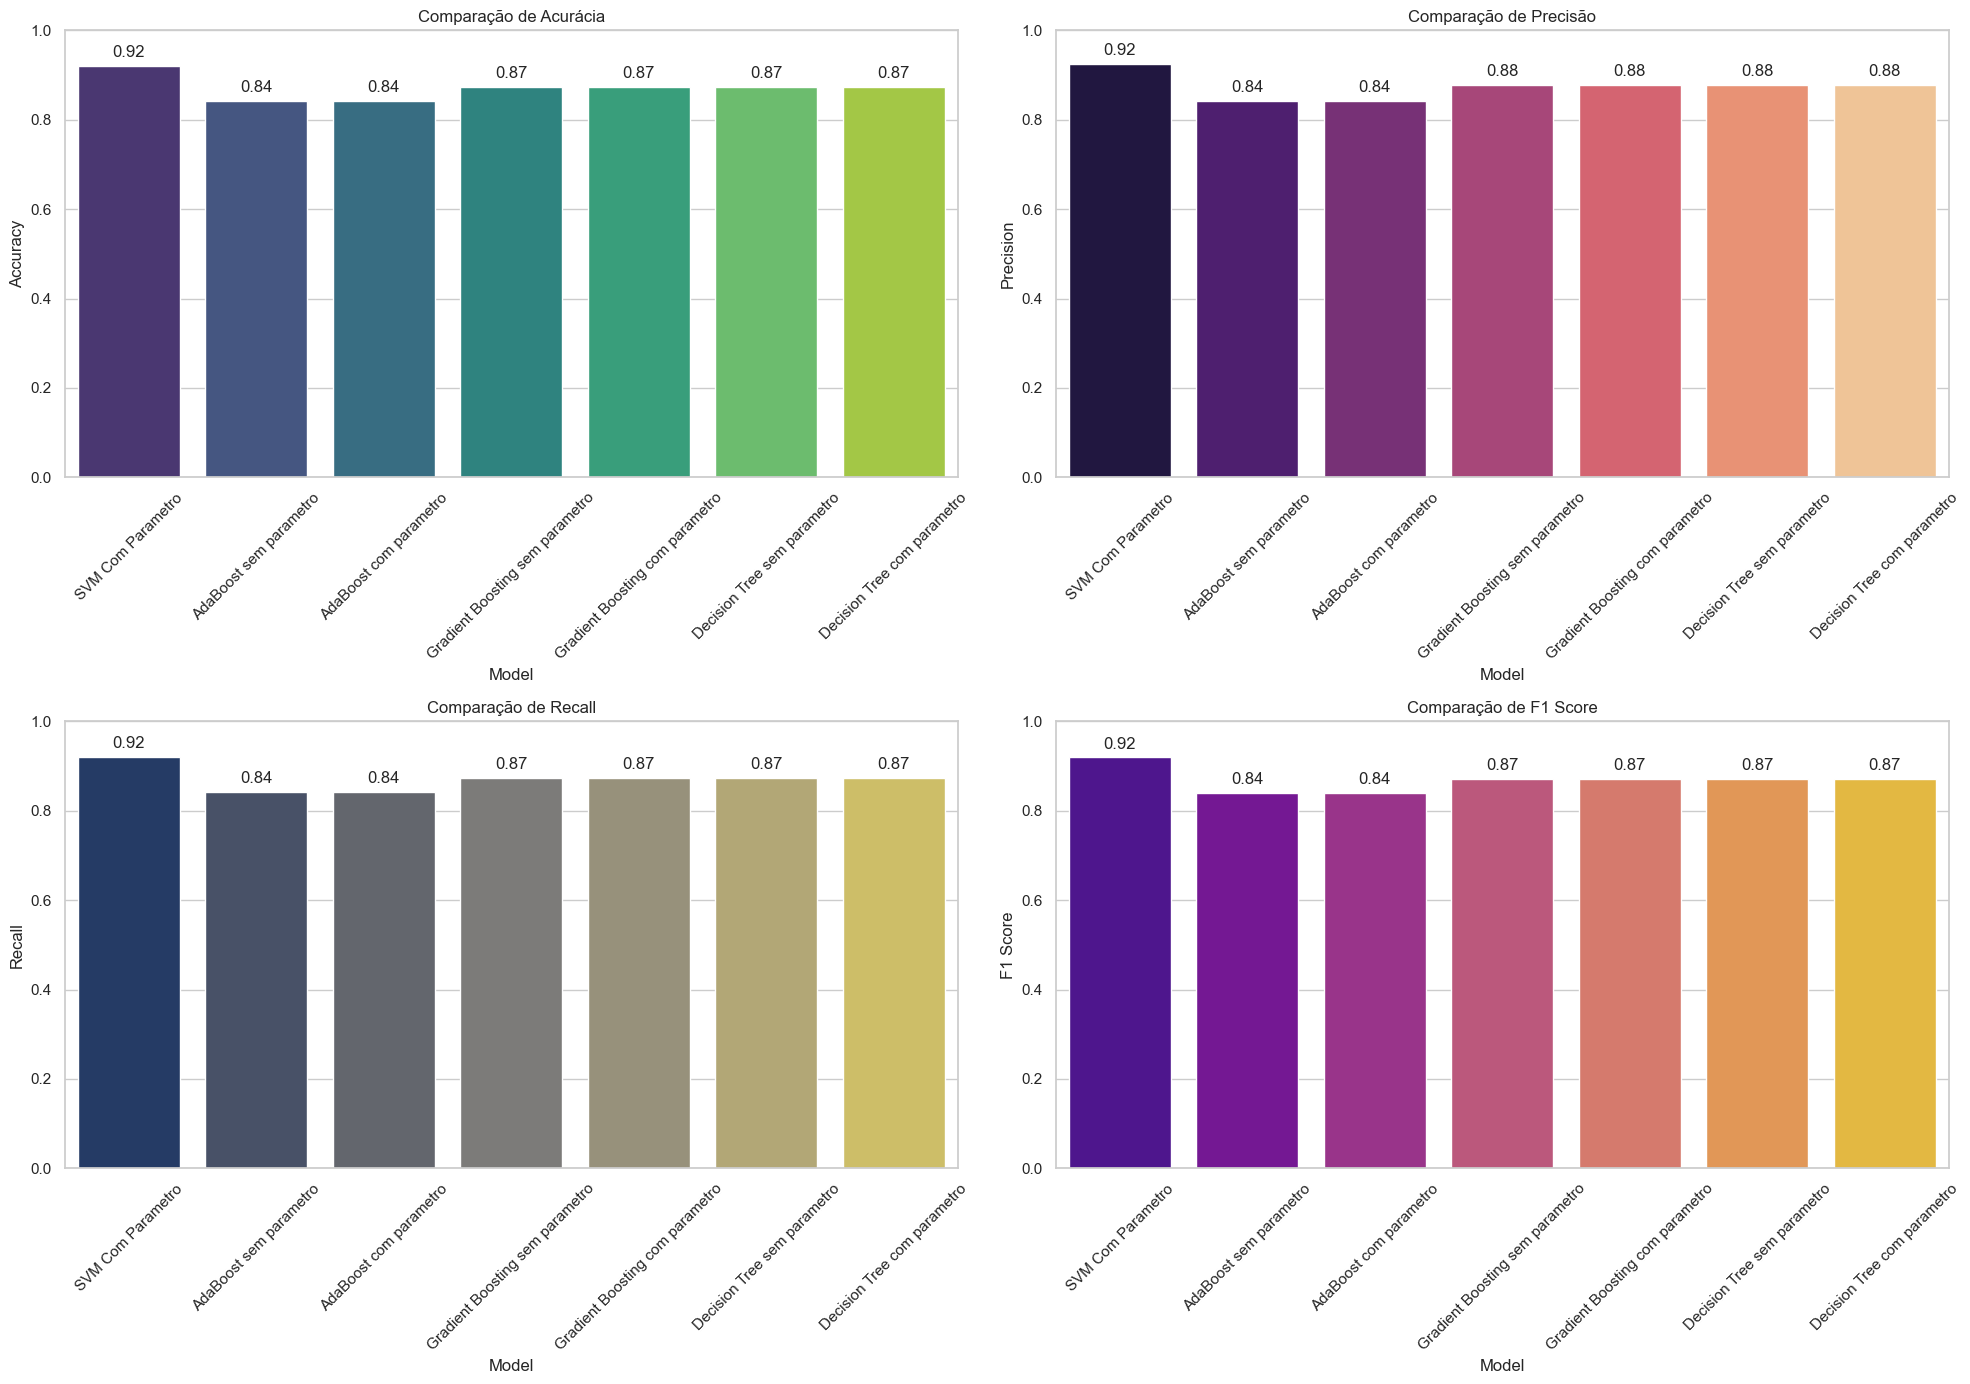

O melhor modelo é 'SVM Com Parametro' com a média de métricas de 0.92.
Desempenho detalhado: Acurácia = 0.92, Precisão = 0.92, Recall = 0.92, F1 Score = 0.92.


In [339]:
plot_comparative_metrics(results)

In [343]:
model = RandomForestClassifier()

# Usando 5-Fold Cross-Validation
scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')

print("Scores de validação cruzada em cada fold:", scores)
print("Acurácia média:", scores.mean())
print("Desvio padrão:", scores.std())

Scores de validação cruzada em cada fold: [0.9047619  0.92857143 0.97619048 0.95238095 0.66666667]
Acurácia média: 0.8857142857142858
Desvio padrão: 0.11208192662799829


In [344]:
strat_kfold = StratifiedKFold(n_splits=5)

scores = cross_val_score(model, X, y_encoded, cv=strat_kfold, scoring='accuracy')

print("Scores de validação cruzada estratificada em cada fold:", scores)
print("Acurácia média:", scores.mean())
print("Desvio padrão:", scores.std())

Scores de validação cruzada estratificada em cada fold: [0.9047619  0.92857143 0.97619048 0.95238095 0.66666667]
Acurácia média: 0.8857142857142858
Desvio padrão: 0.11208192662799829


In [346]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor score de validação cruzada:", grid_search.best_score_)

Melhores parâmetros encontrados: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Melhor score de validação cruzada: 0.9664367816091953


In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.26, random_state=42, stratify=y_encoded)


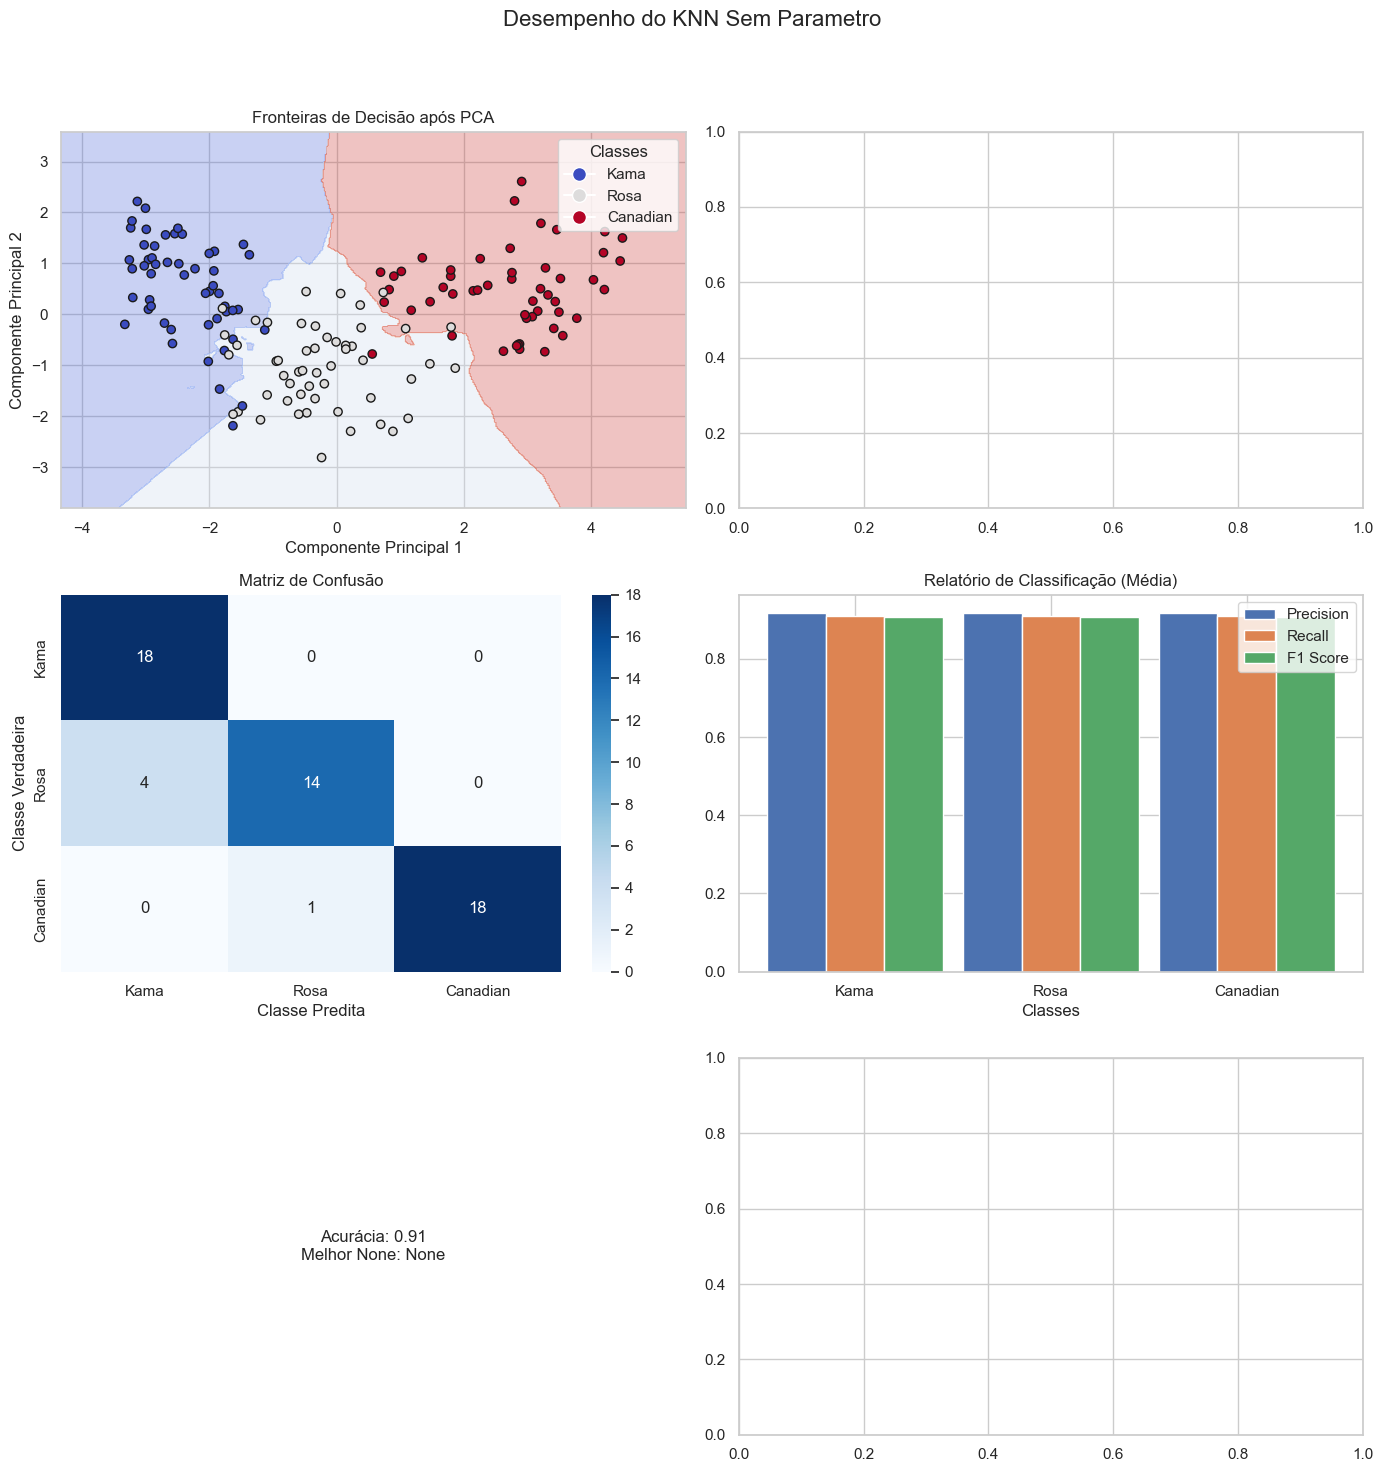

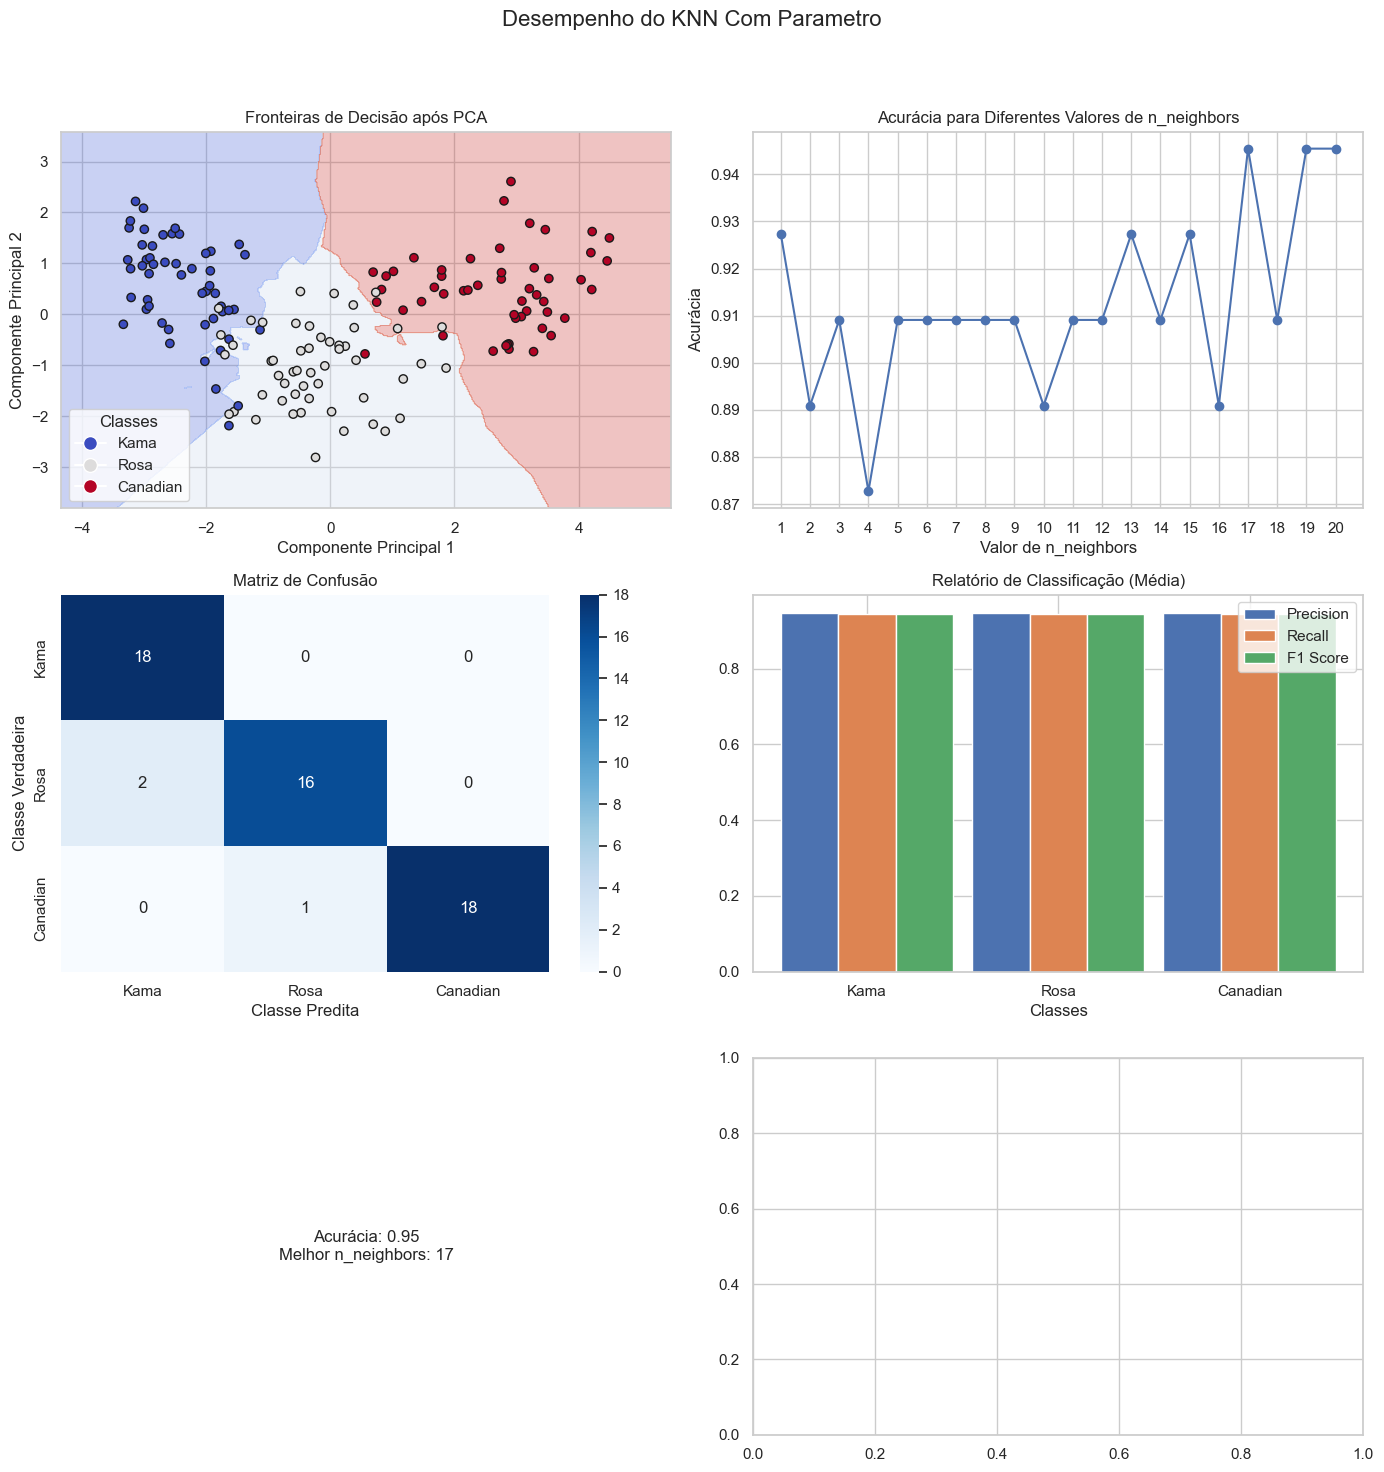

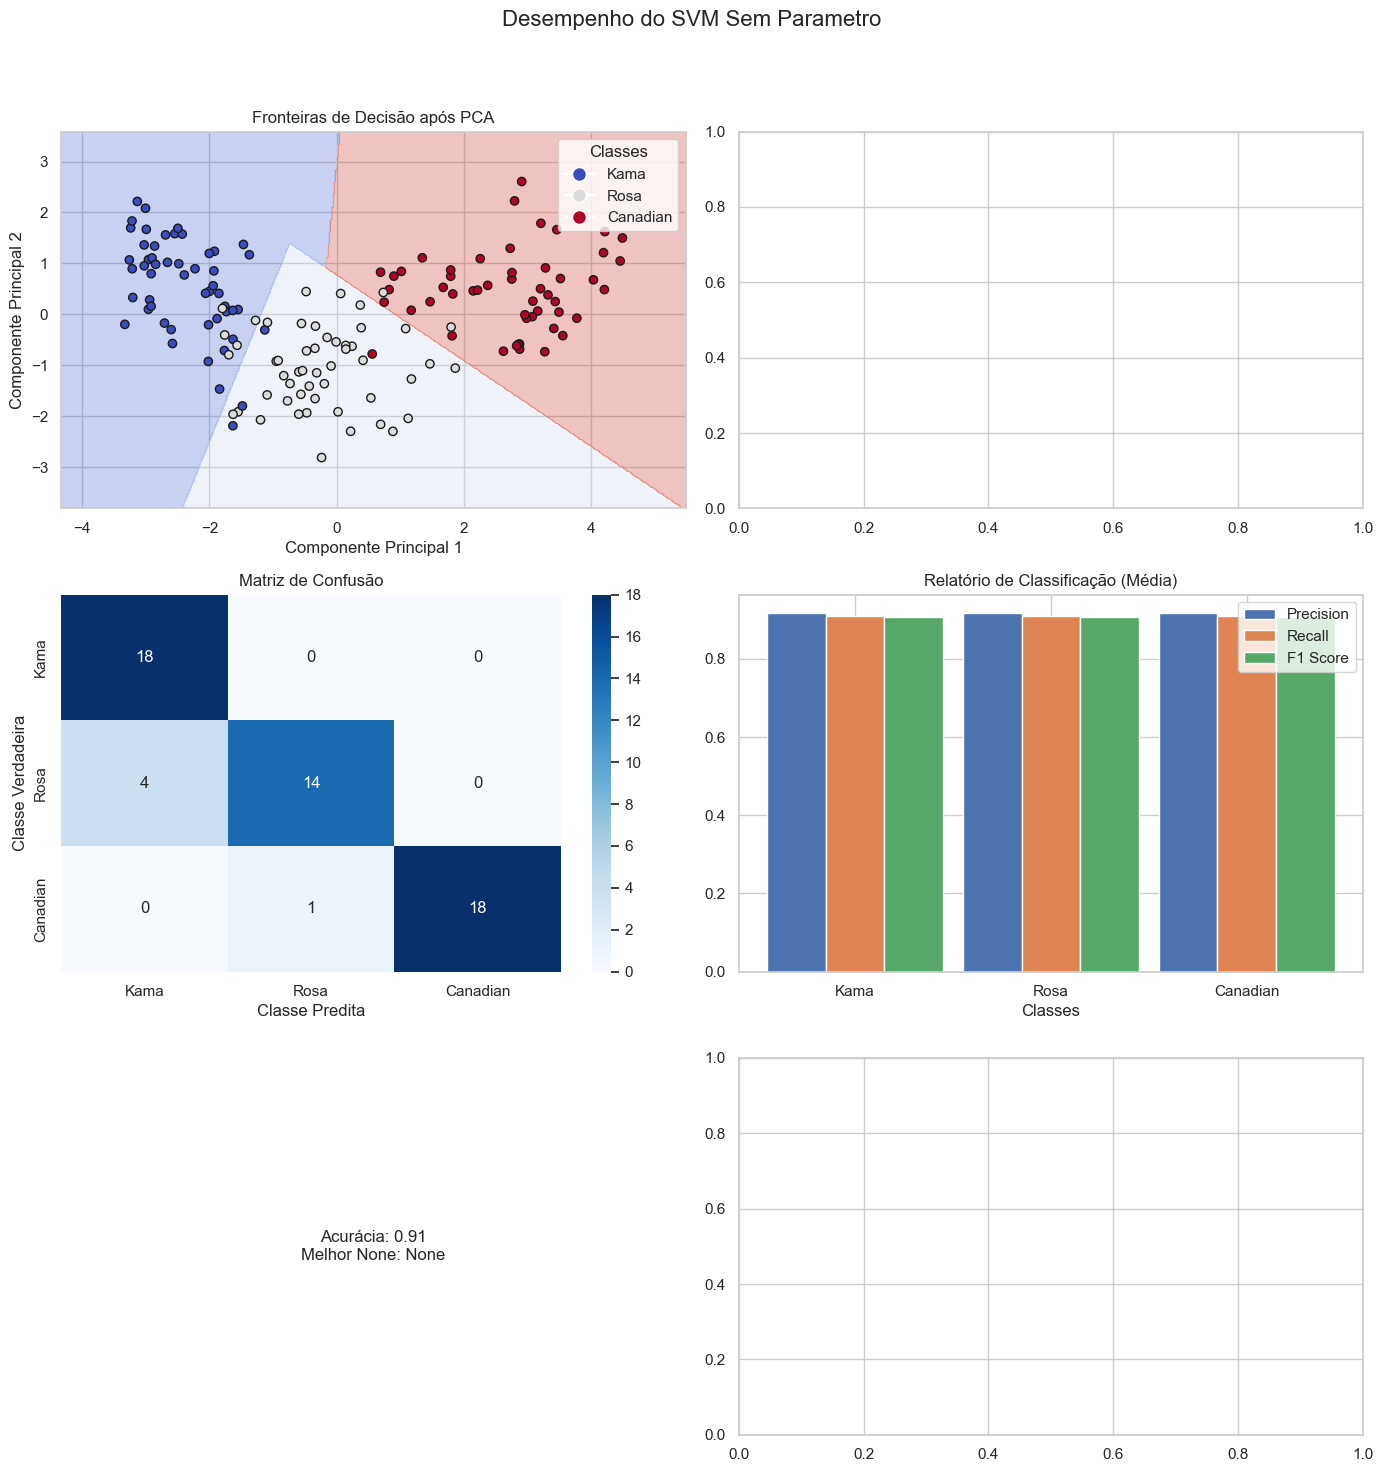

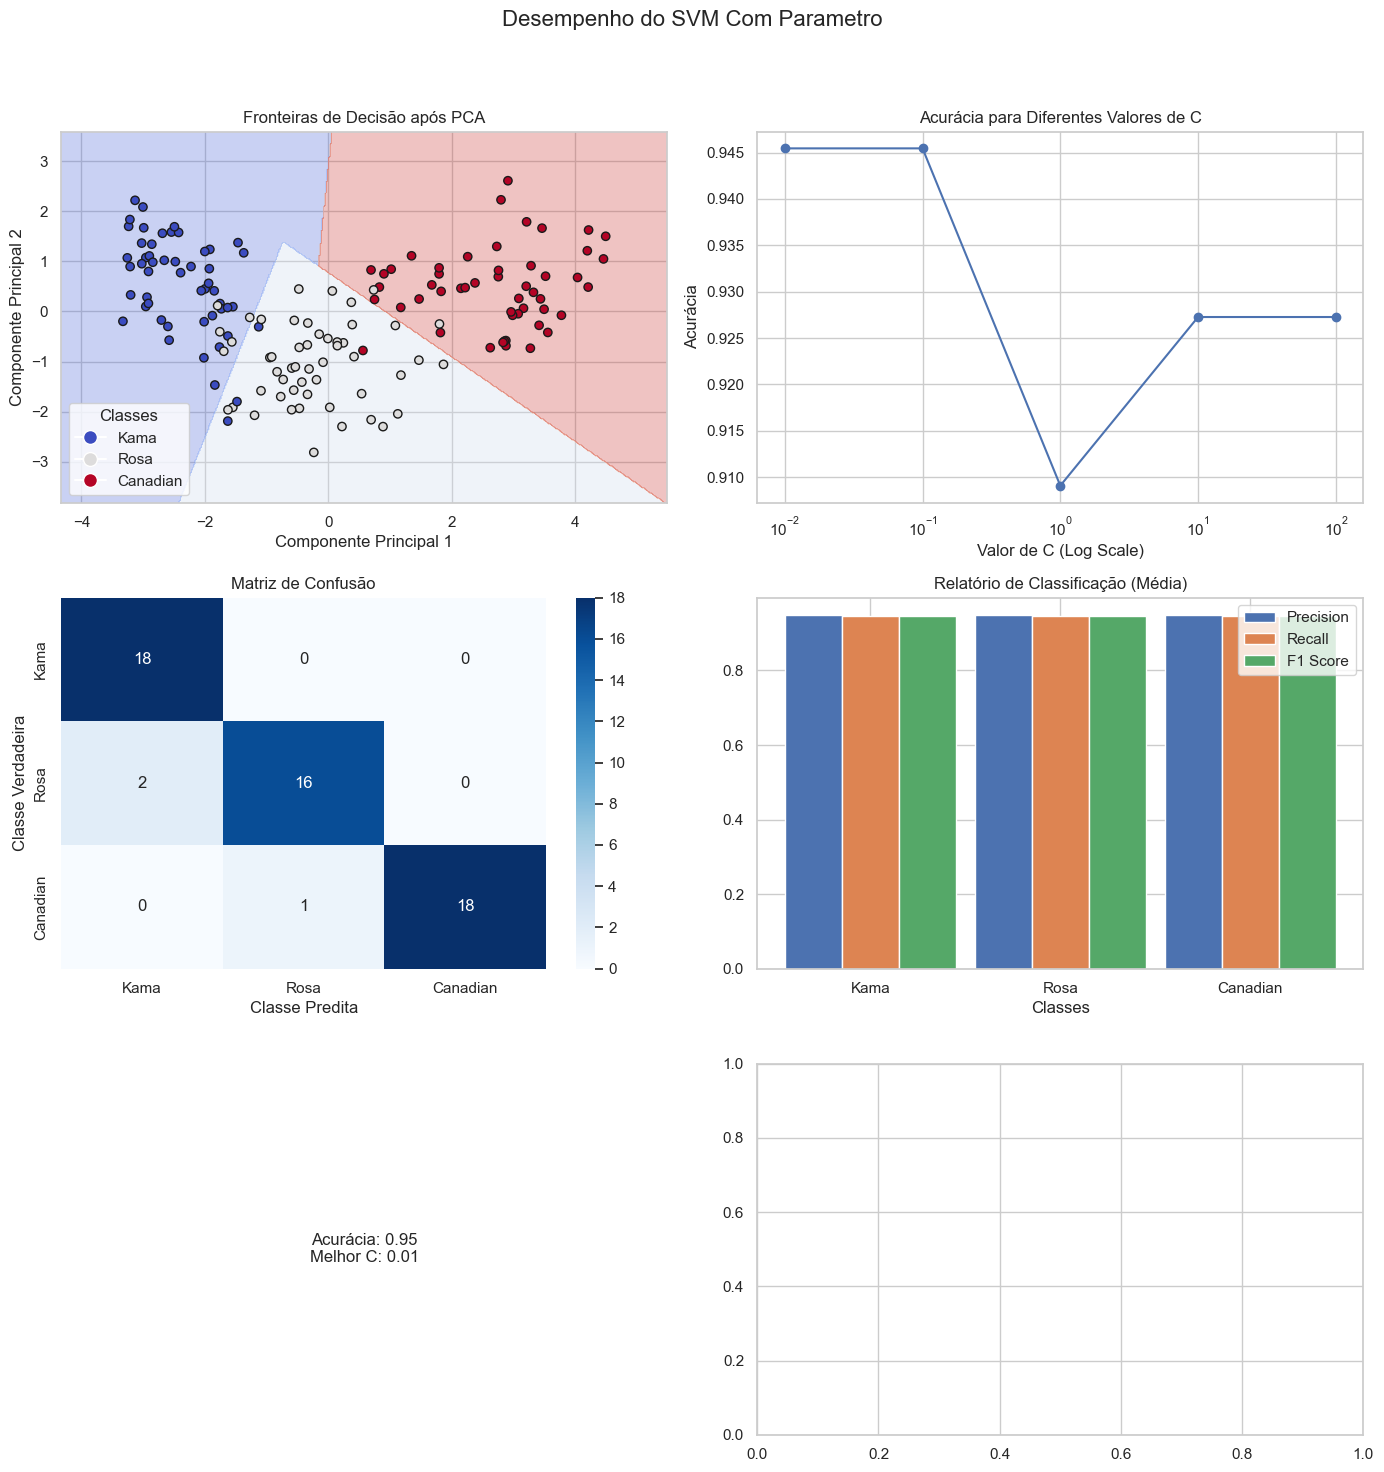

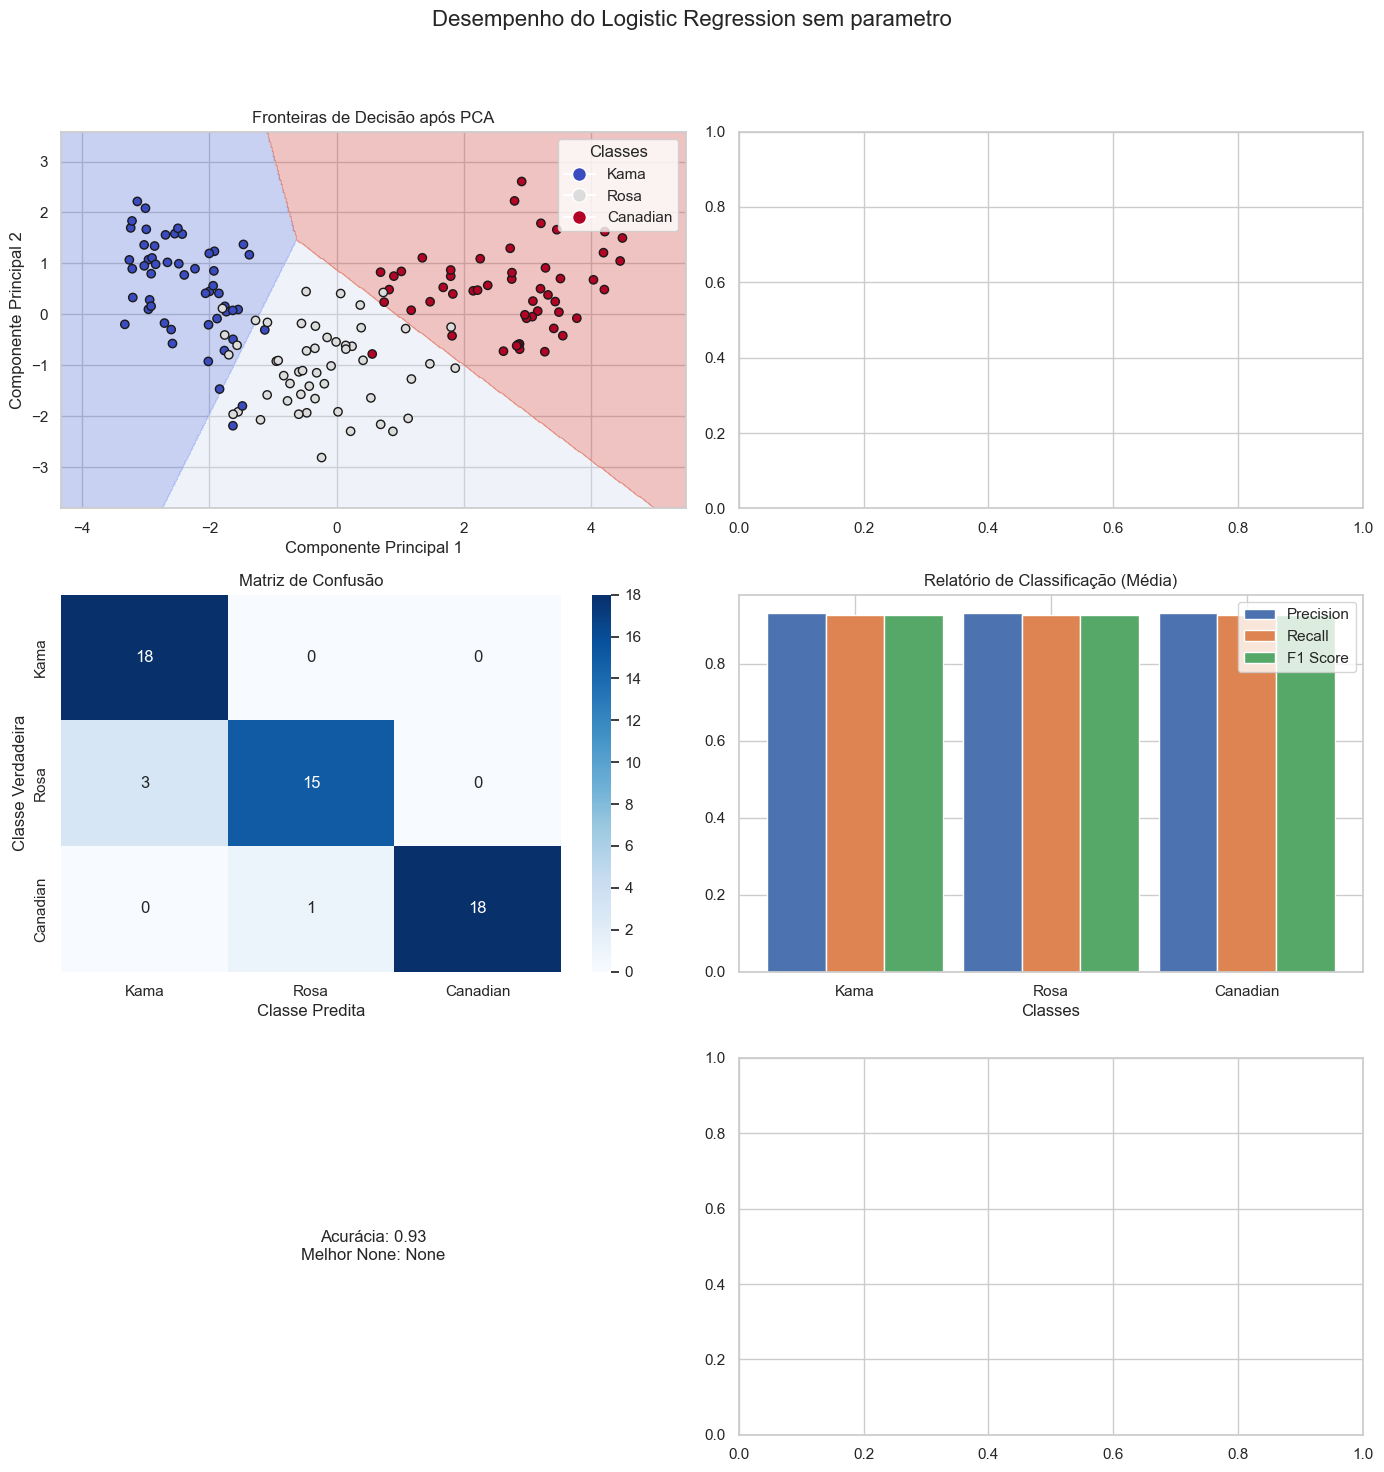

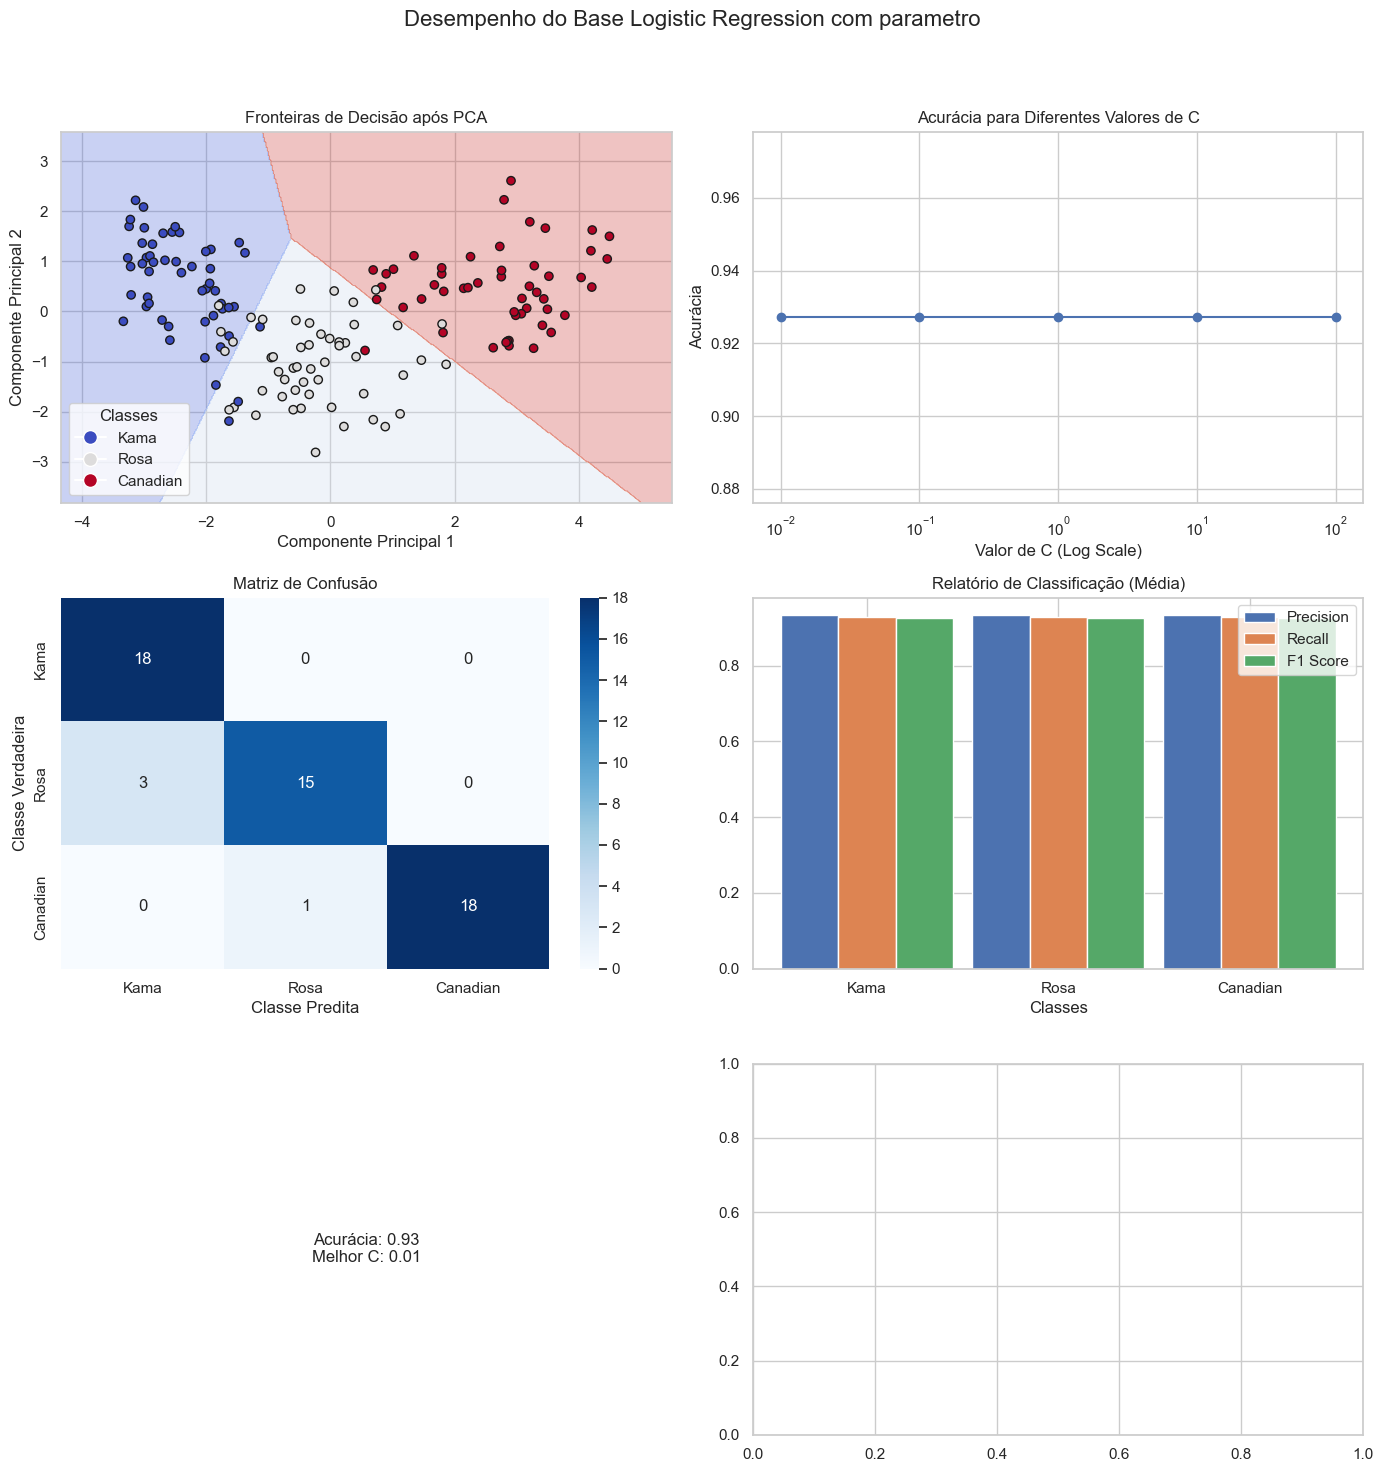

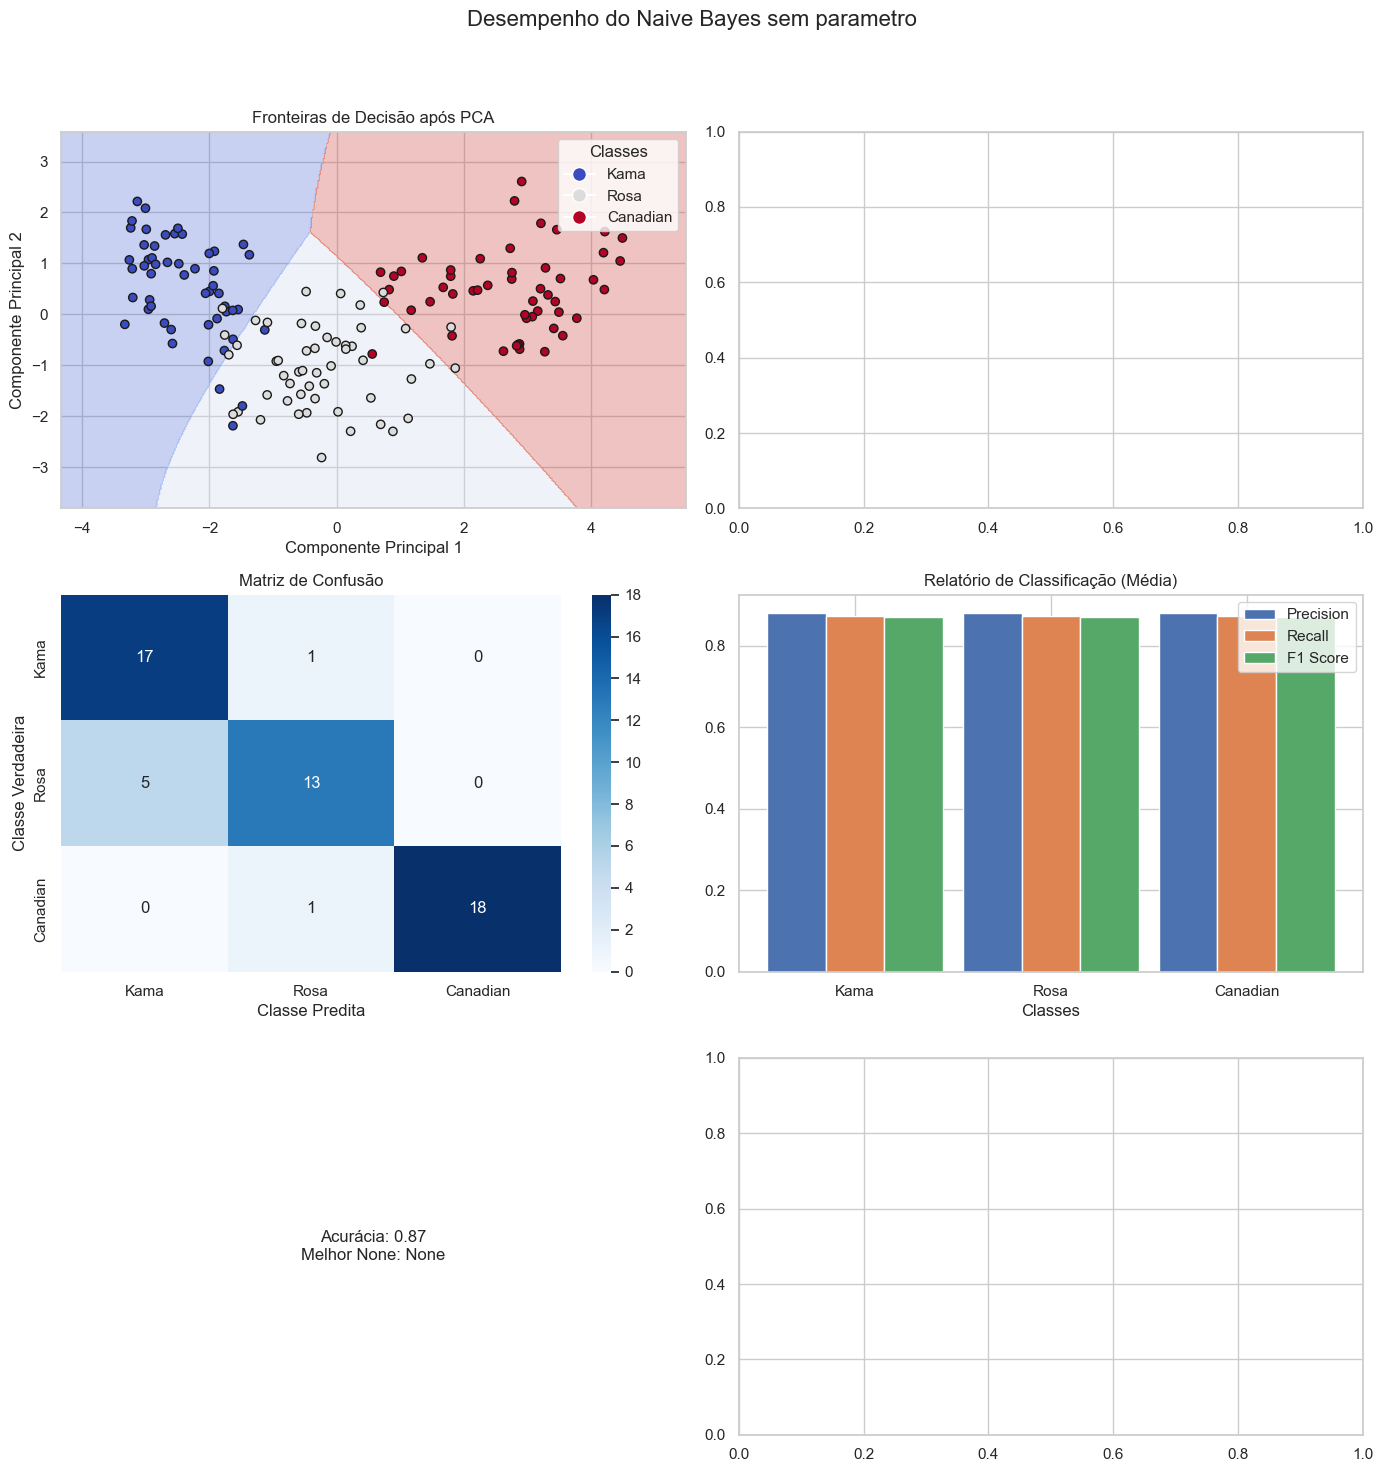

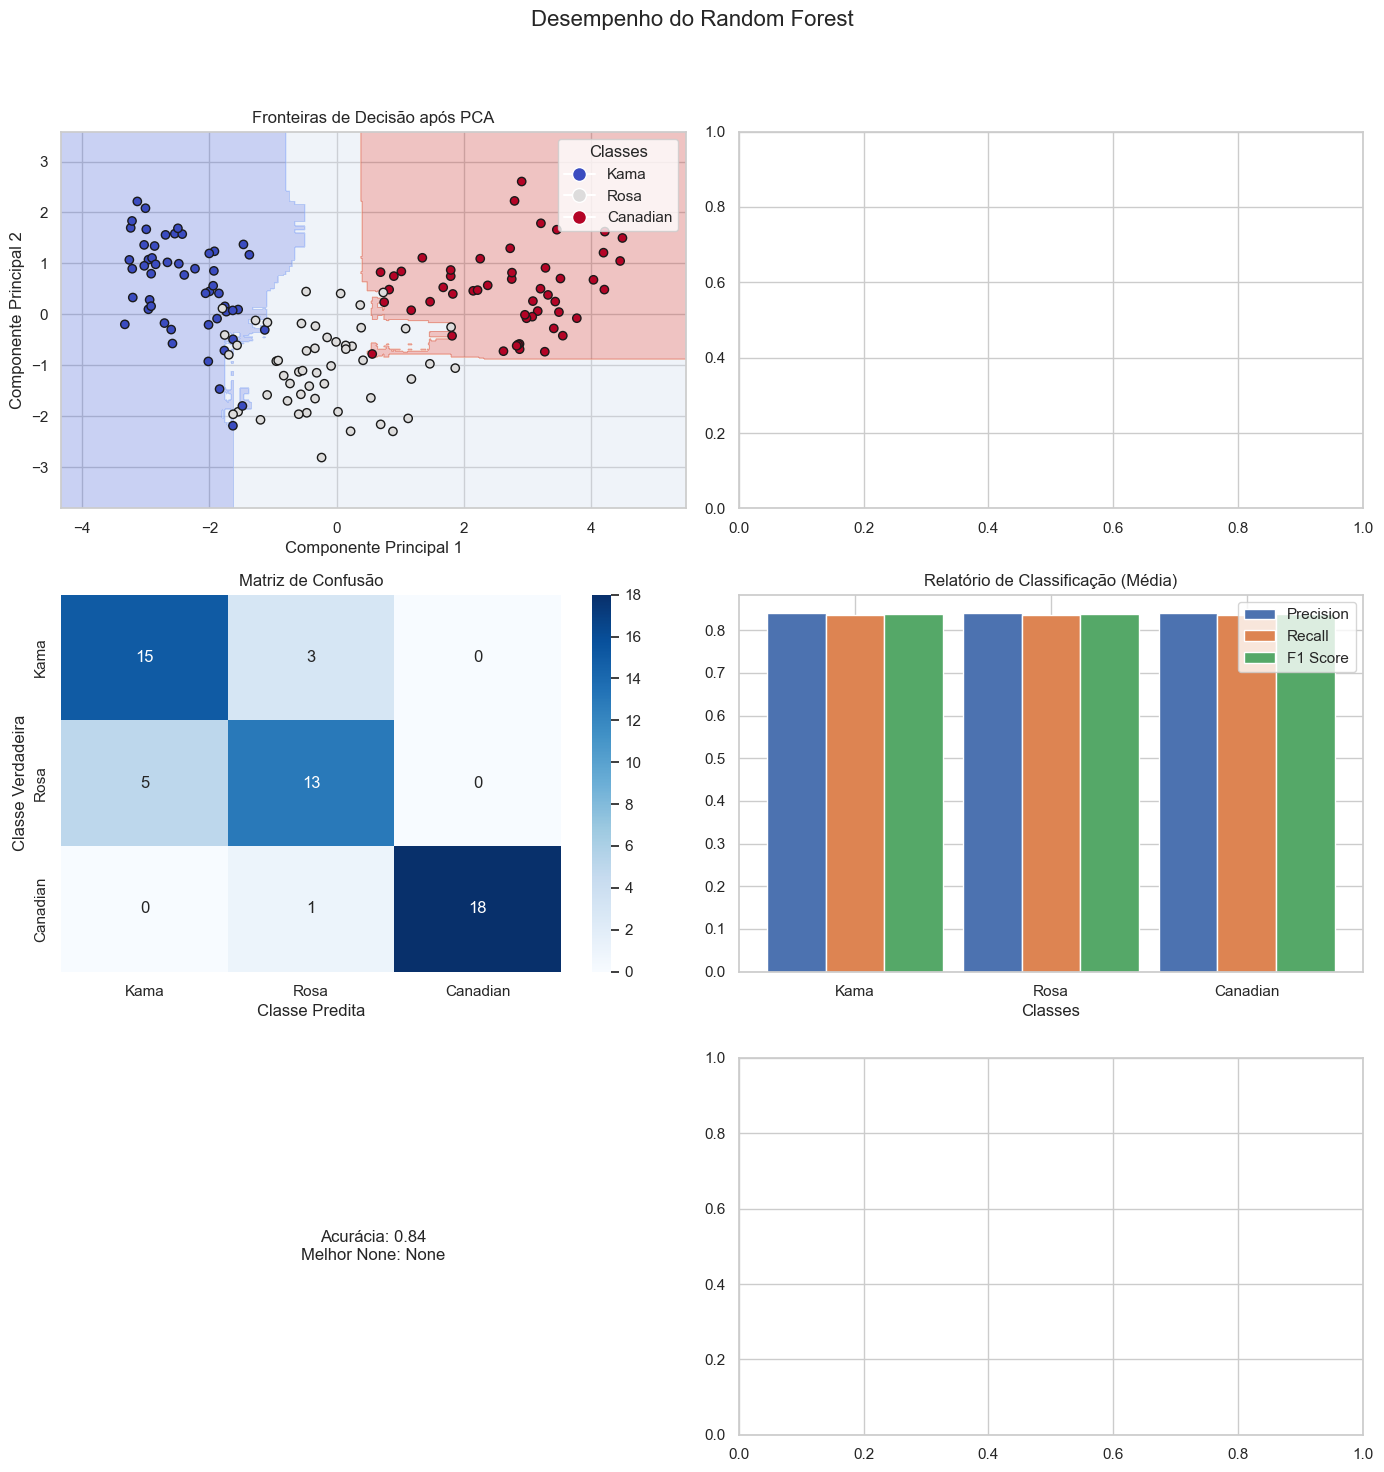

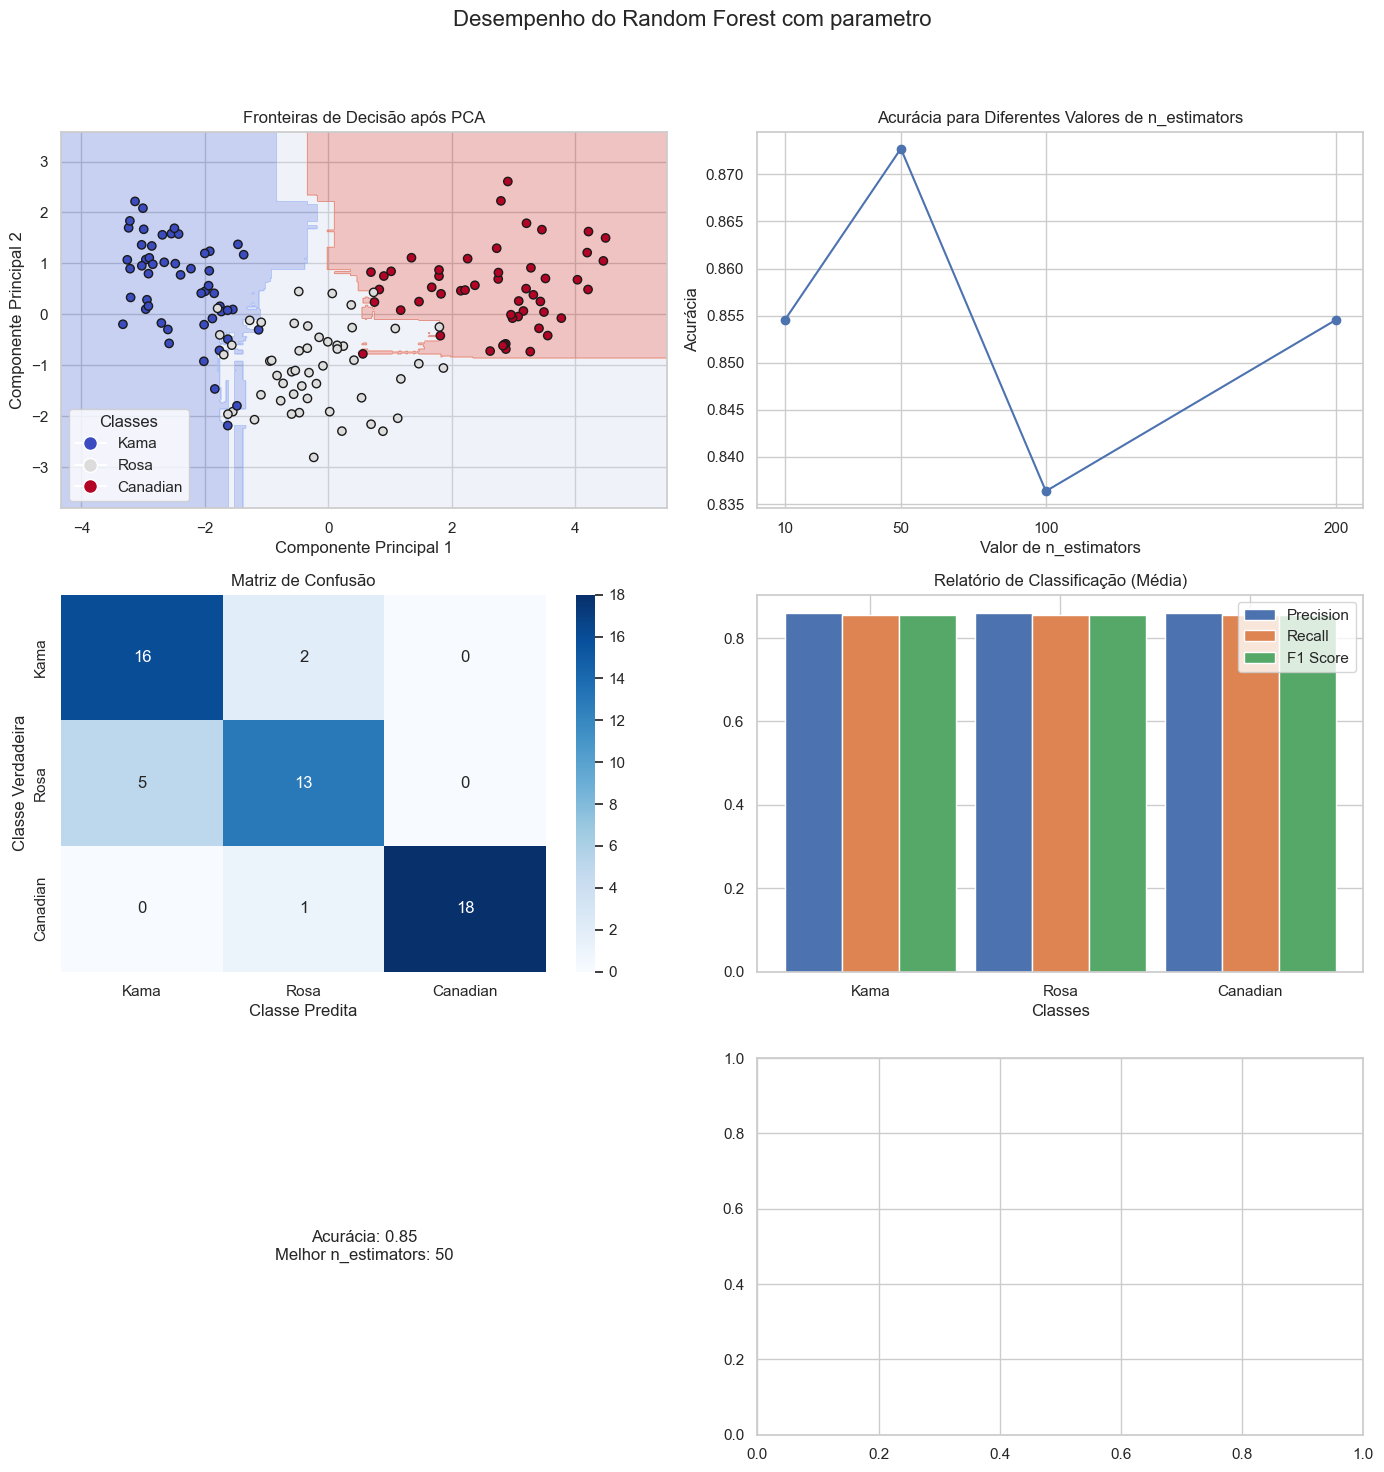

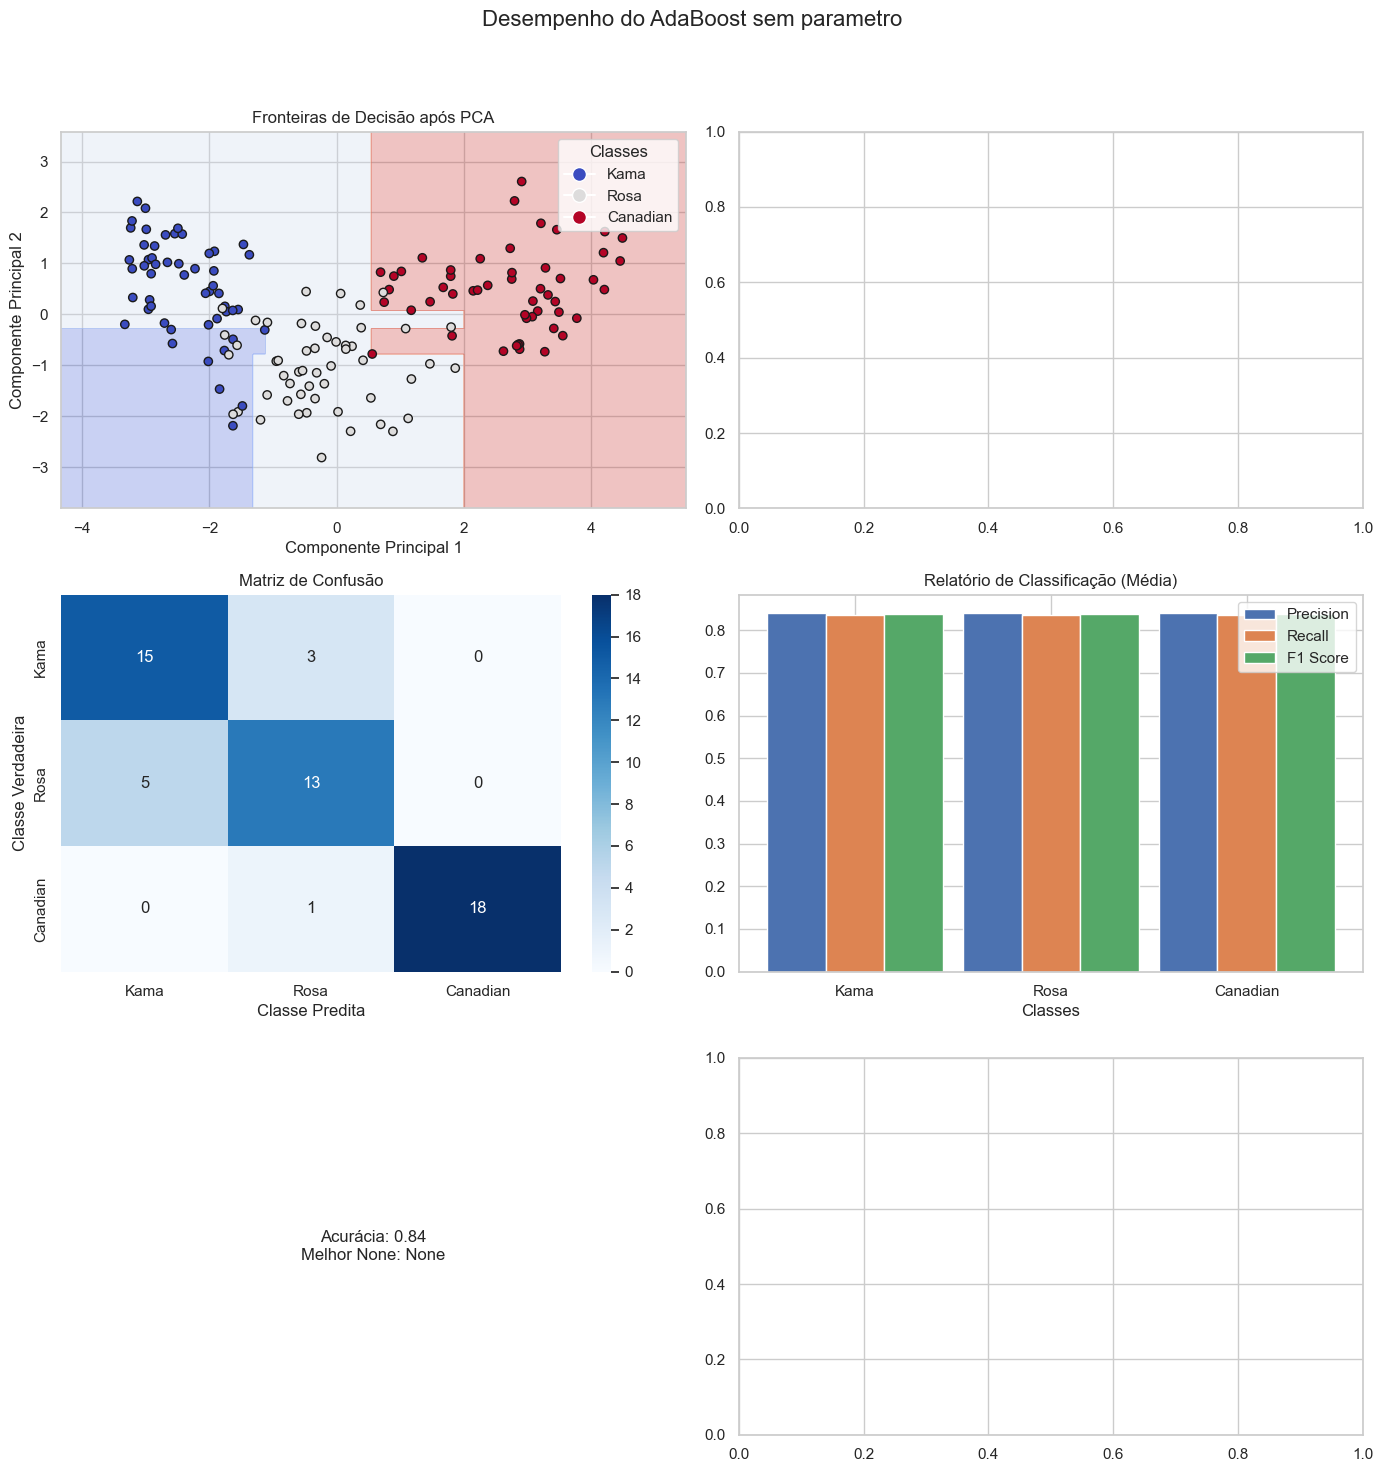

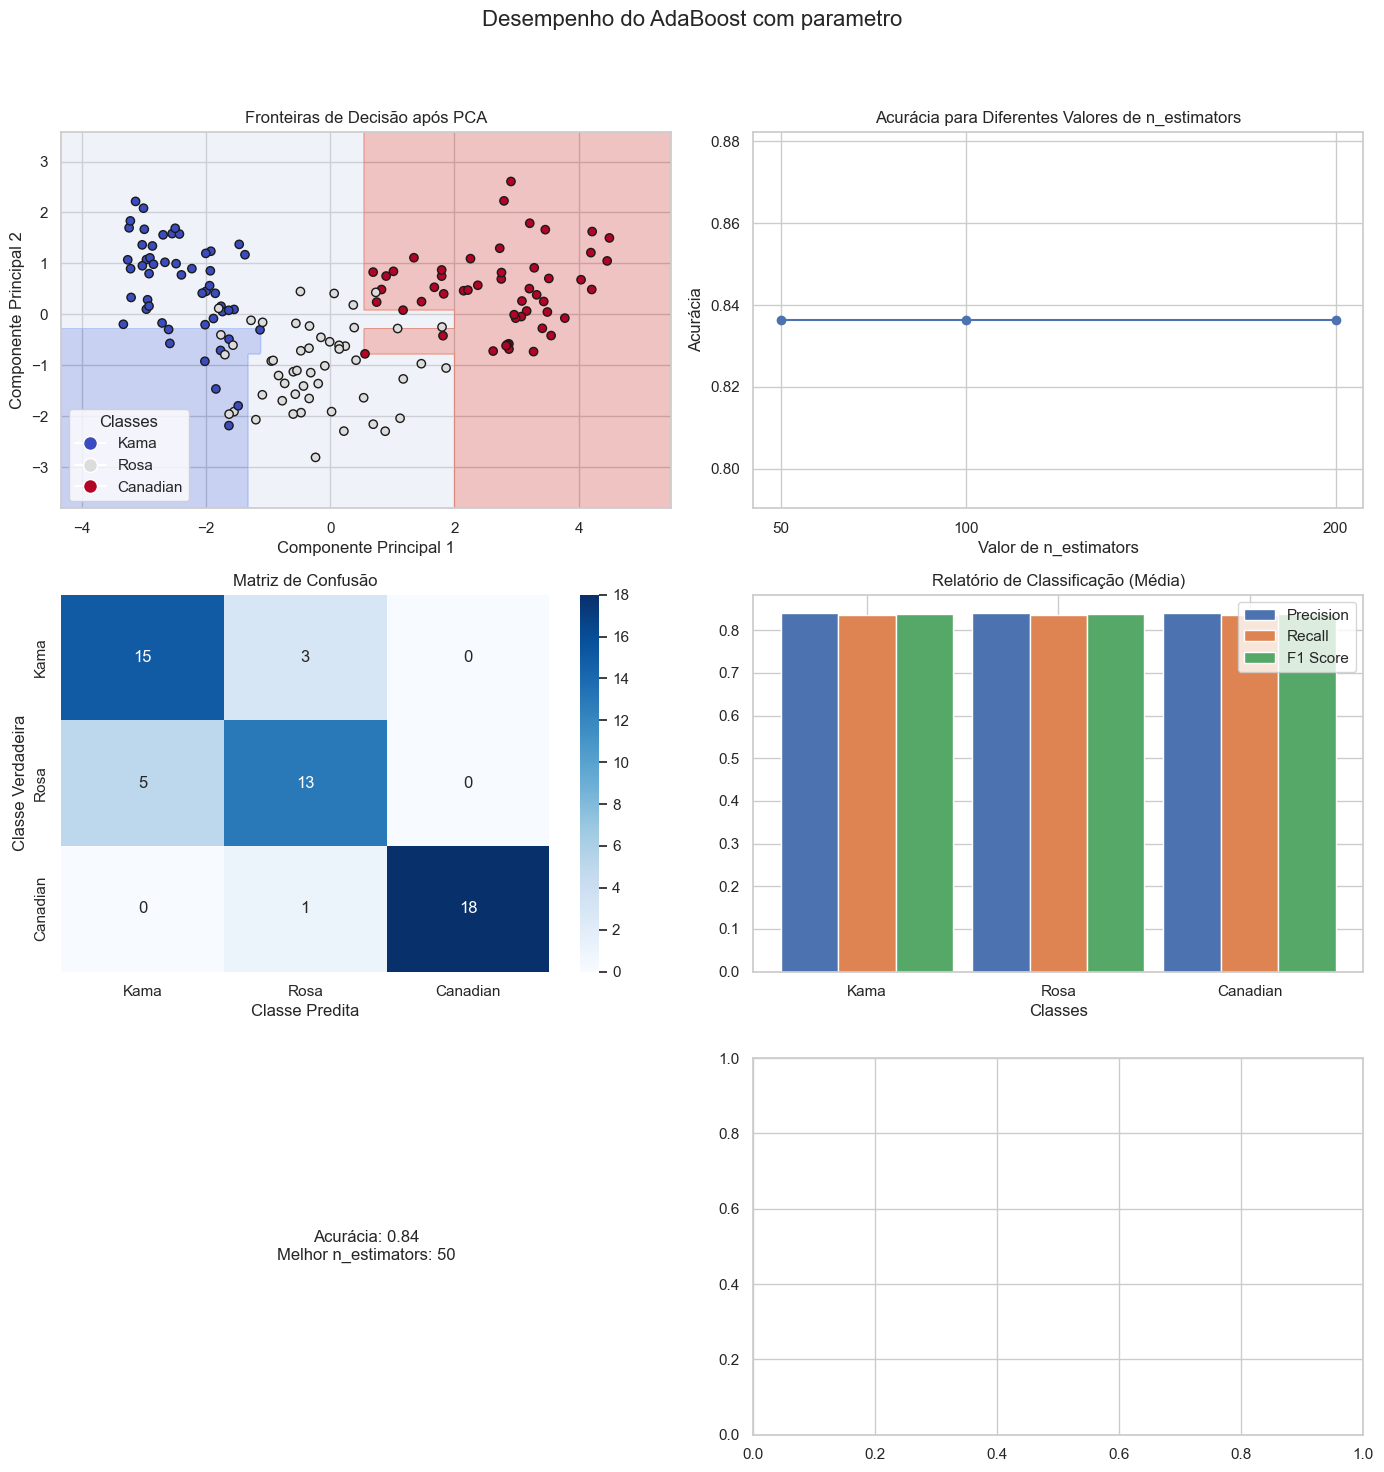

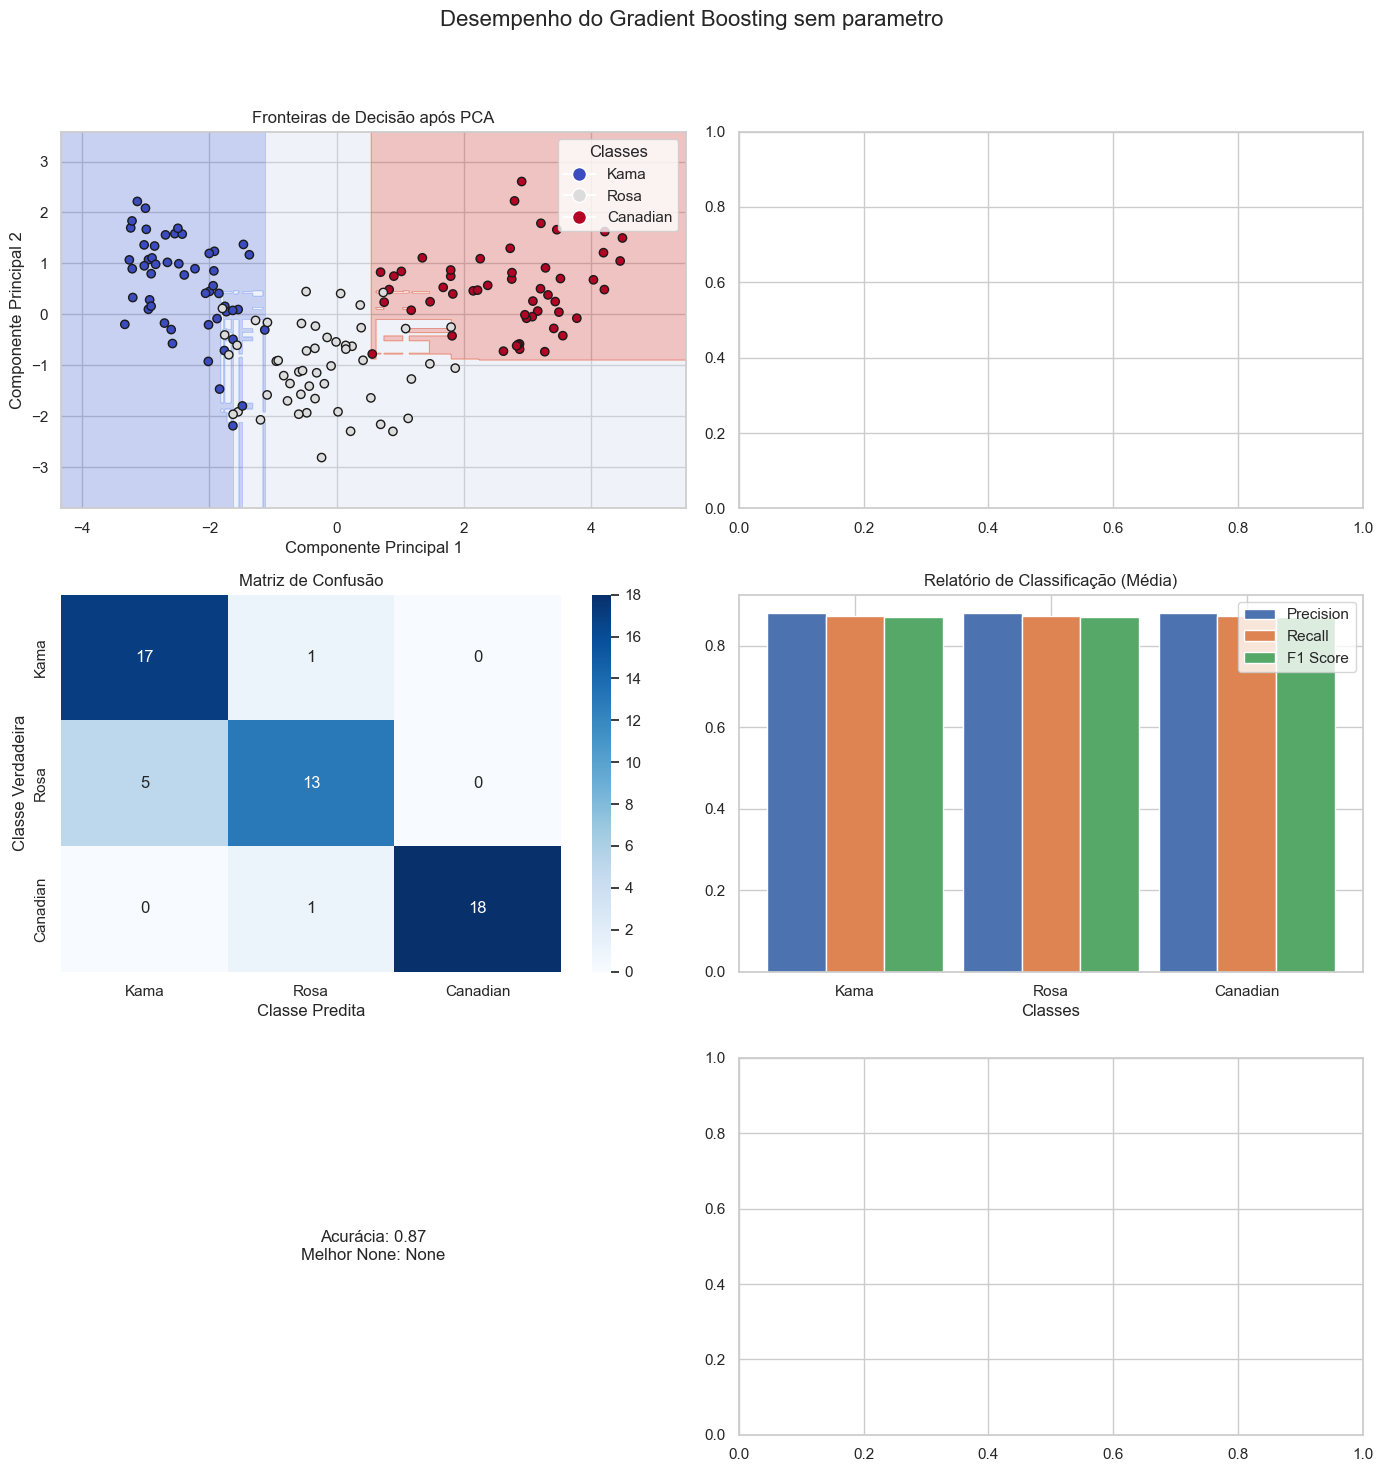

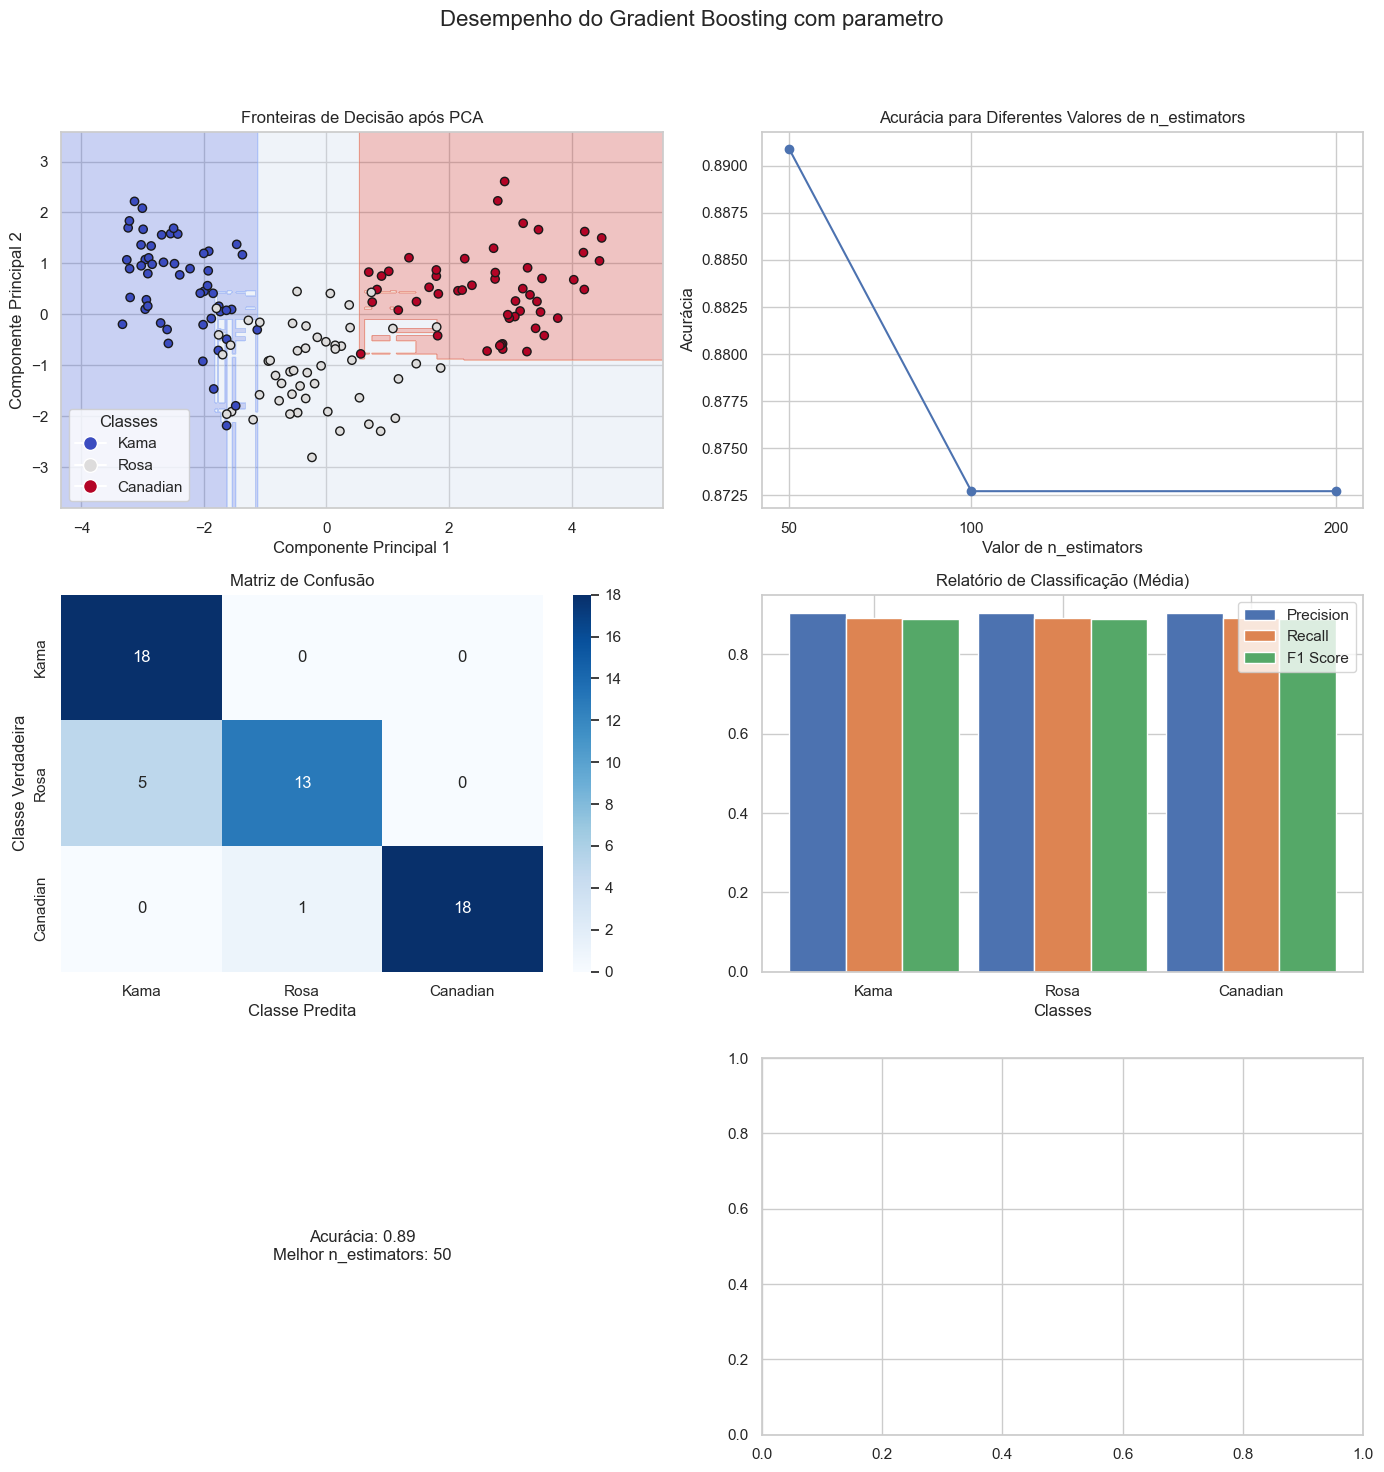

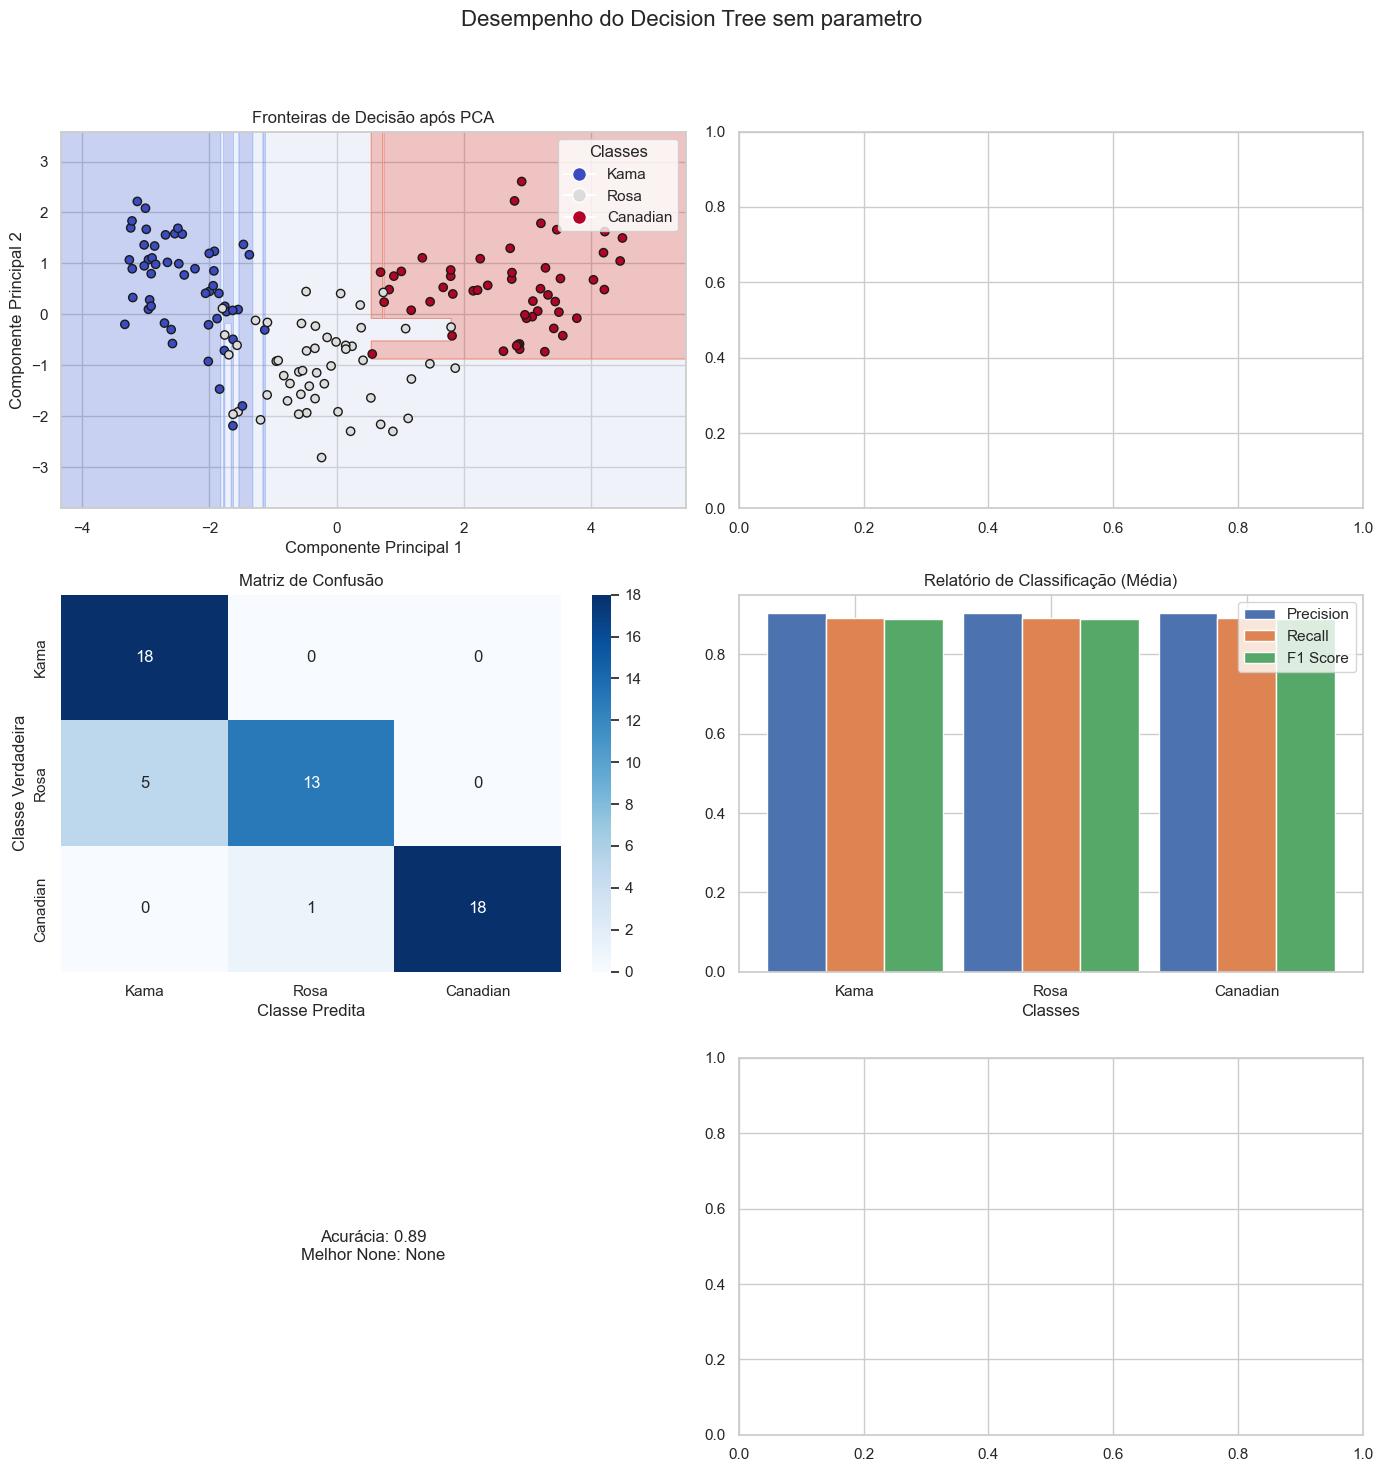

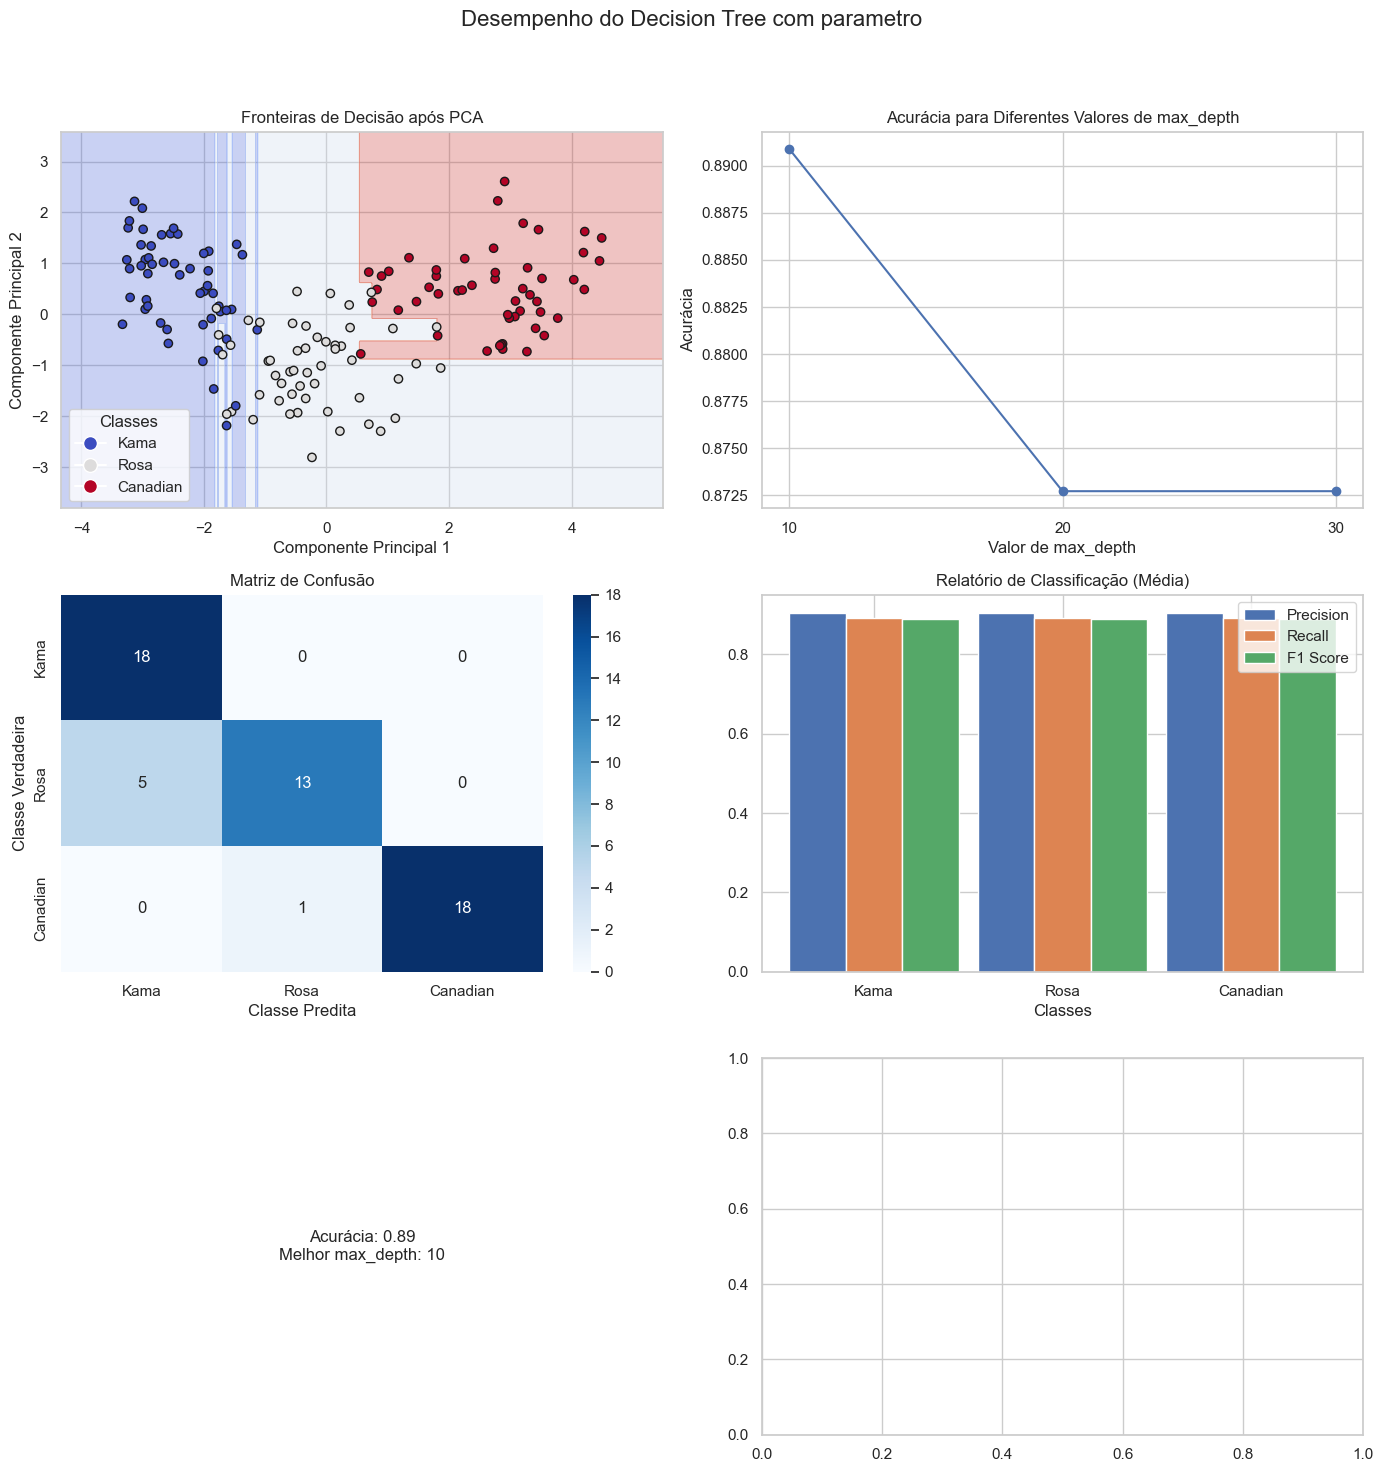

In [365]:
# Exemplo de uso com duas configurações
config_knn_sem_parametros = ['KNN Sem Parametro', X_train, X_test, y_train, y_test, 
              KNeighborsClassifier(), 'KNN', 
              None, None]

config_knn = ['KNN Com Parametro',  X_train, X_test, y_train, y_test, 
              KNeighborsClassifier(), 'KNN', 
              {'n_neighbors': range(1, 21)}, 'n_neighbors']

config_sem_parametro = ['SVM Sem Parametro',  X_train, X_test, y_train, y_test, 
              SVC(kernel='linear'), 'SVM', 
              None, None]

config_svm = ['SVM Com Parametro', X_train, X_test, y_train, y_test, 
              SVC(kernel='linear'), 'SVM', 
              {'C': np.logspace(-2, 2, 5)}, 'C']


config_logic_regression_sem_parametro = ['Logistic Regression sem parametro',  X_train, X_test, y_train, y_test, 
                           LogisticRegression(max_iter=1000), 'Logistic Regression', 
                           None, None]

config_logic_regression = ['Base Logistic Regression com parametro', X_train, X_test, y_train, y_test, 
                           LogisticRegression(max_iter=1000), 'Logistic Regression', 
                           {'C': np.logspace(-2, 2, 5)}, 'C']

config_naive_bayes_sem_parametro = ['Naive Bayes sem parametro',  X_train, X_test, y_train, y_test, 
                      GaussianNB(), 'Naive Bayes', None, None]

config_random_forest_sem_parametro = ['Random Forest', X_train, X_test, y_train, y_test, 
                        RandomForestClassifier(), 'Random Forest', 
                        None, None]


config_random_forest = ['Random Forest com parametro',  X_train, X_test, y_train, y_test, 
                        RandomForestClassifier(), 'Random Forest', 
                        {'n_estimators': [10, 50, 100, 200]}, 'n_estimators']



config_gradient_boosting_sem_parametro = [
    'Gradient Boosting sem parametro', X_train, X_test, y_train, y_test,
    GradientBoostingClassifier(), 'Gradient Boosting',
    None, None
]

config_gradient_boosting = [
    'Gradient Boosting com parametro', X_train, X_test, y_train, y_test,
    GradientBoostingClassifier(), 'Gradient Boosting',
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}, 'n_estimators'
]

config_decision_tree_sem_parametro = [
    'Decision Tree sem parametro', X_train, X_test, y_train, y_test,
    DecisionTreeClassifier(), 'Decision Tree',
    None, None
]


config_decision_tree = [
    'Decision Tree com parametro', X_train, X_test, y_train, y_test,
    DecisionTreeClassifier(), 'Decision Tree',
    {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}, 'max_depth'
]

config_adaboost_sem_parametro = [
    'AdaBoost sem parametro', X_train, X_test, y_train, y_test,
    AdaBoostClassifier(), 'AdaBoost',
    None, None
]

config_adaboost = [
    'AdaBoost com parametro', X_train, X_test, y_train, y_test,
    AdaBoostClassifier(), 'AdaBoost',
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}, 'n_estimators'
]



teste_todos = [config_knn_sem_parametros, config_knn, config_sem_parametro, config_svm, config_logic_regression_sem_parametro, config_logic_regression, config_naive_bayes_sem_parametro, config_random_forest_sem_parametro, config_random_forest,
                config_adaboost_sem_parametro, config_adaboost,
    config_gradient_boosting_sem_parametro, config_gradient_boosting,
    config_decision_tree_sem_parametro, config_decision_tree
               ]
results = evaluate_model(teste_todos)

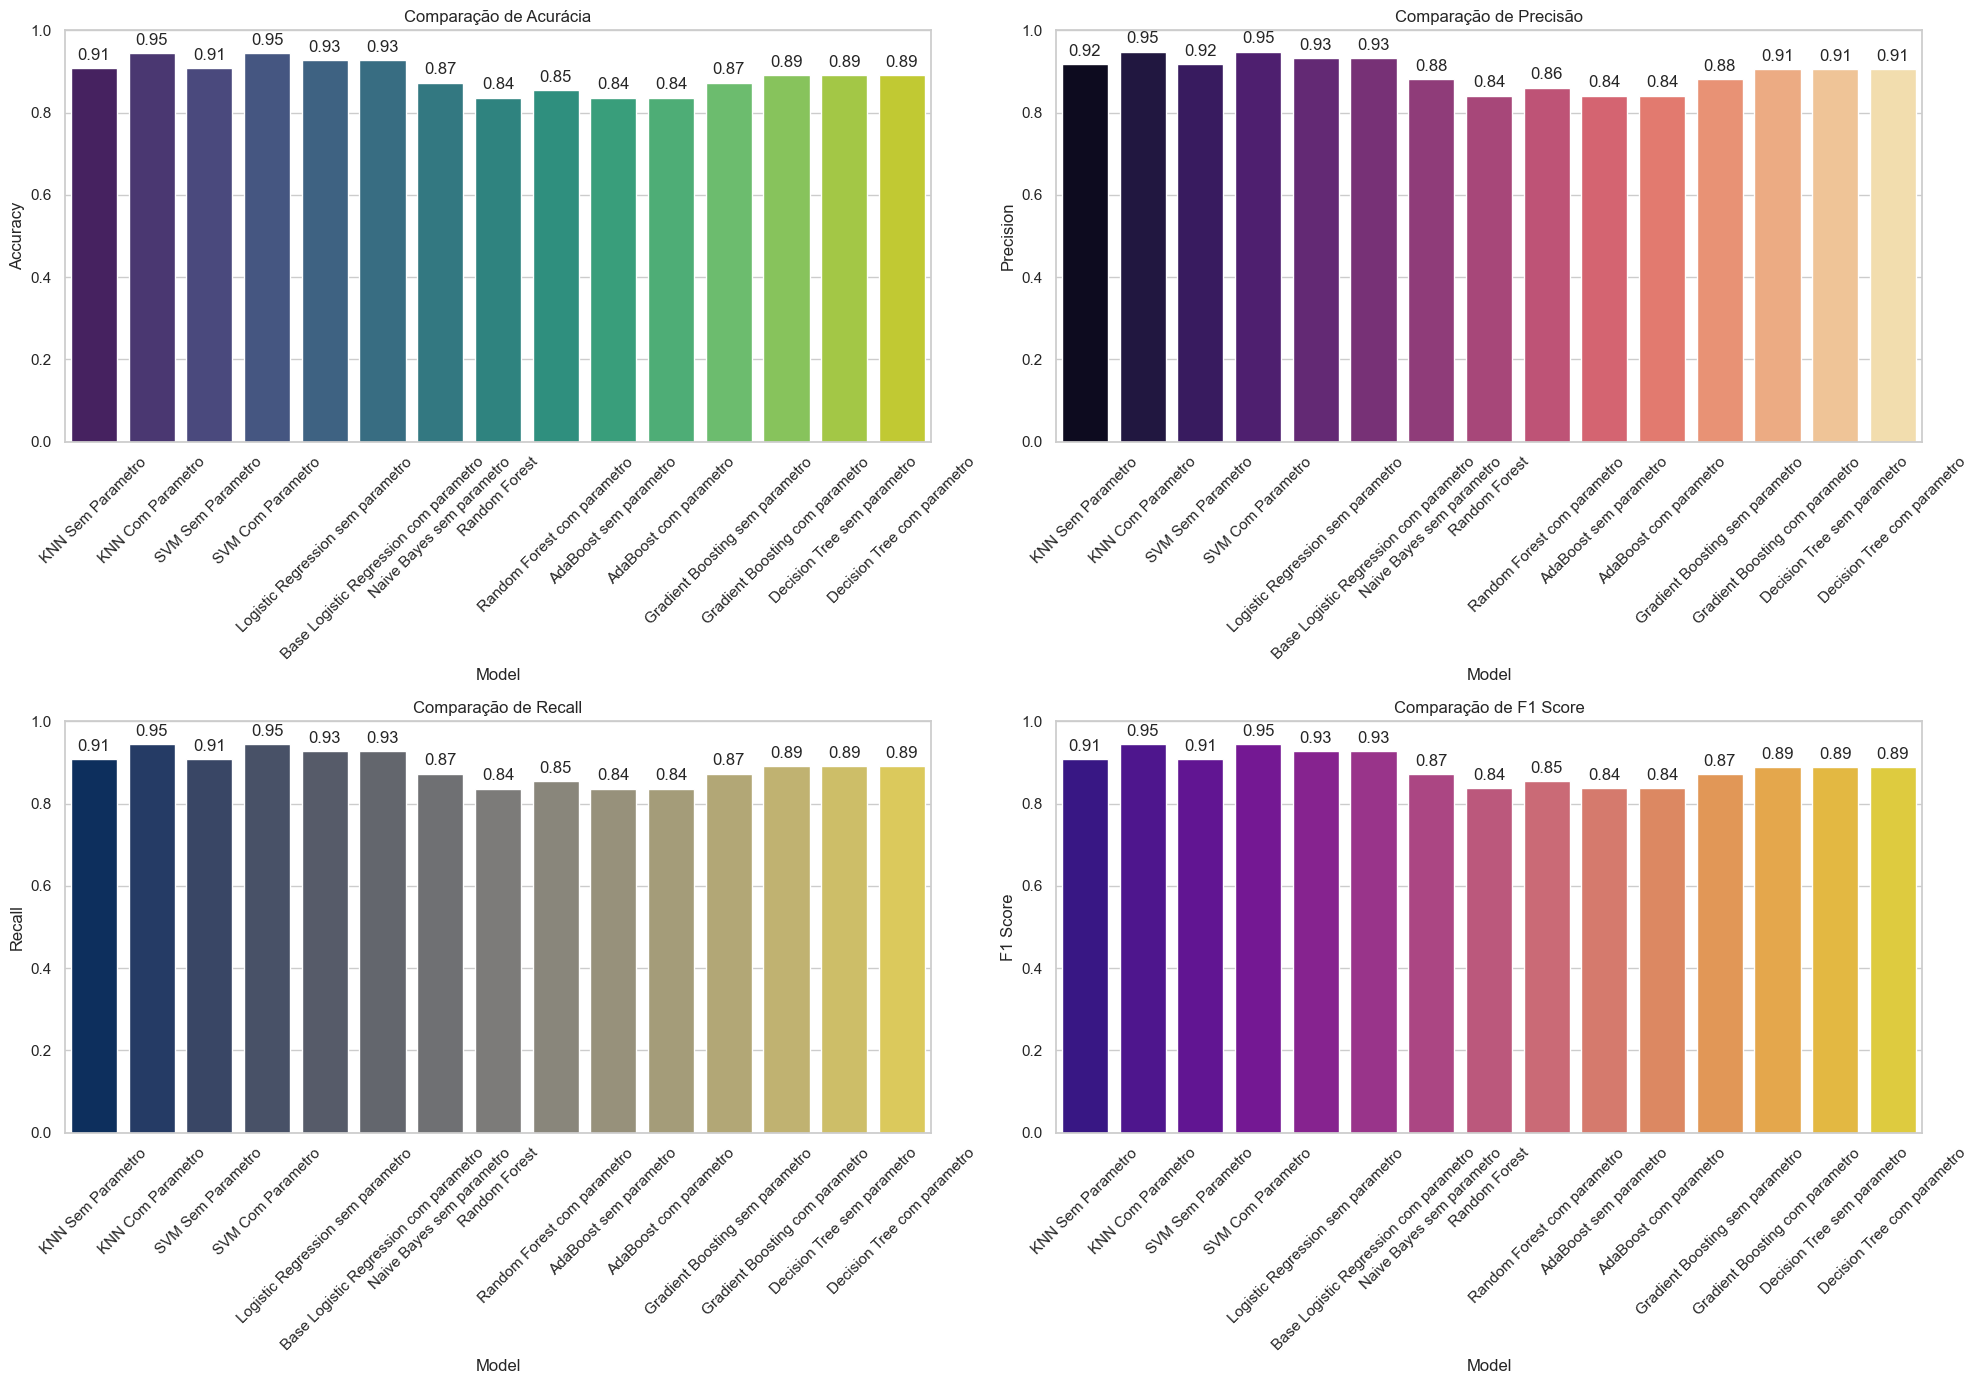

O melhor modelo é 'KNN Com Parametro' com a média de métricas de 0.95.
Desempenho detalhado: Acurácia = 0.95, Precisão = 0.95, Recall = 0.95, F1 Score = 0.95.


In [366]:
plot_comparative_metrics(results)


In [373]:
# Modelos individuais
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(probability=True, kernel='linear', random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('knn', knn), 
        ('rf', rf), 
        ('svc', svc)
    ],
    voting='soft'  # ou 'hard'
)

# Treinamento do ensemble
voting_clf.fit(X_train, y_train)

# Avaliação
accuracy = voting_clf.score(X_test, y_test)
print("Acurácia do ensemble:", accuracy)

# Usando Bagging com KNN
bagging_clf = BaggingClassifier(
    estimator=KNeighborsClassifier(n_neighbors=5),
    n_estimators=50,
    random_state=42
)

bagging_clf.fit(X_train, y_train)
bagging_accuracy = bagging_clf.score(X_test, y_test)
print("Acurácia com Bagging:", bagging_accuracy)

# AdaBoost com Decision Tree Classifier
adaboost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)

adaboost_clf.fit(X_train, y_train)
adaboost_accuracy = adaboost_clf.score(X_test, y_test)
print("Acurácia com AdaBoost:", adaboost_accuracy)



# Modelos base
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, kernel='linear', random_state=42))
]

# Modelo de empilhamento
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

stacking_clf.fit(X_train, y_train)
stacking_accuracy = stacking_clf.score(X_test, y_test)
print("Acurácia com Stacking:", stacking_accuracy)

Acurácia do ensemble: 0.9090909090909091
Acurácia com Bagging: 0.9090909090909091
Acurácia com AdaBoost: 0.8363636363636363
Acurácia com Stacking: 0.9090909090909091


In [437]:
X = df_seeds[features]  # 'features' sendo as colunas que você quer normalizar
y = df_seeds['Variety']

# Dividir dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [438]:
# Criar e ajustar o pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ajustar scaler nos dados de treinamento
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipeline.fit(X_train, y_train)

# Salvar o pipeline ajustado
joblib.dump(pipeline, 'pipeline_knn_optimized.pkl')


['pipeline_knn_optimized.pkl']

In [445]:
loaded_pipeline = joblib.load('pipeline_knn_optimized.pkl')

# Dados novos a serem normalizados e previstos

test_data = [
# 1    
[13.84,13.94,0.8955,5.324,3.379,2.259,4.805],
[16.14,14.99,0.9034,5.658,3.562,1.355,5.175],
[14.38,14.21,0.8951,5.386,3.312,2.462,4.956],
[14.69,14.49,0.8799,5.563,3.259,3.586,5.219],
# 3,
[19.13,16.31,0.9035,6.183,3.902,2.109,5.924],
[19.14,16.61,0.8722,6.259,3.737,6.682,6.053],
[20.97,17.25,0.8859,6.563,3.991,4.677,6.316],
# 3,
[11.87,13.02,0.8795,5.132,2.953,3.597,5.132],
[10.82,12.83,0.8256,5.18,2.63,4.853,5.089],
[12.11,13.27,0.8639,5.236,2.975,4.132,5.012],
[12.8,13.47,0.886,5.16,3.126,4.873,4.914],
[12.79,13.53,0.8786,5.224,3.054,5.483,4.95]
]


predictions = loaded_pipeline.predict(test_data)
print("Previsões:", predictions)

Previsões: [1 1 1 1 2 2 2 3 3 3 3 3]
